In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import glob

In [2]:
def parse_file_to_dt(fname):
    chrom_states = ["A_compartment", "B_compartment", "Lamina",
                    "Lamina_Like", "Near_Lm", "Speckle"]
    dt = {k : 1 for k in chrom_states}
    with open(fname, 'r') as fn:
        for line in fn:
            pair = line.strip().split(' ')
            dt[pair[1]] = pair[0]
    return dt

# get tbl for chip and triads

In [3]:
dt = {}

for FILE in glob.glob(f"ANNOT_ChIP/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
chip_df = pd.DataFrame.from_dict(dt).transpose()
chip_df = chip_df.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del chip_df["WINDOW"]
chip_df = chip_df[chip_df["PROTEIN"].str.endswith("K562")]
chip_df["PROTEIN"] = chip_df.PROTEIN.apply(lambda k: k.split('_')[0] + "_ChIP")
chip_df = chip_df.set_index("PROTEIN").astype("int")
chip_df["s"] = chip_df.sum(axis=1)
chip_df = chip_df.div(chip_df.s, axis=0).iloc[:, :-1]
chip_df

,A_compartment,B_compartment,Lamina,Lamina_Like,Near_Lm,Speckle
PROTEIN,,,,,,
ZC3H11A_ChIP,0.598157,0.026843,0.003606,0.004006,0.089744,0.277644
CBP_ChIP,0.387626,0.156566,0.092172,0.006313,0.210859,0.146465
HNRNPH_ChIP,0.317536,0.113744,0.052133,0.004739,0.208531,0.303318
U2AF1_ChIP,0.562767,0.025601,0.017292,0.007186,0.109364,0.277790
NONO_ChIP,0.587330,0.027217,0.002159,0.003660,0.085969,0.293665
SAFB_ChIP,0.505408,0.035835,0.007910,0.011461,0.100565,0.338822
CTCF_ChIP,0.457362,0.101921,0.044420,0.012086,0.224470,0.159741
CHD7_ChIP,0.516511,0.041490,0.009314,0.002540,0.088061,0.342083
YBX3_ChIP,0.564103,0.022297,0.002787,0.005574,0.078038,0.327202


In [4]:
dt = {}

for FILE in glob.glob("ANNOT_Triad/ANNOT_noPC/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
triad = pd.DataFrame.from_dict(dt).transpose()
triad = triad.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del triad["WINDOW"]
triad = triad[triad["PROTEIN"].str.endswith("K562")]
triad["PROTEIN"] = triad.PROTEIN.apply(lambda k: k.split('_')[0] + "_Triad")
triad = triad.set_index("PROTEIN").astype("int")
triad["s"] = triad.sum(axis=1)
triad = triad.div(triad.s, axis=0).iloc[:, :-1]
triad

,A_compartment,B_compartment,Lamina,Lamina_Like,Near_Lm,Speckle
PROTEIN,,,,,,
CBP_Triad,0.471664,0.076782,0.040219,0.005484,0.162706,0.243144
GTF2F1_Triad,0.606654,0.063405,0.001174,0.002740,0.063796,0.262231
PTBP1_Triad,0.492782,0.017644,0.000356,0.003386,0.027981,0.457851
CBX3_Triad,0.340588,0.017410,0.034820,0.006529,0.301415,0.299238
RBM22_Triad,0.509535,0.010472,0.000341,0.002809,0.057126,0.419717
HNRNPH_Triad,0.290323,0.064516,0.016129,0.016129,0.290323,0.322581
HNRNPK_Triad,0.482188,0.039878,0.059088,0.009605,0.146748,0.262492
HDAC1_Triad,0.562971,0.017274,0.002041,0.006124,0.075063,0.336526
ZC3H11A_Triad,0.630667,0.029333,0.001333,0.002667,0.050667,0.285333


# normalize

In [5]:
K562_chrom = pd.read_table("K562_SPIN_25kb_hg38.bed", names=["chr", "start", "end", "state"])
K562_chrom["length"] = K562_chrom["end"] - K562_chrom["start"]
state_pro = (K562_chrom.groupby(by="state")["length"].sum() #/ 
#             K562_chrom.groupby(by="state")["length"].sum().sum()
            )
state_pro

state
A_compartment    773050000
B_compartment    304222008
Lamina           753175000
Lamina_Like       76550000
Near_Lm          793236622
Speckle          150875000
Name: length, dtype: int64

In [6]:
chip_df_norm = chip_df.div(state_pro, axis=1) * (10 ** 5)
#chip_df_norm["s"] = chip_df_norm.sum(axis=1)
#chip_df_norm = chip_df_norm.div(chip_df_norm.s, axis=0).iloc[:, :-1]
chip_df_norm.to_csv("ChIP-Seq_norm_densities.tsv", sep='\t', index=True, header=True)
#chip_df_norm

In [7]:
triad_df_norm = triad.div(state_pro, axis=1) * (10 ** 5)
#triad_df_norm["s"] = triad_df_norm.sum(axis=1)
#triad_df_norm = triad_df_norm.div(triad_df_norm.s, axis=0).iloc[:, :-1]
triad_df_norm.to_csv("Triads_SPIN_K562_norm_densities.tsv", sep='\t', index=True, header=True)
#triad_df_norm

# draw

In [7]:
! mkdir pictures

mkdir: cannot create directory ‘pictures’: File exists


In [9]:
! mkdir pictures_dens

mkdir: cannot create directory ‘pictures_dens’: File exists


In [5]:
chip_df_norm = chip_df
triad_df_norm = triad

0it [00:00, ?it/s]

/tmp/ipykernel_9972/833577626.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(20,20))


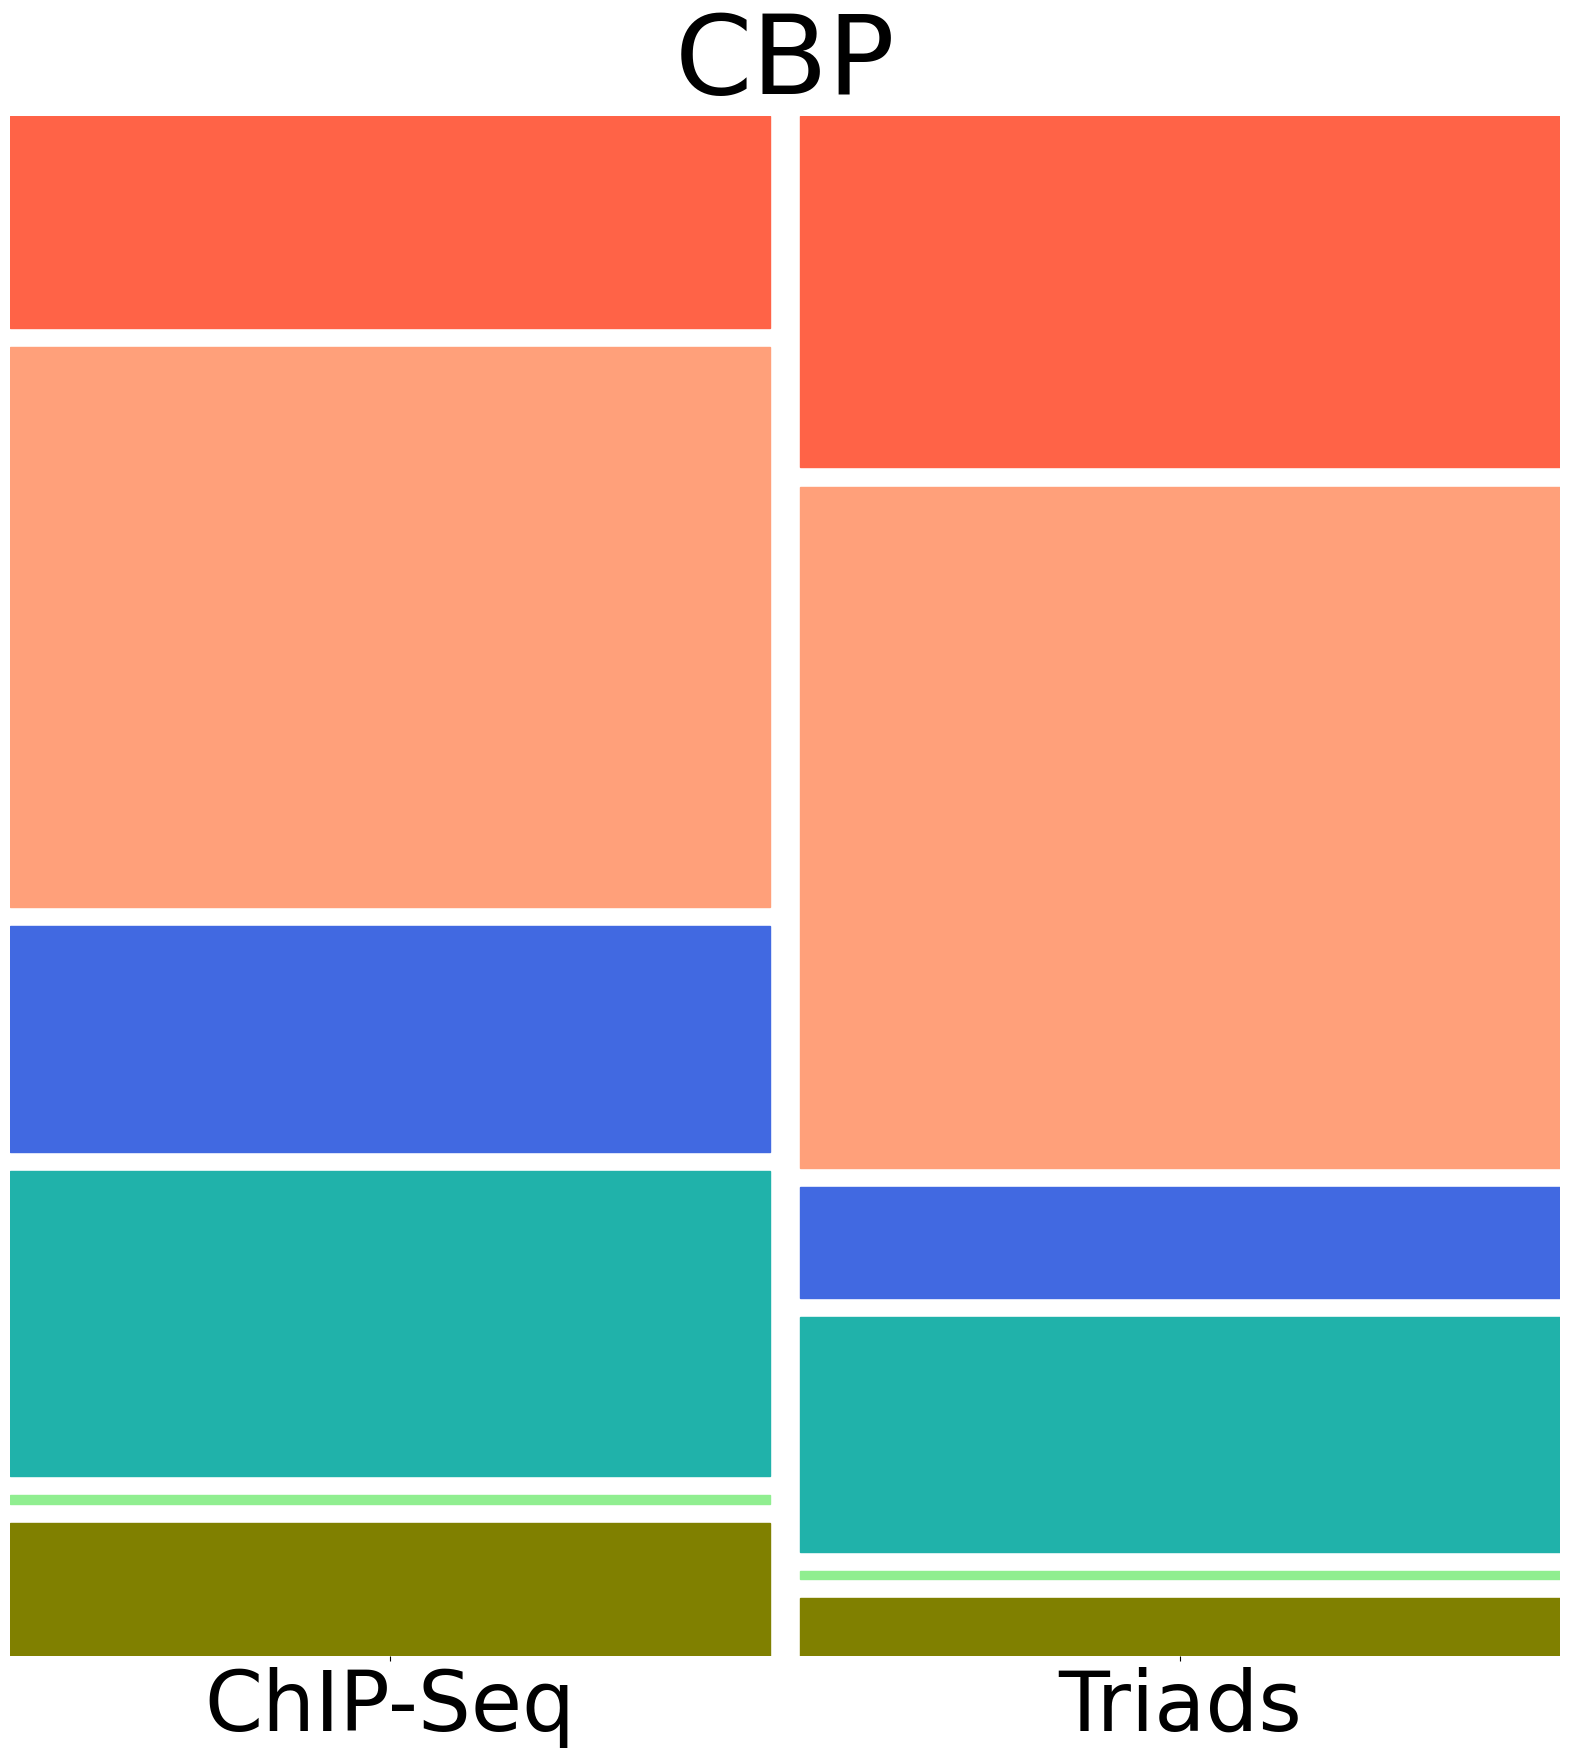

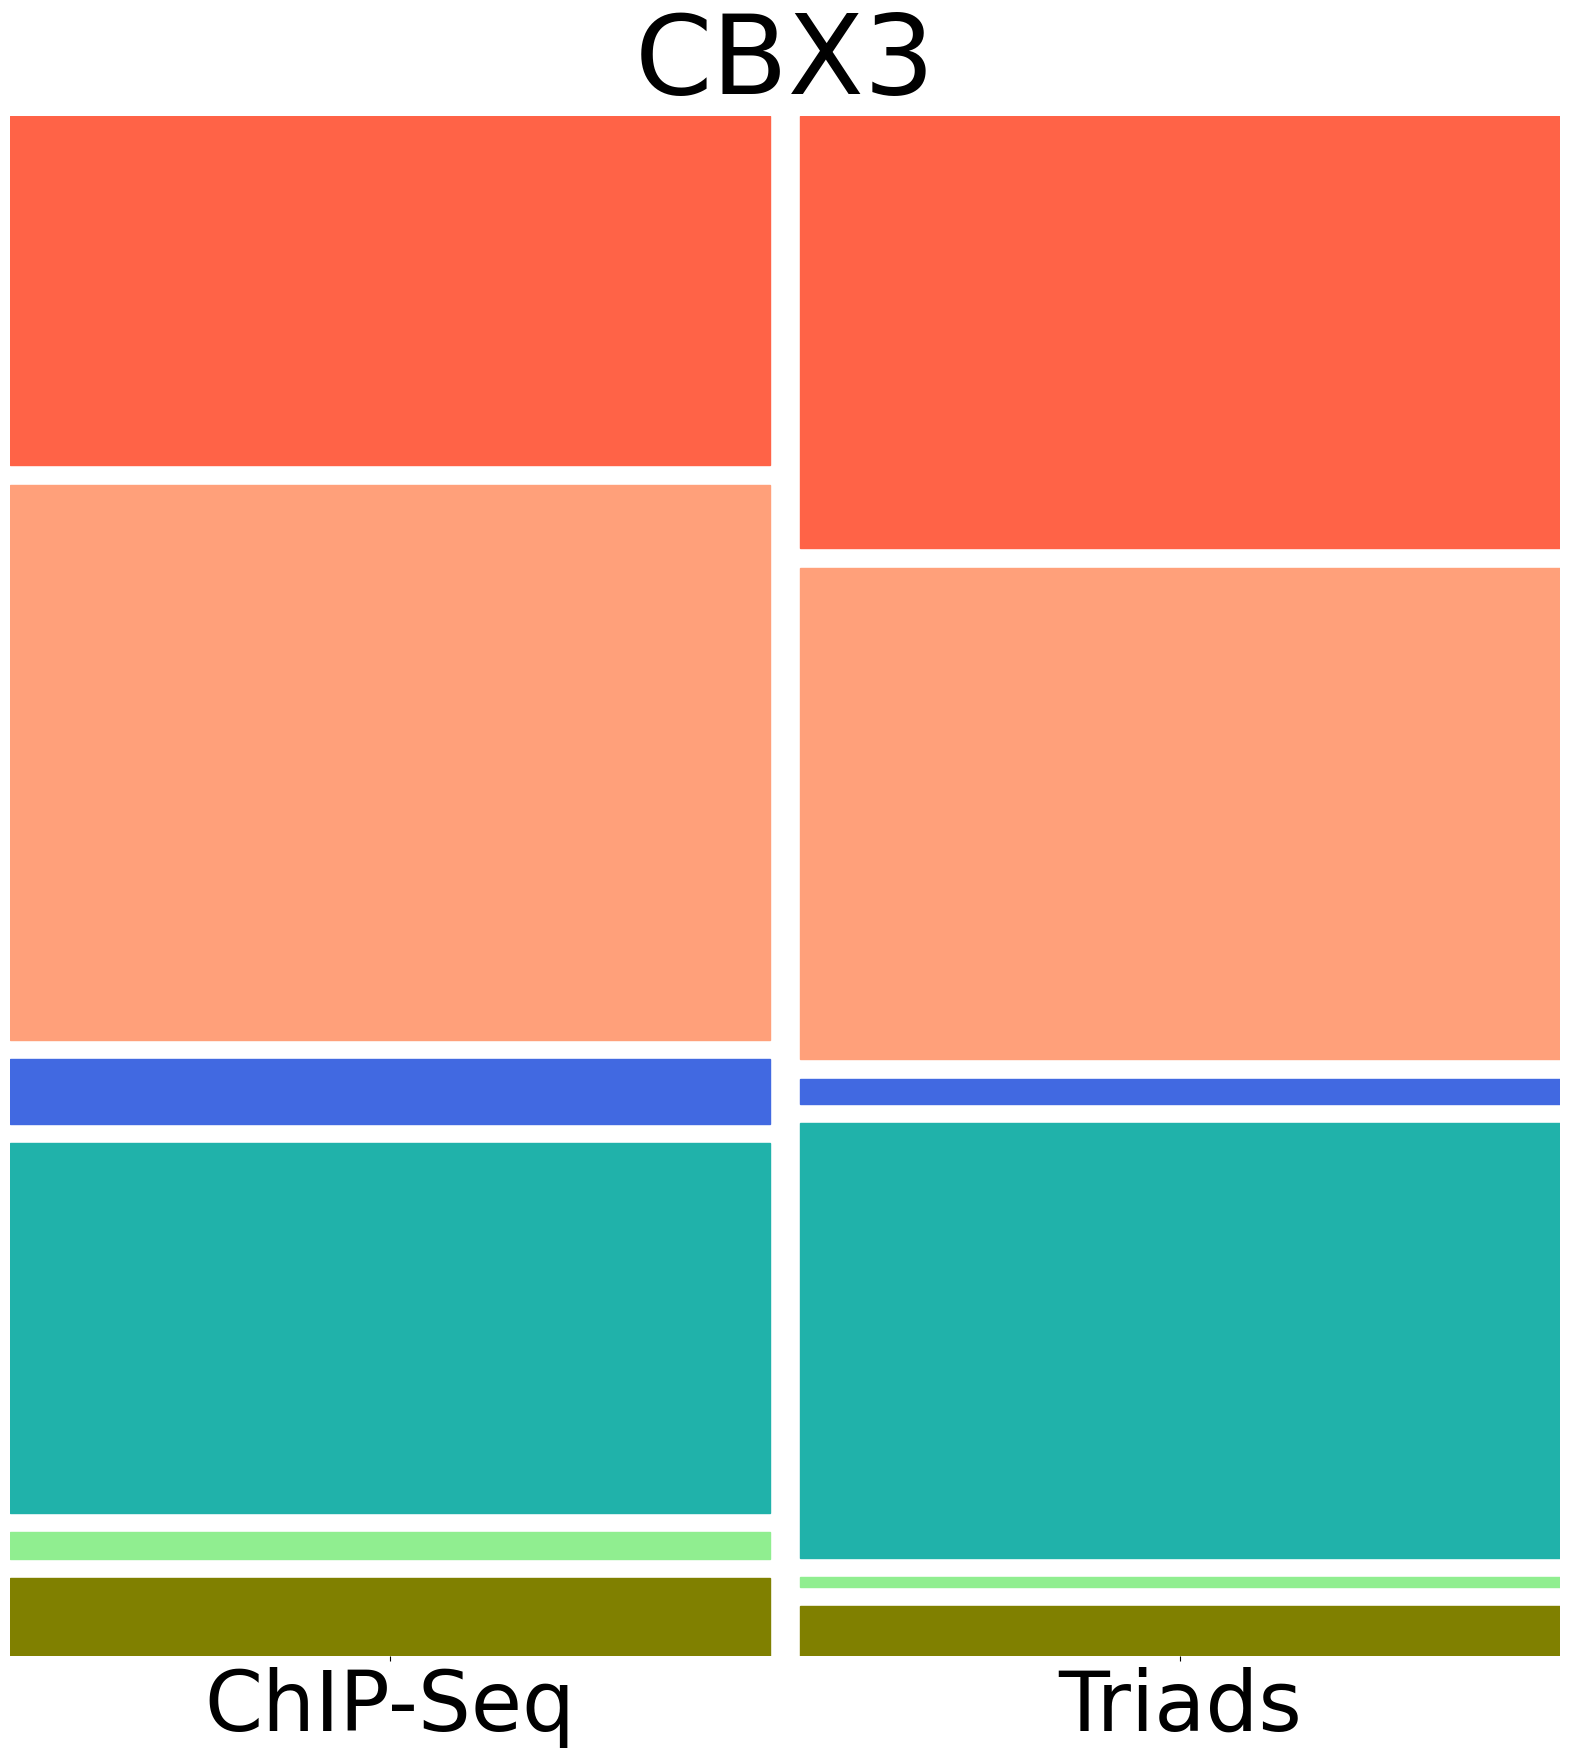

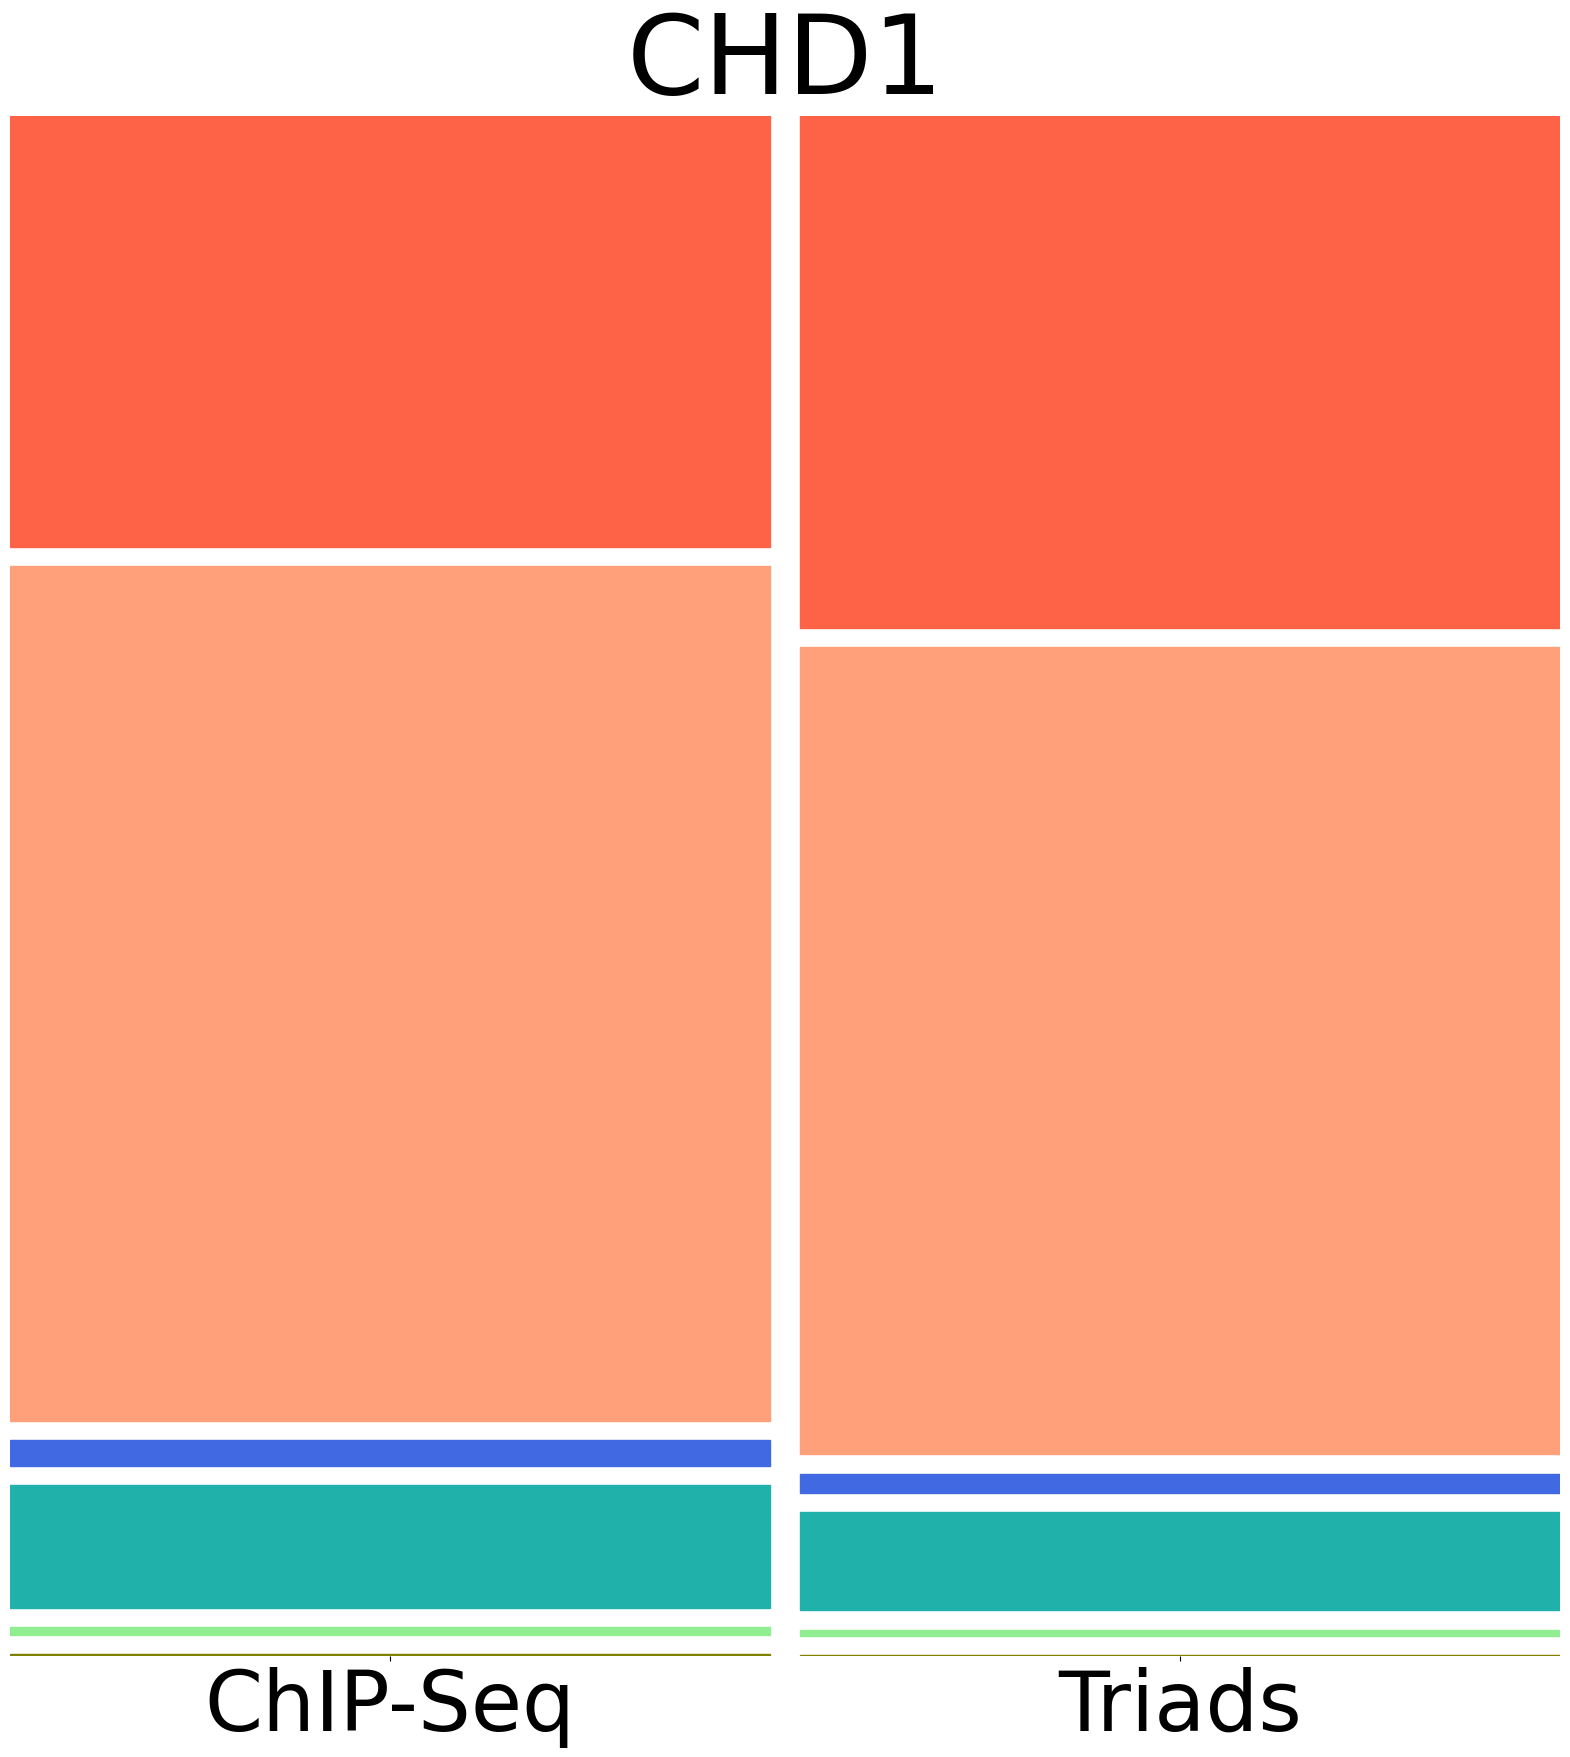

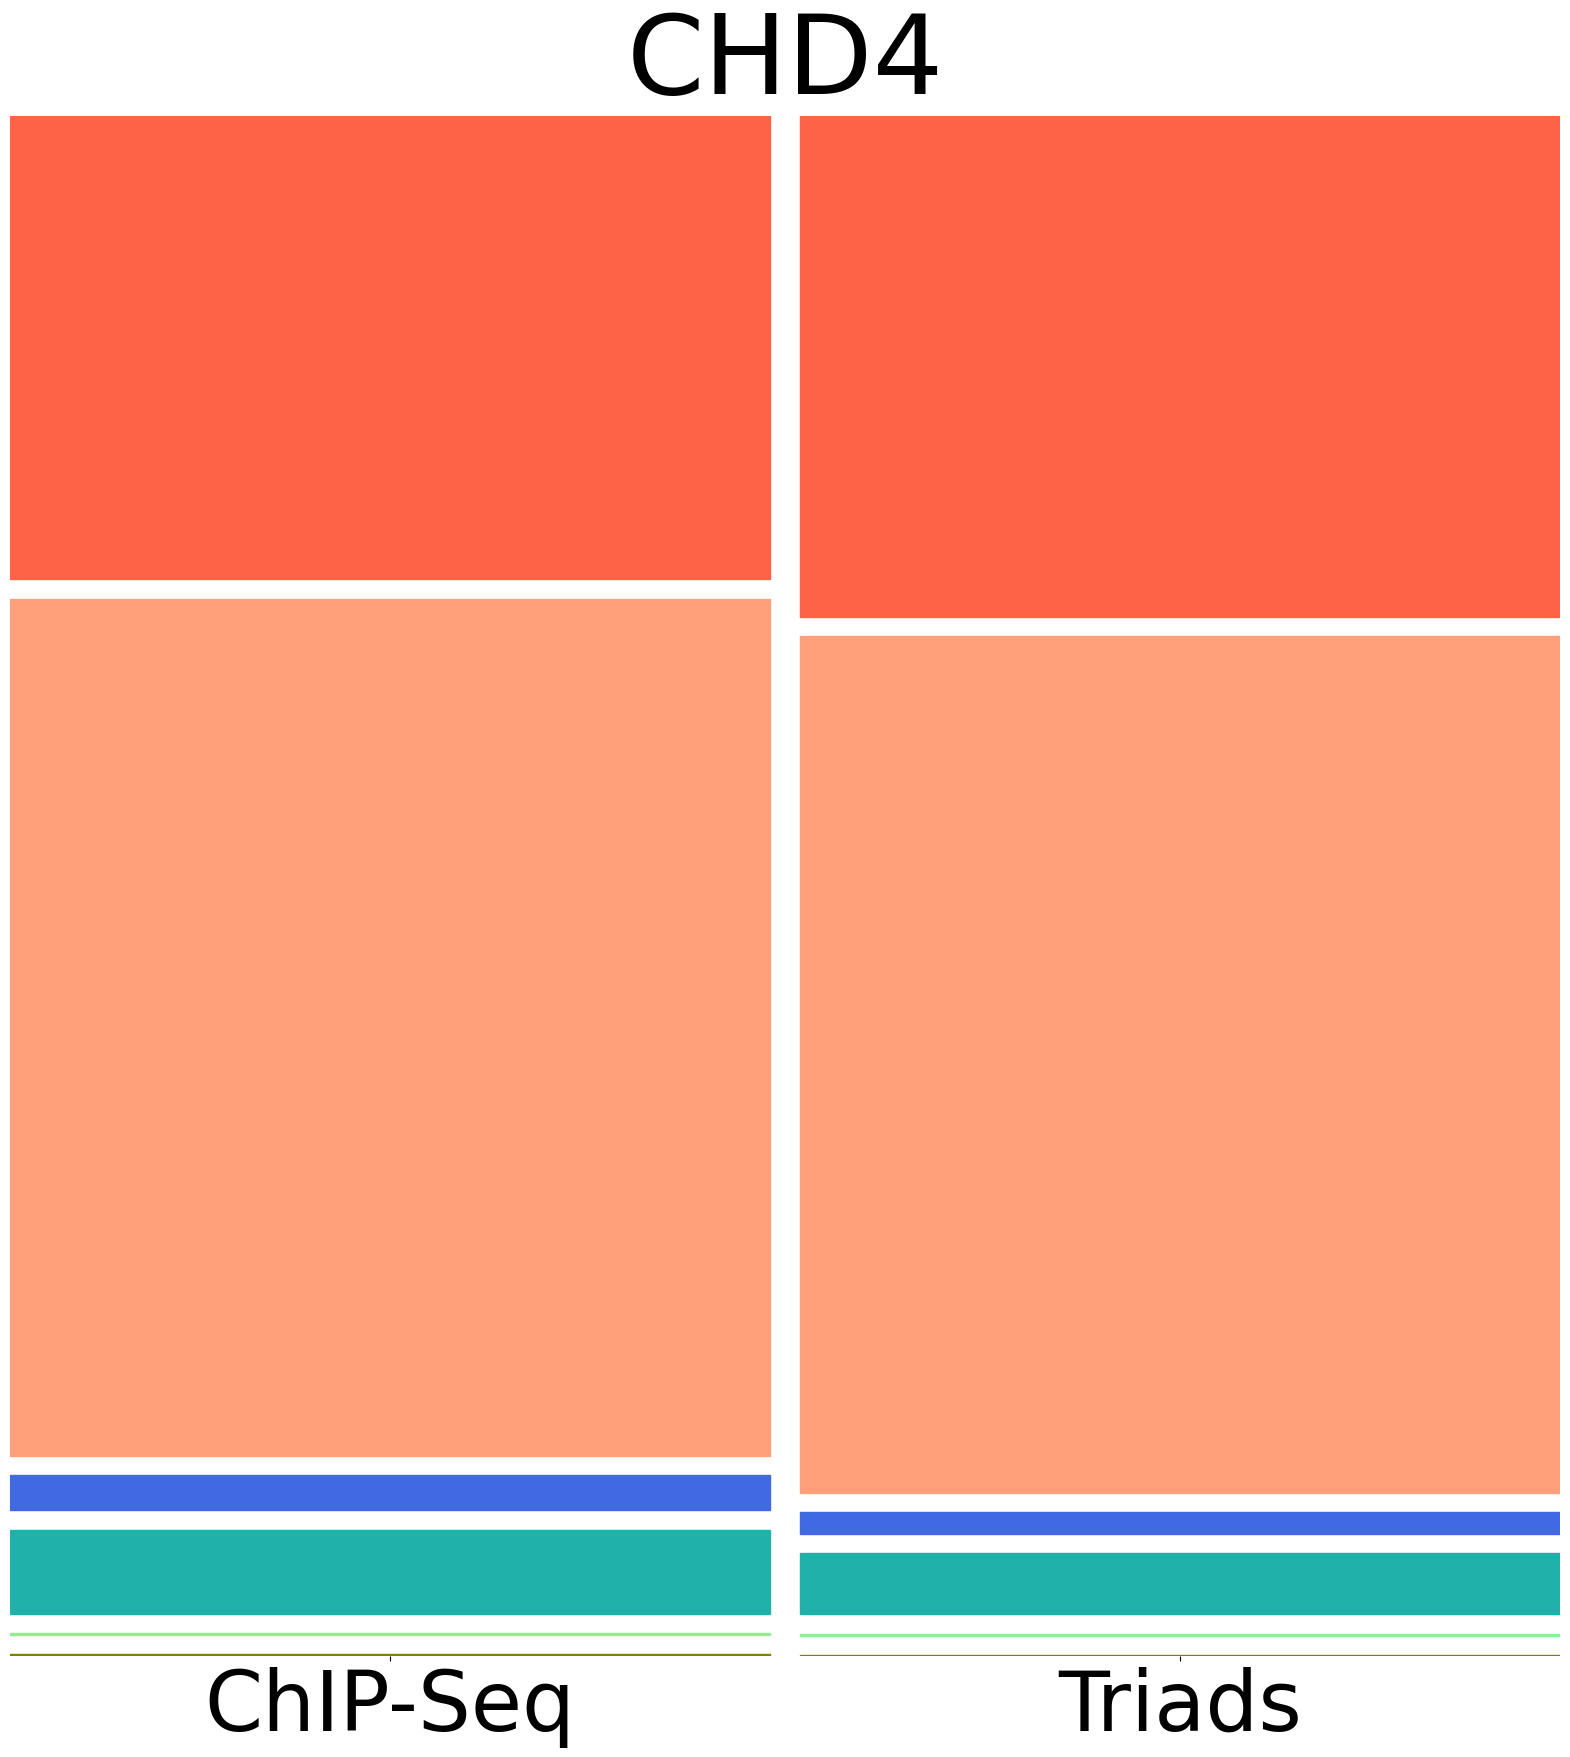

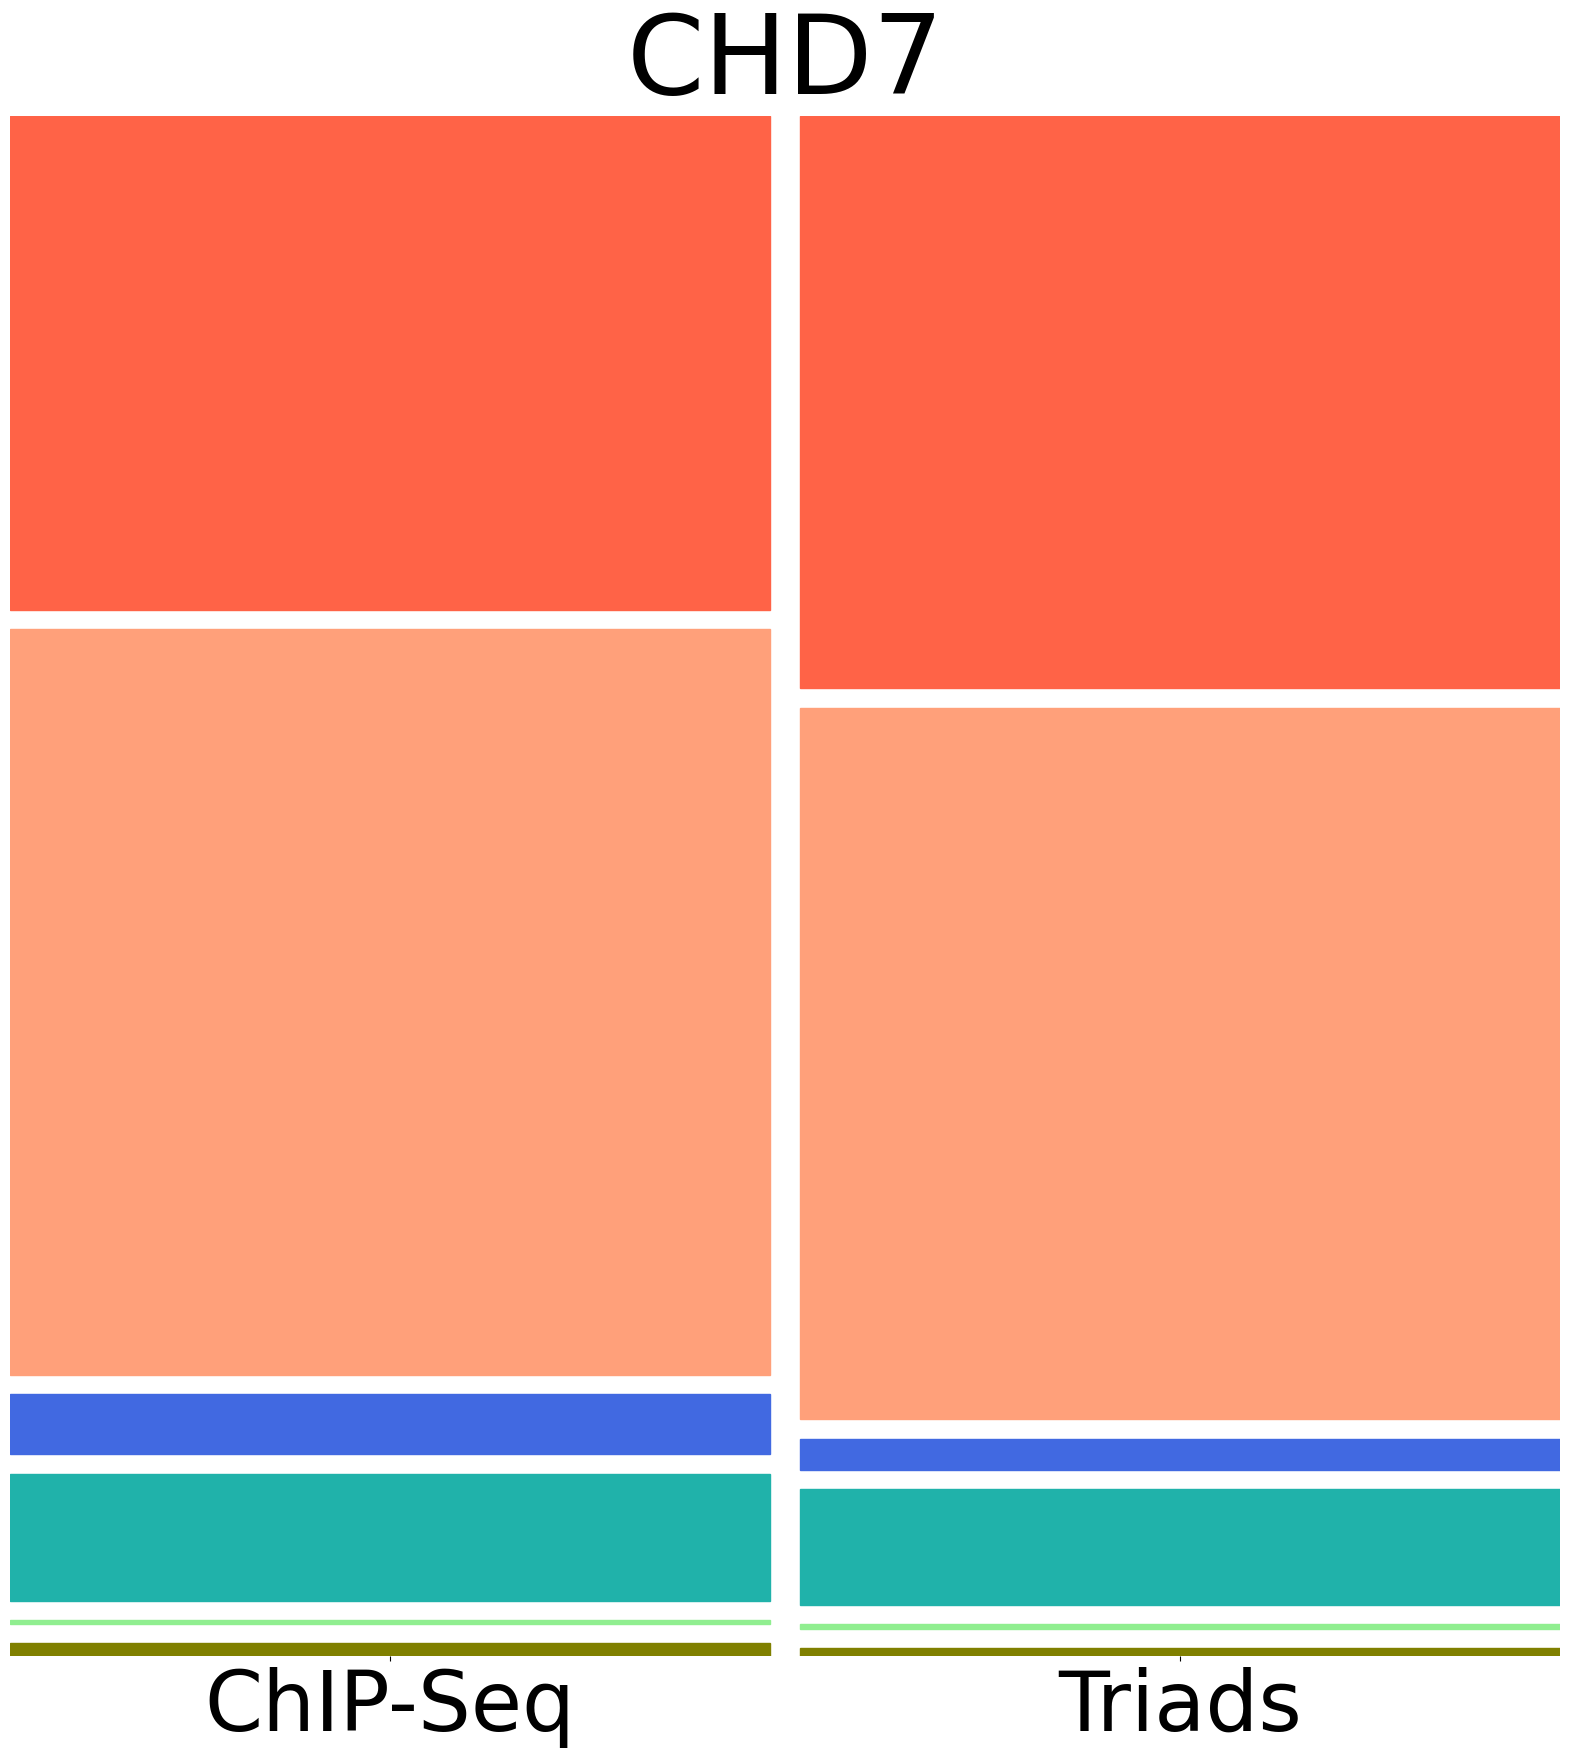

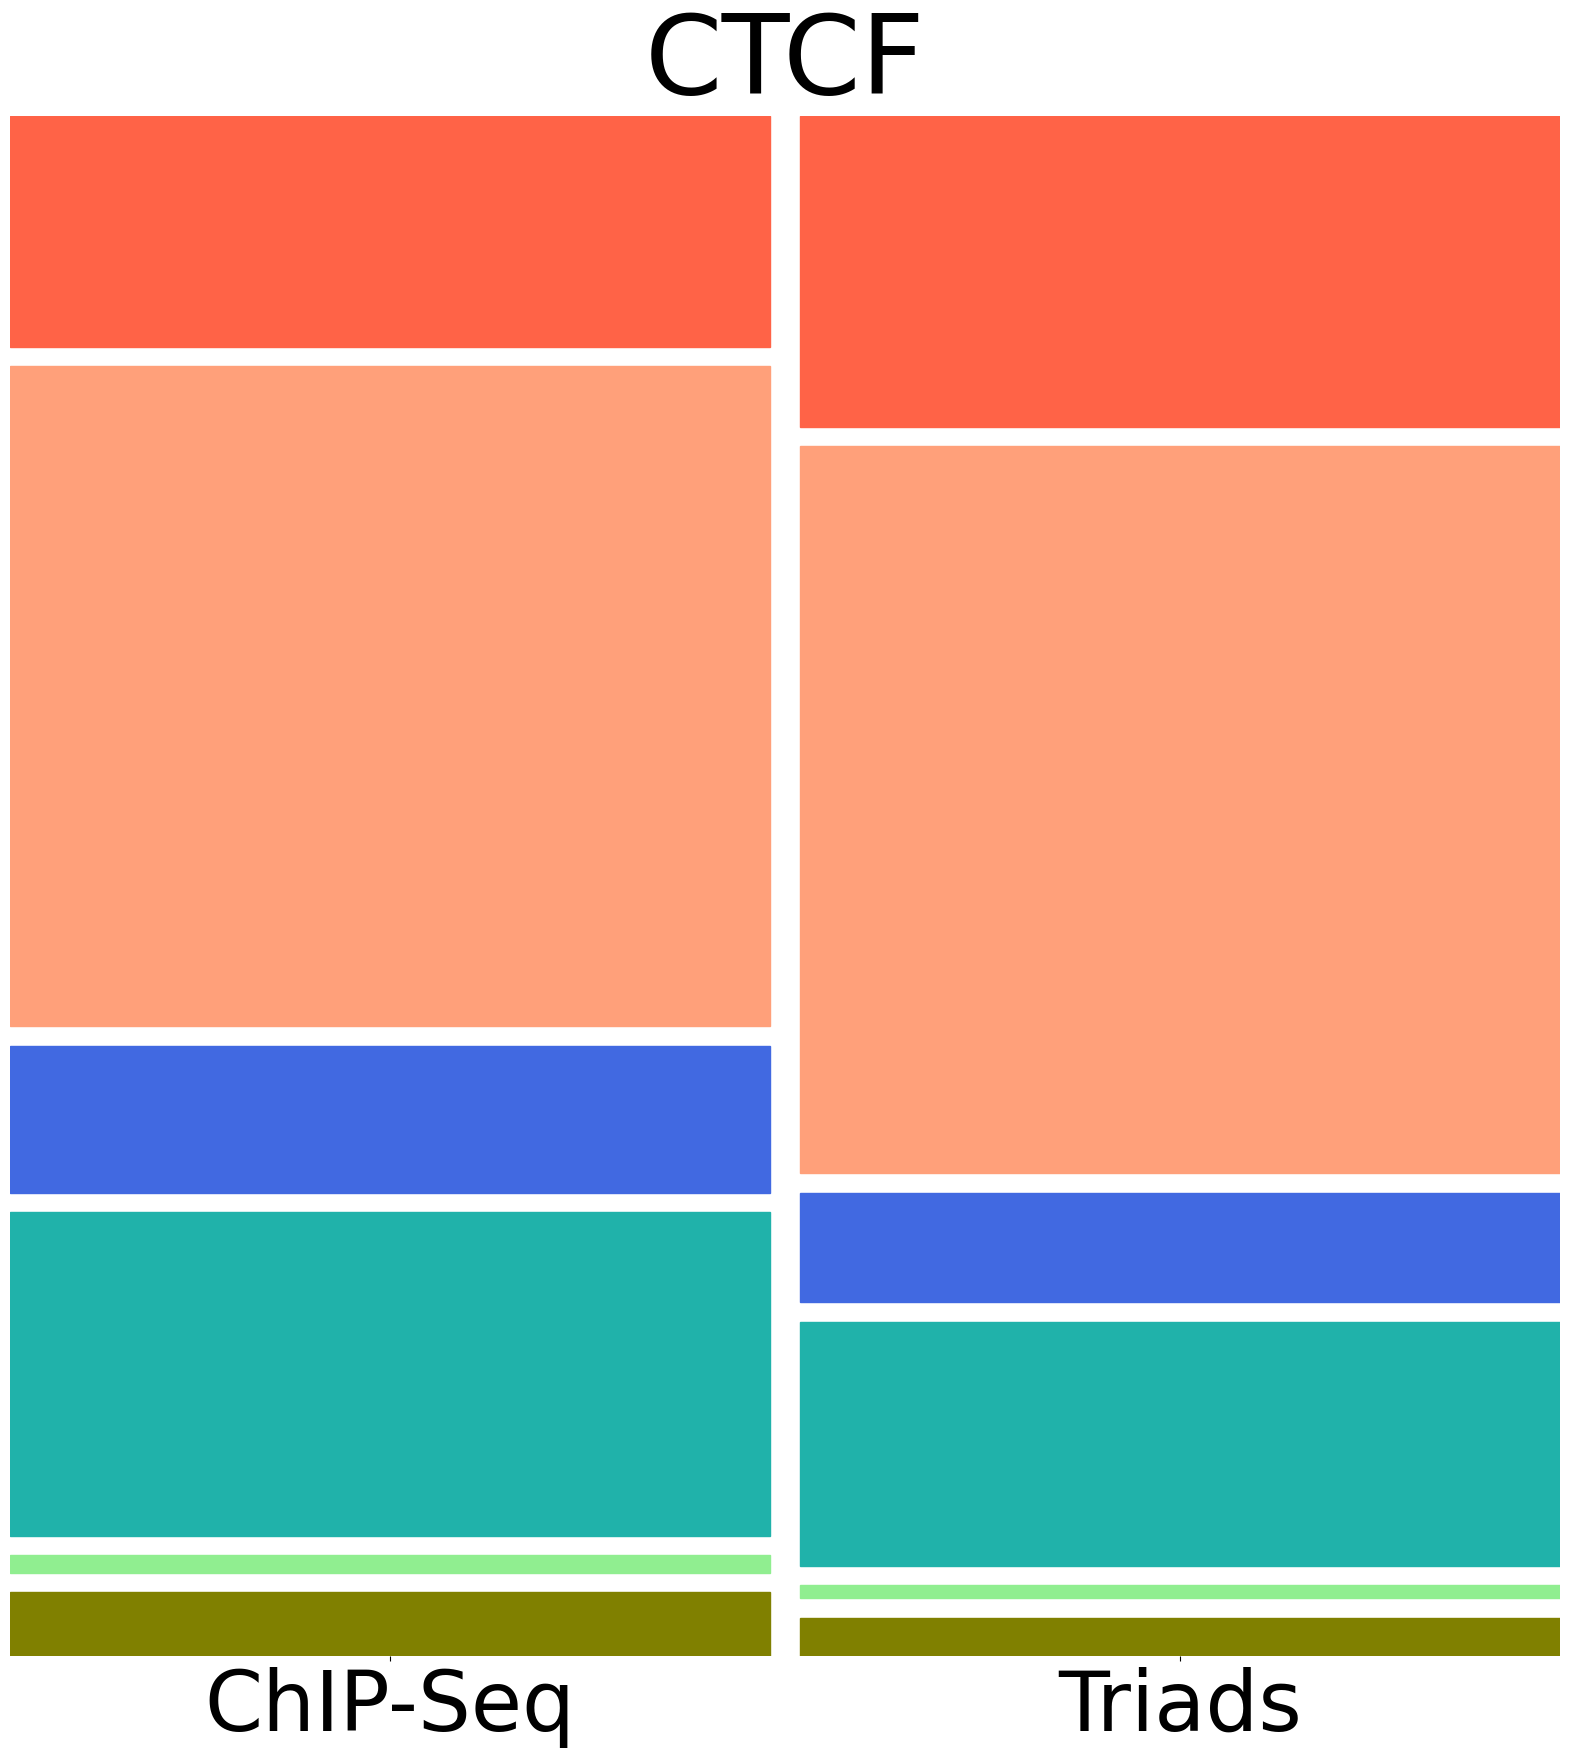

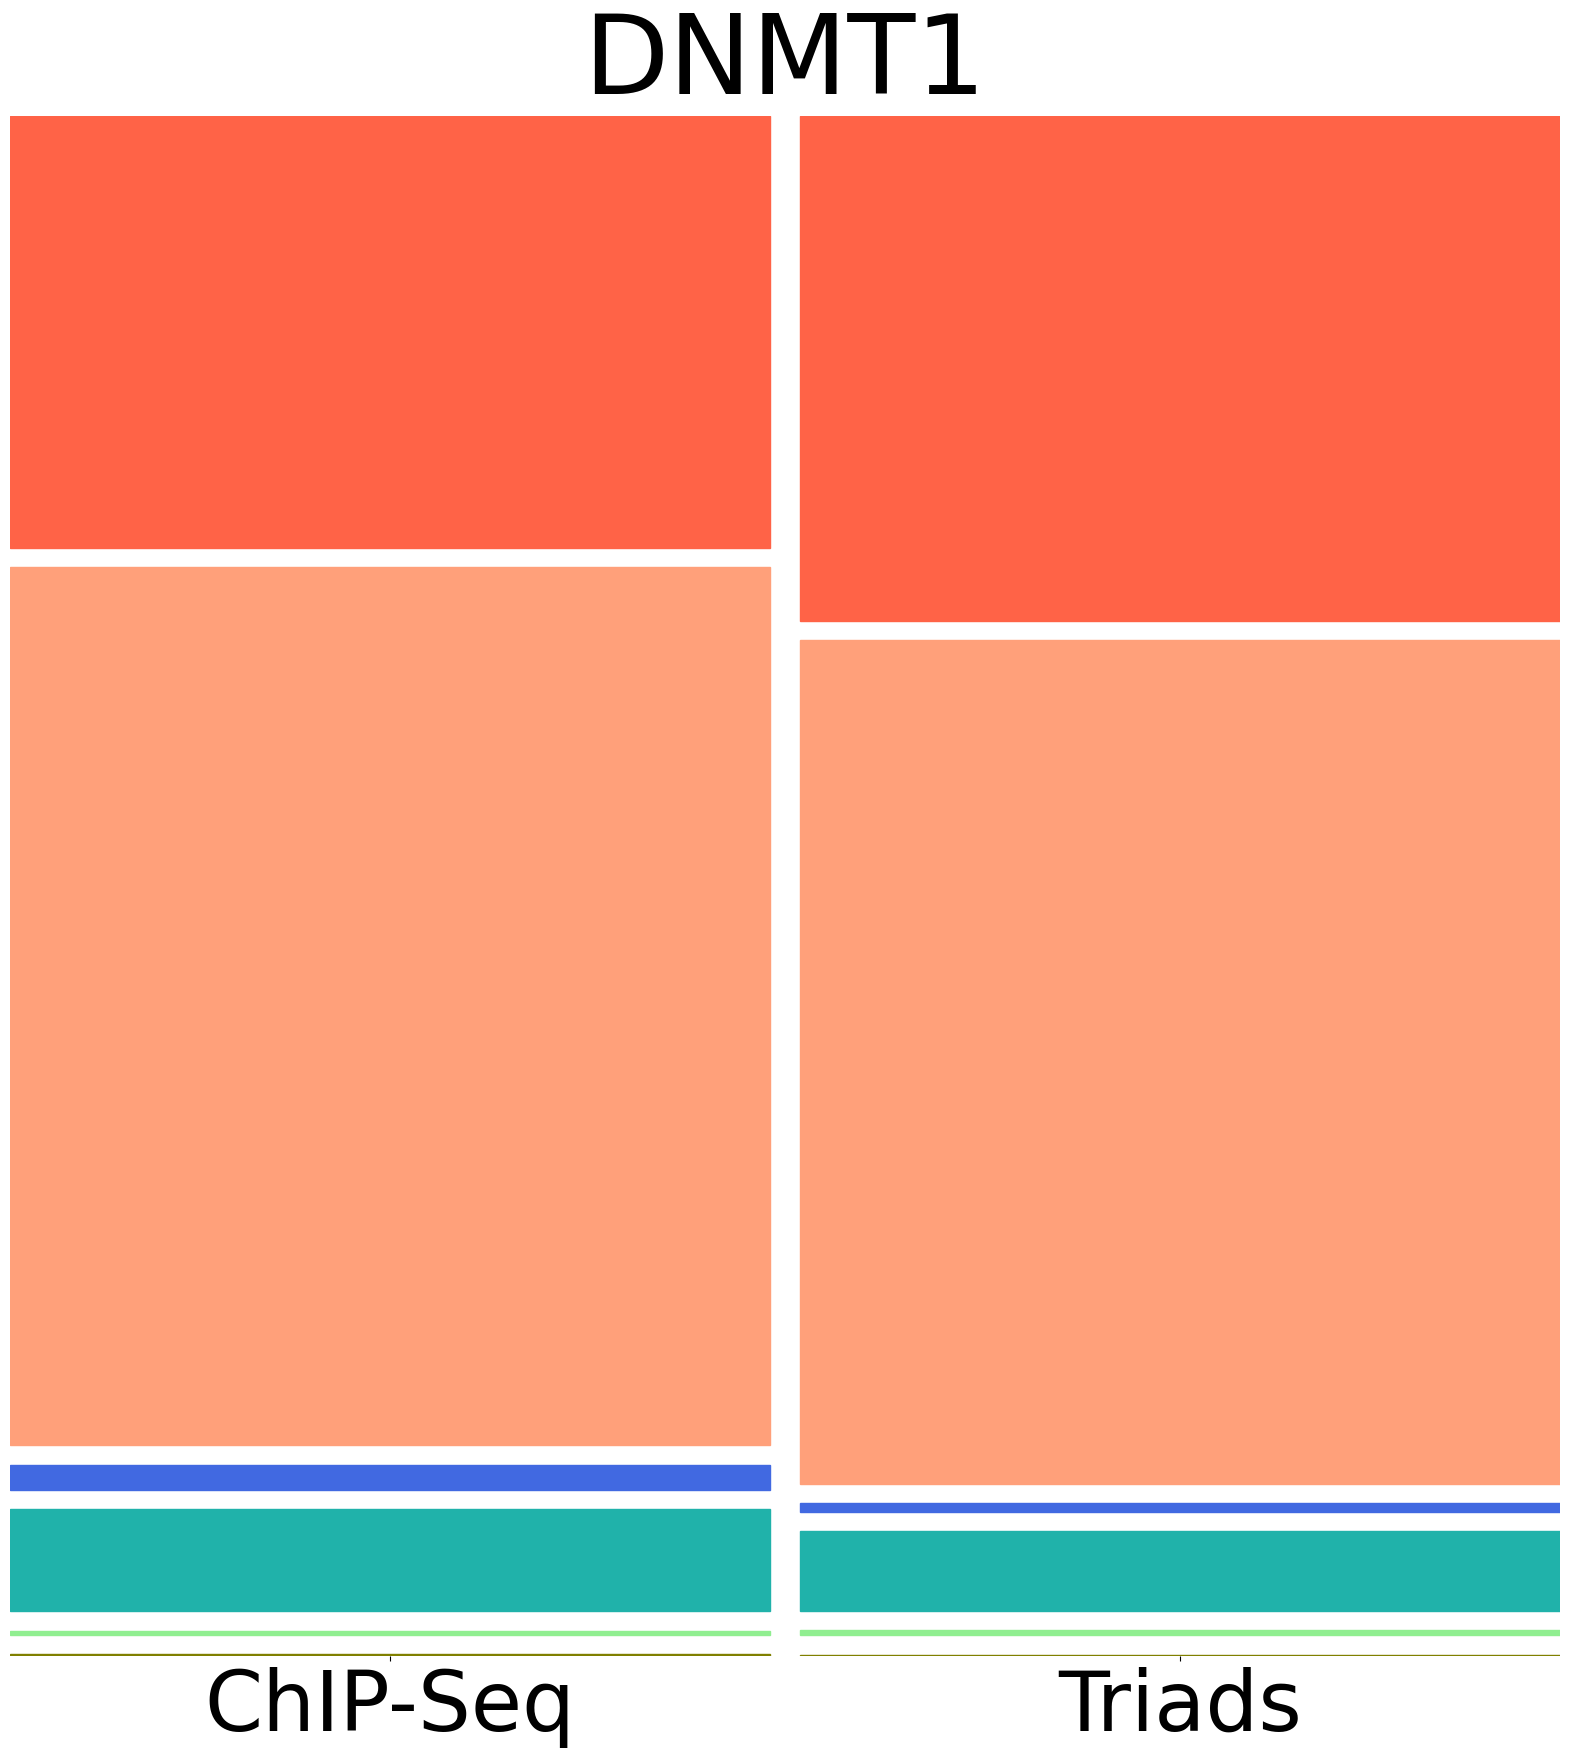

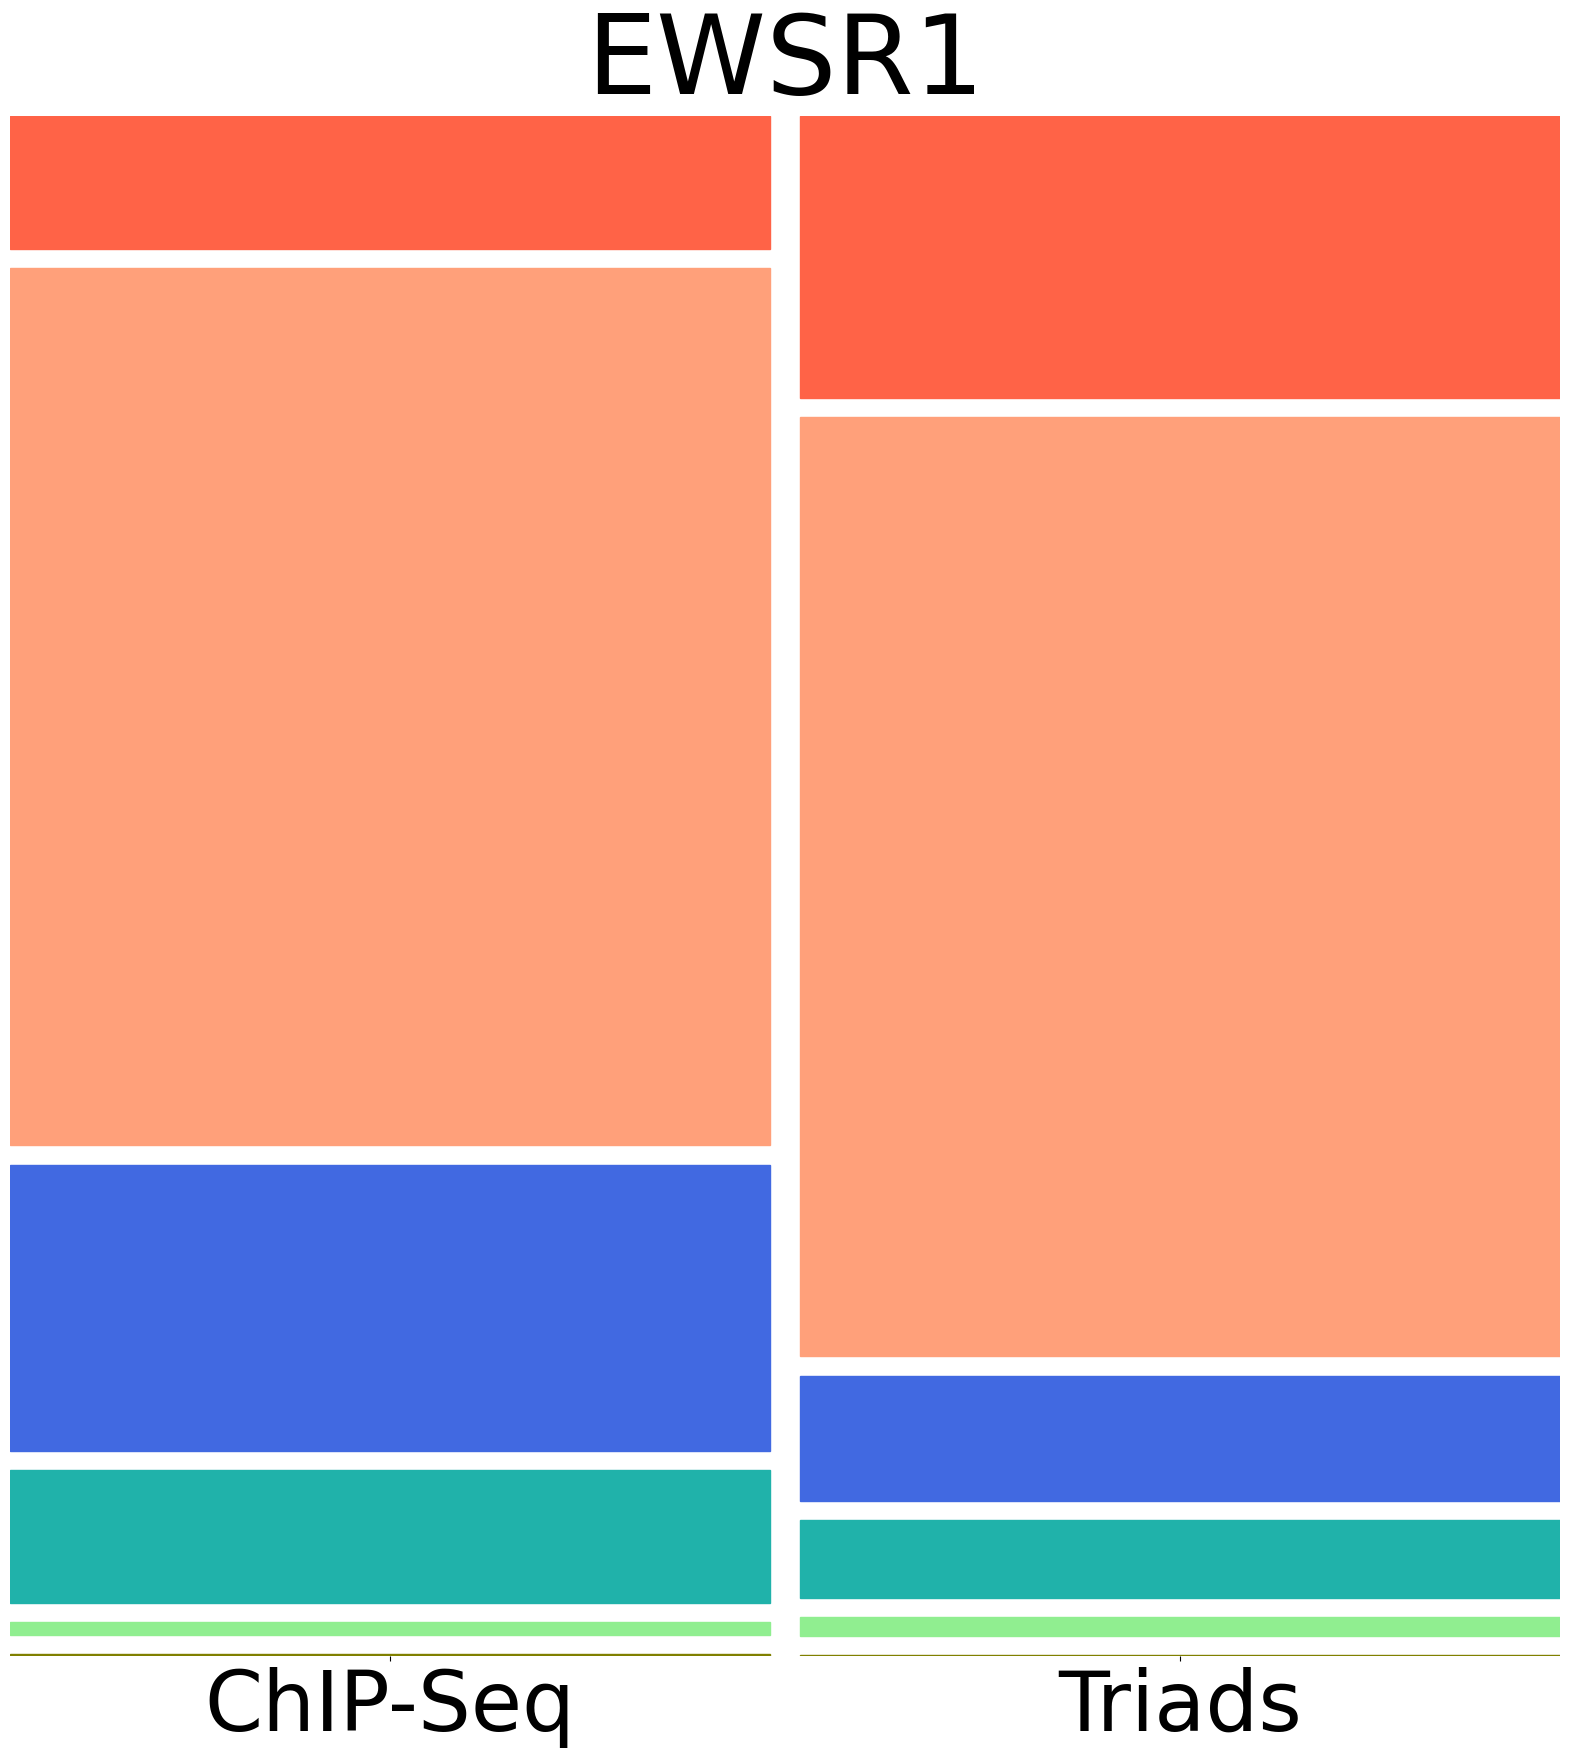

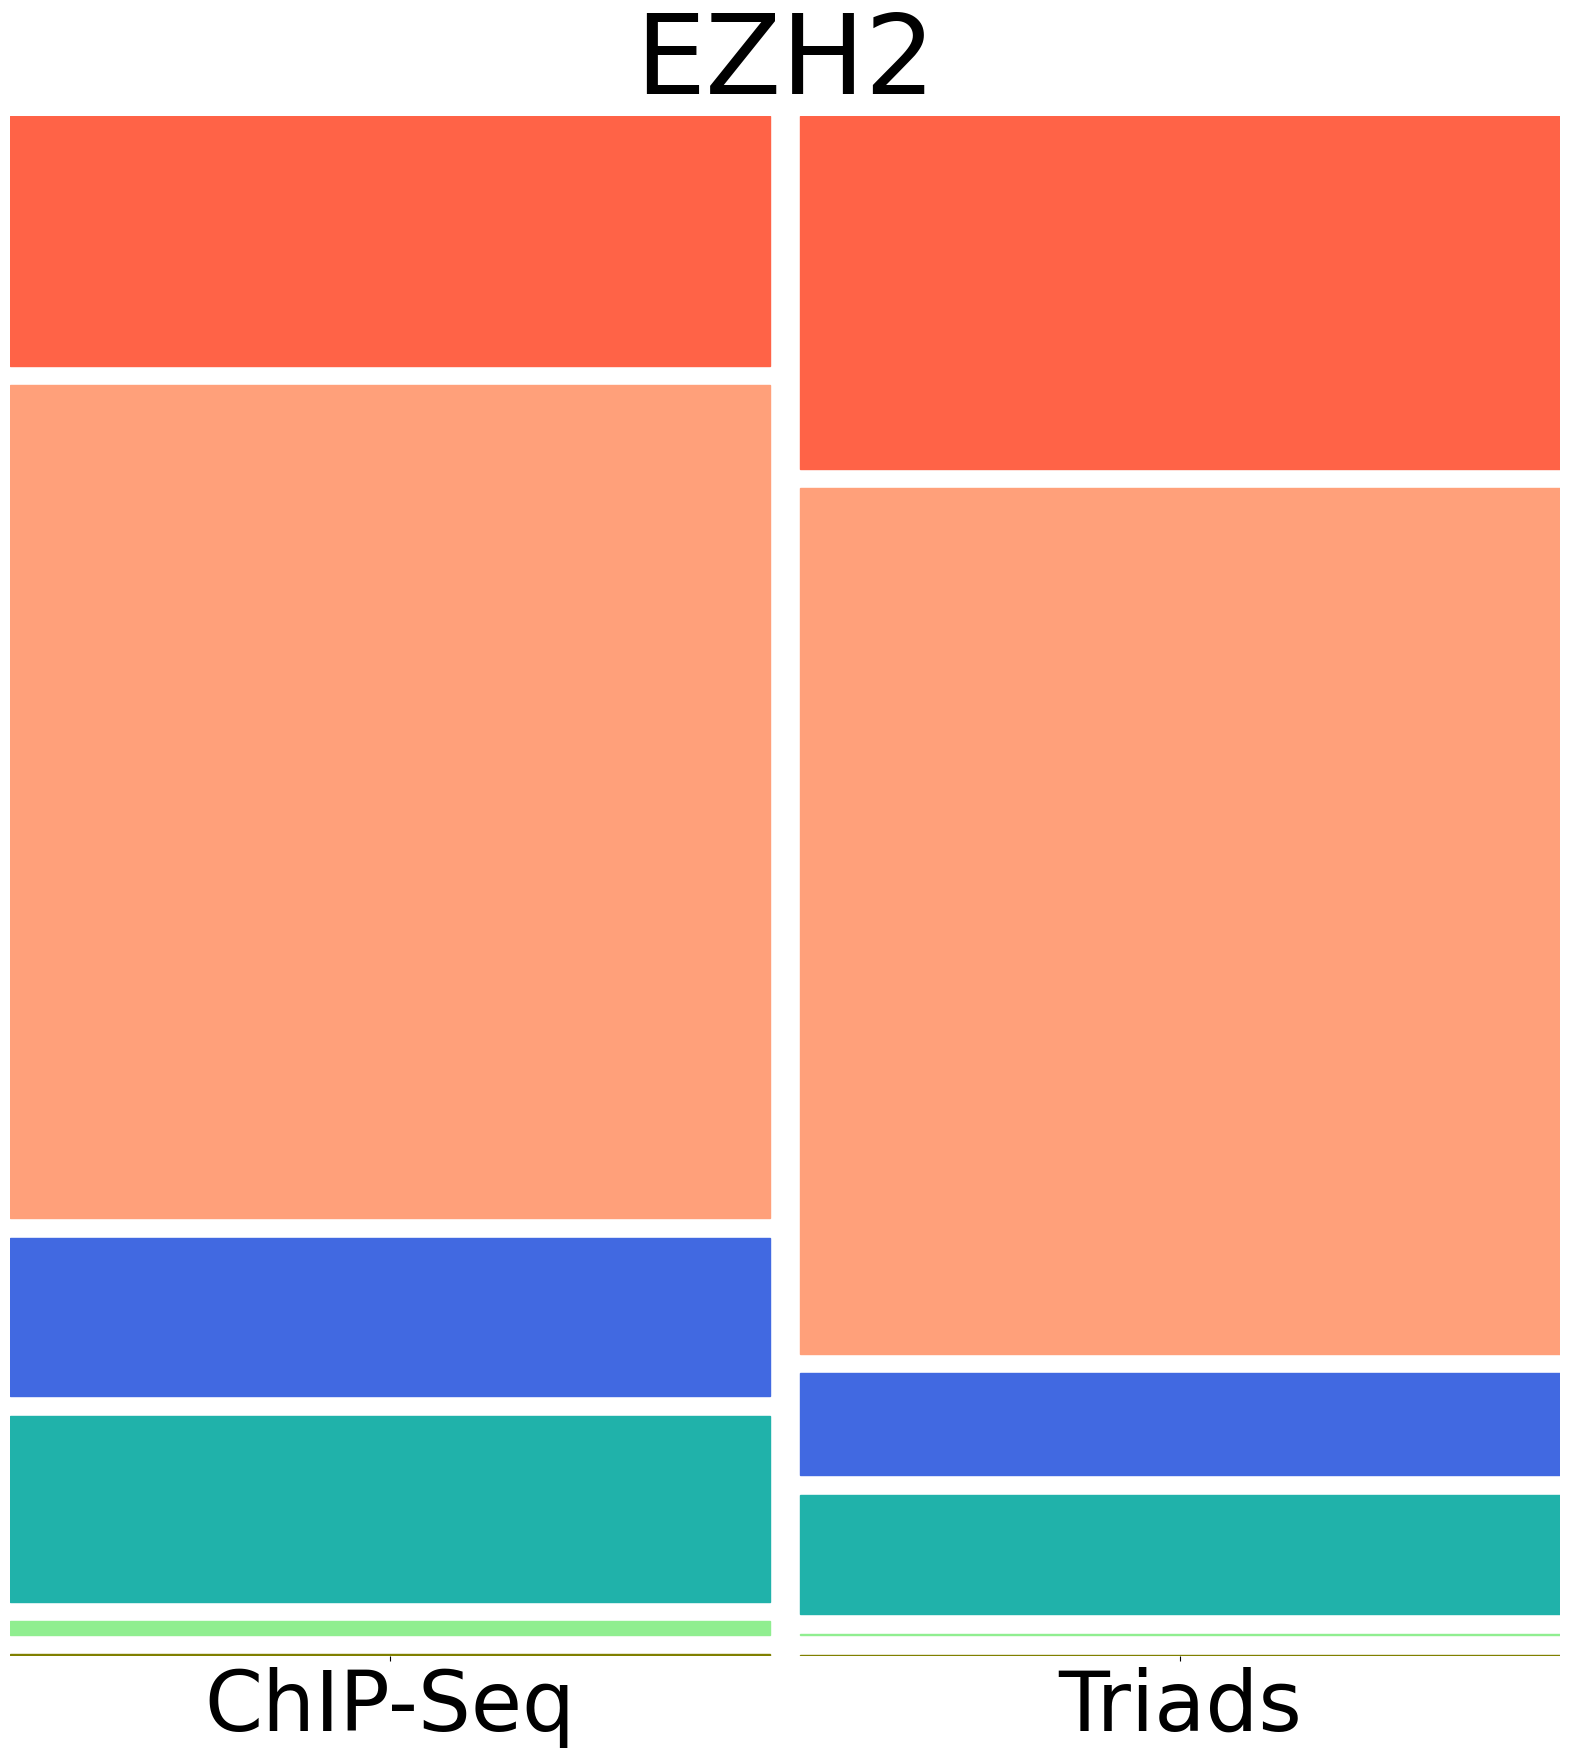

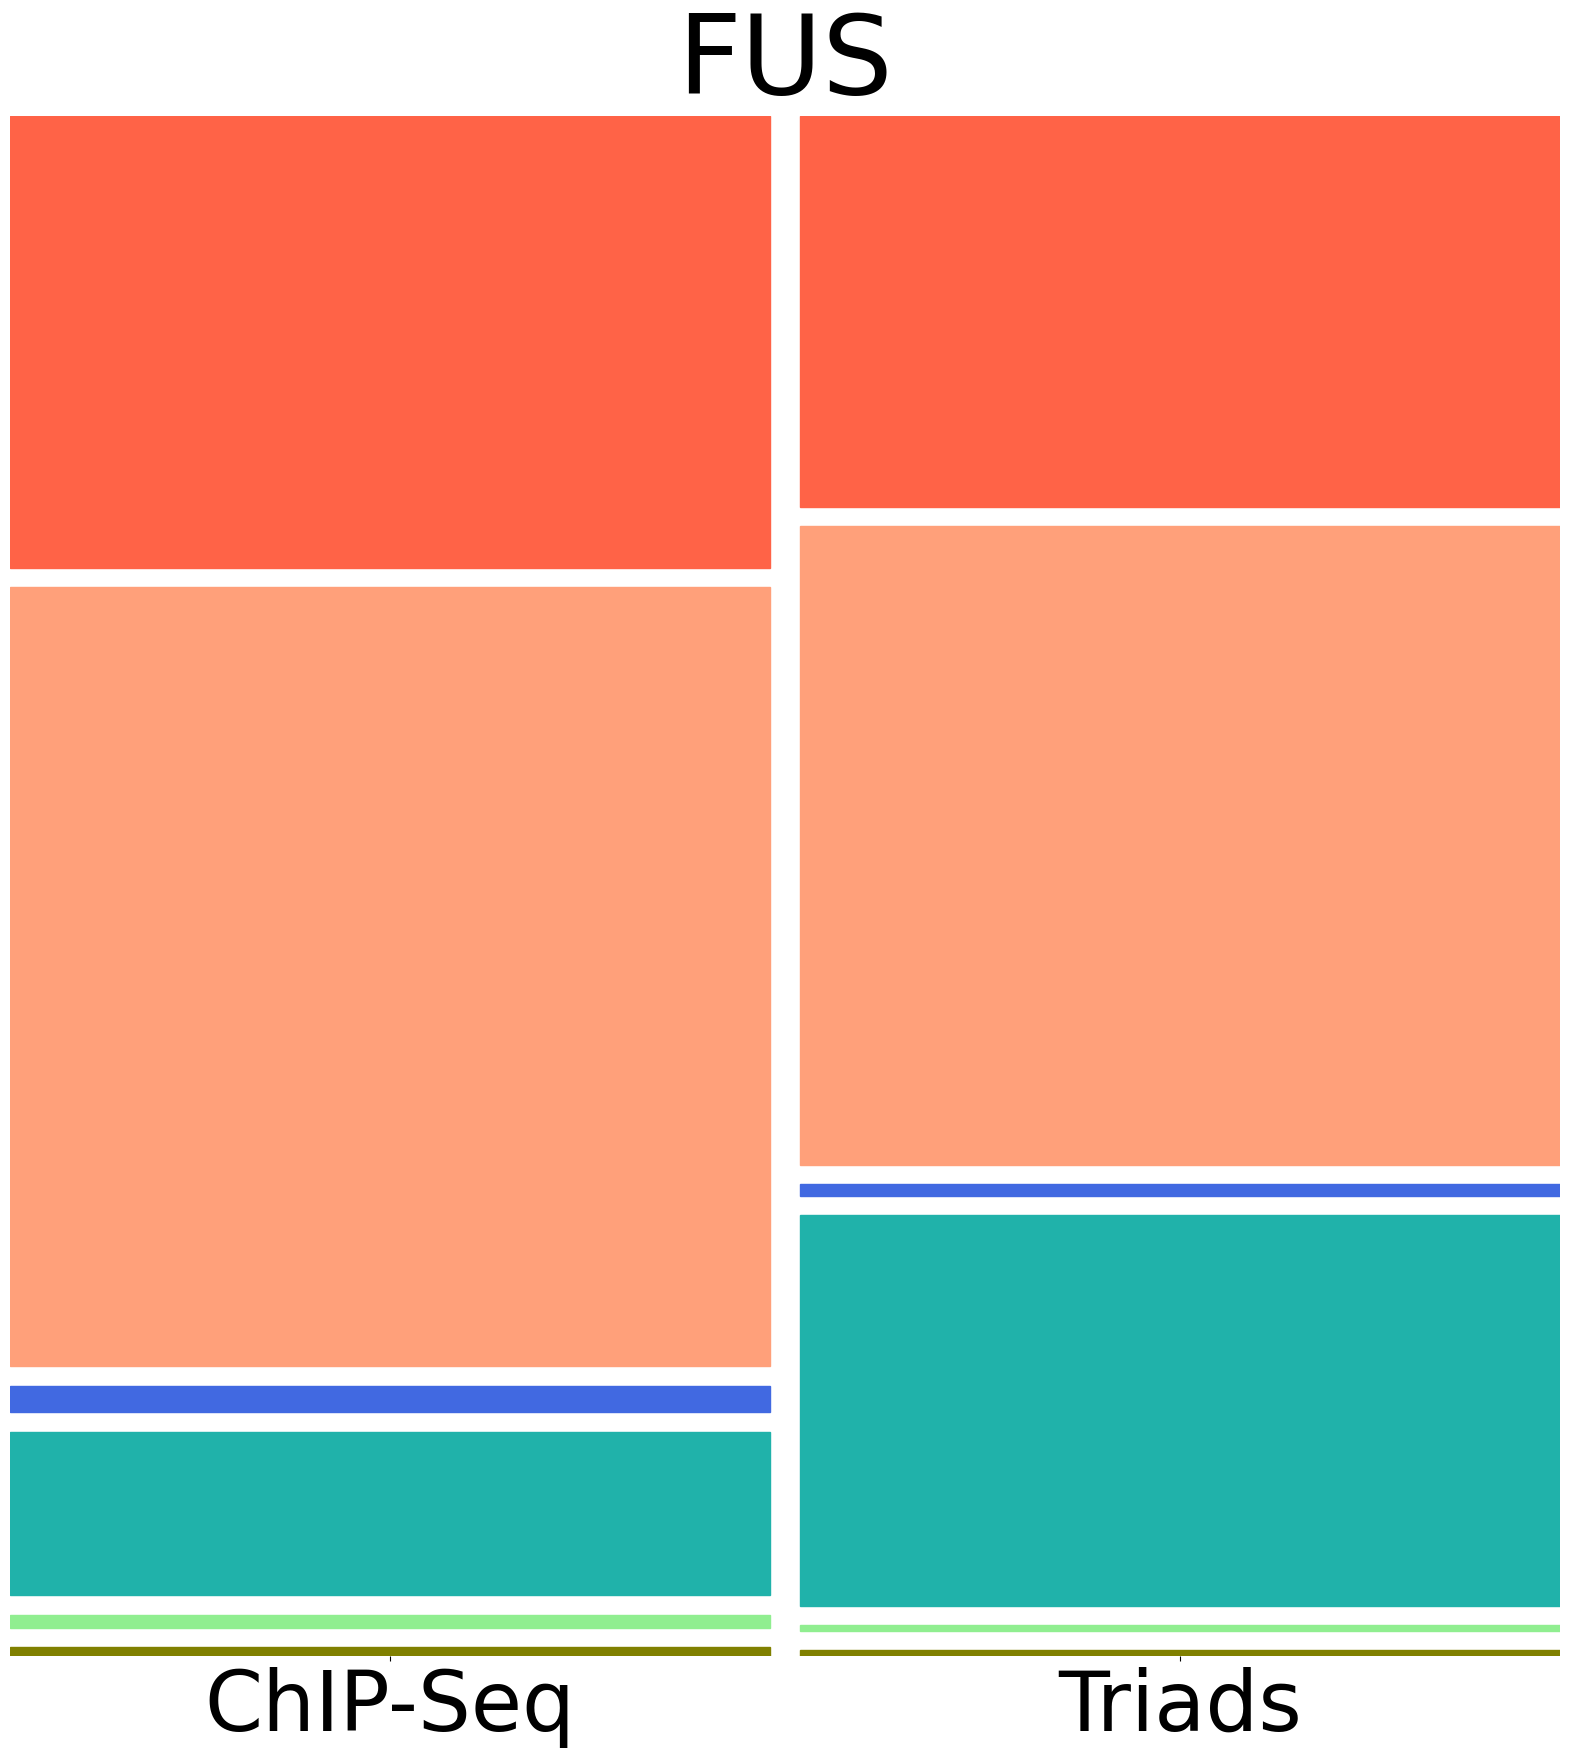

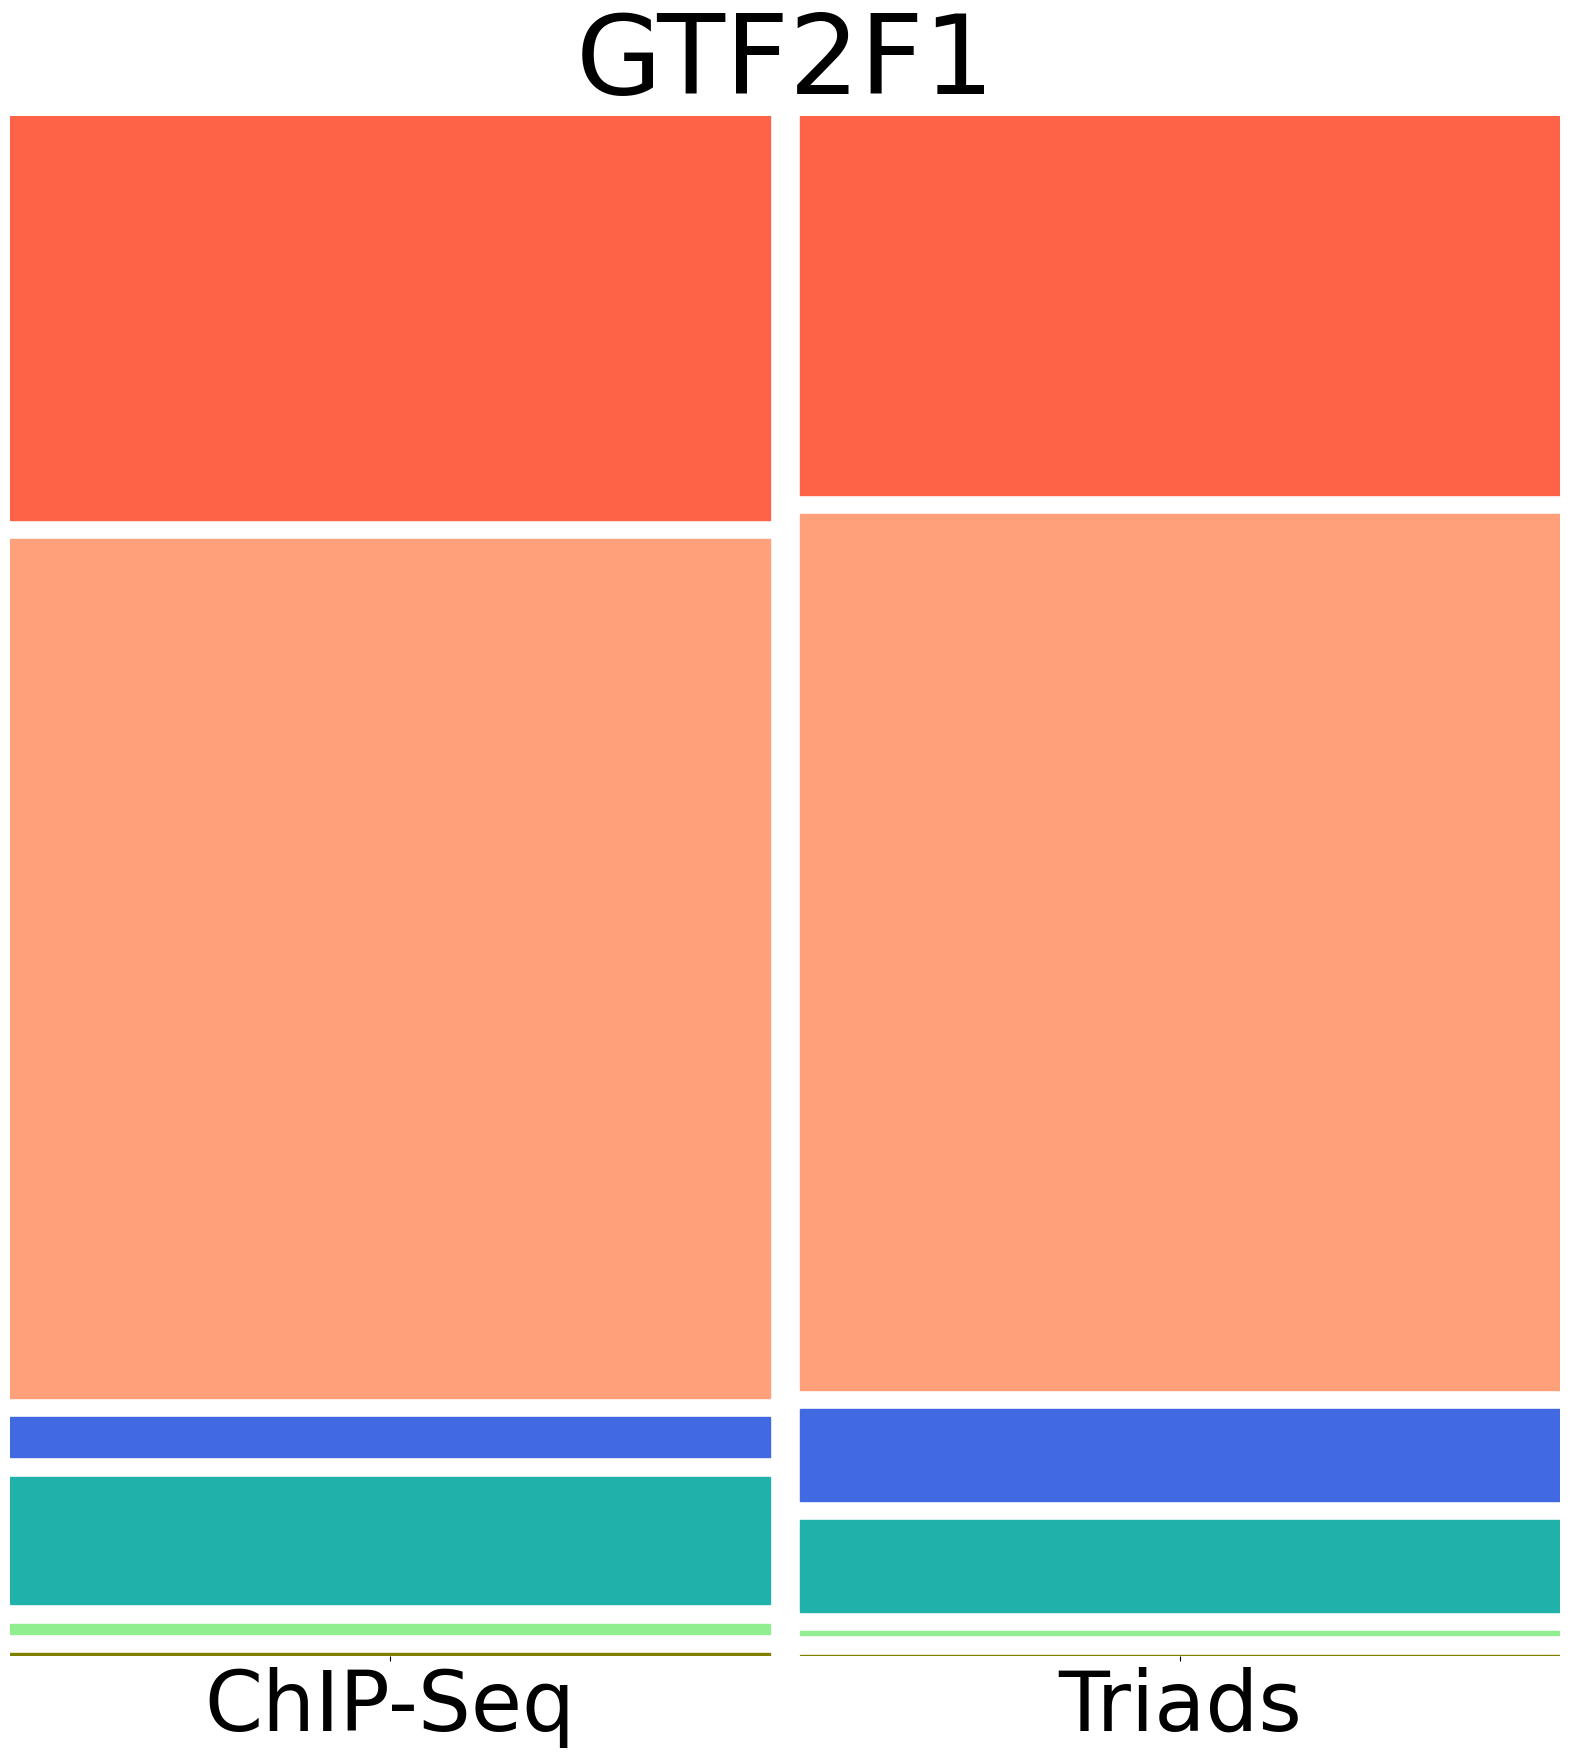

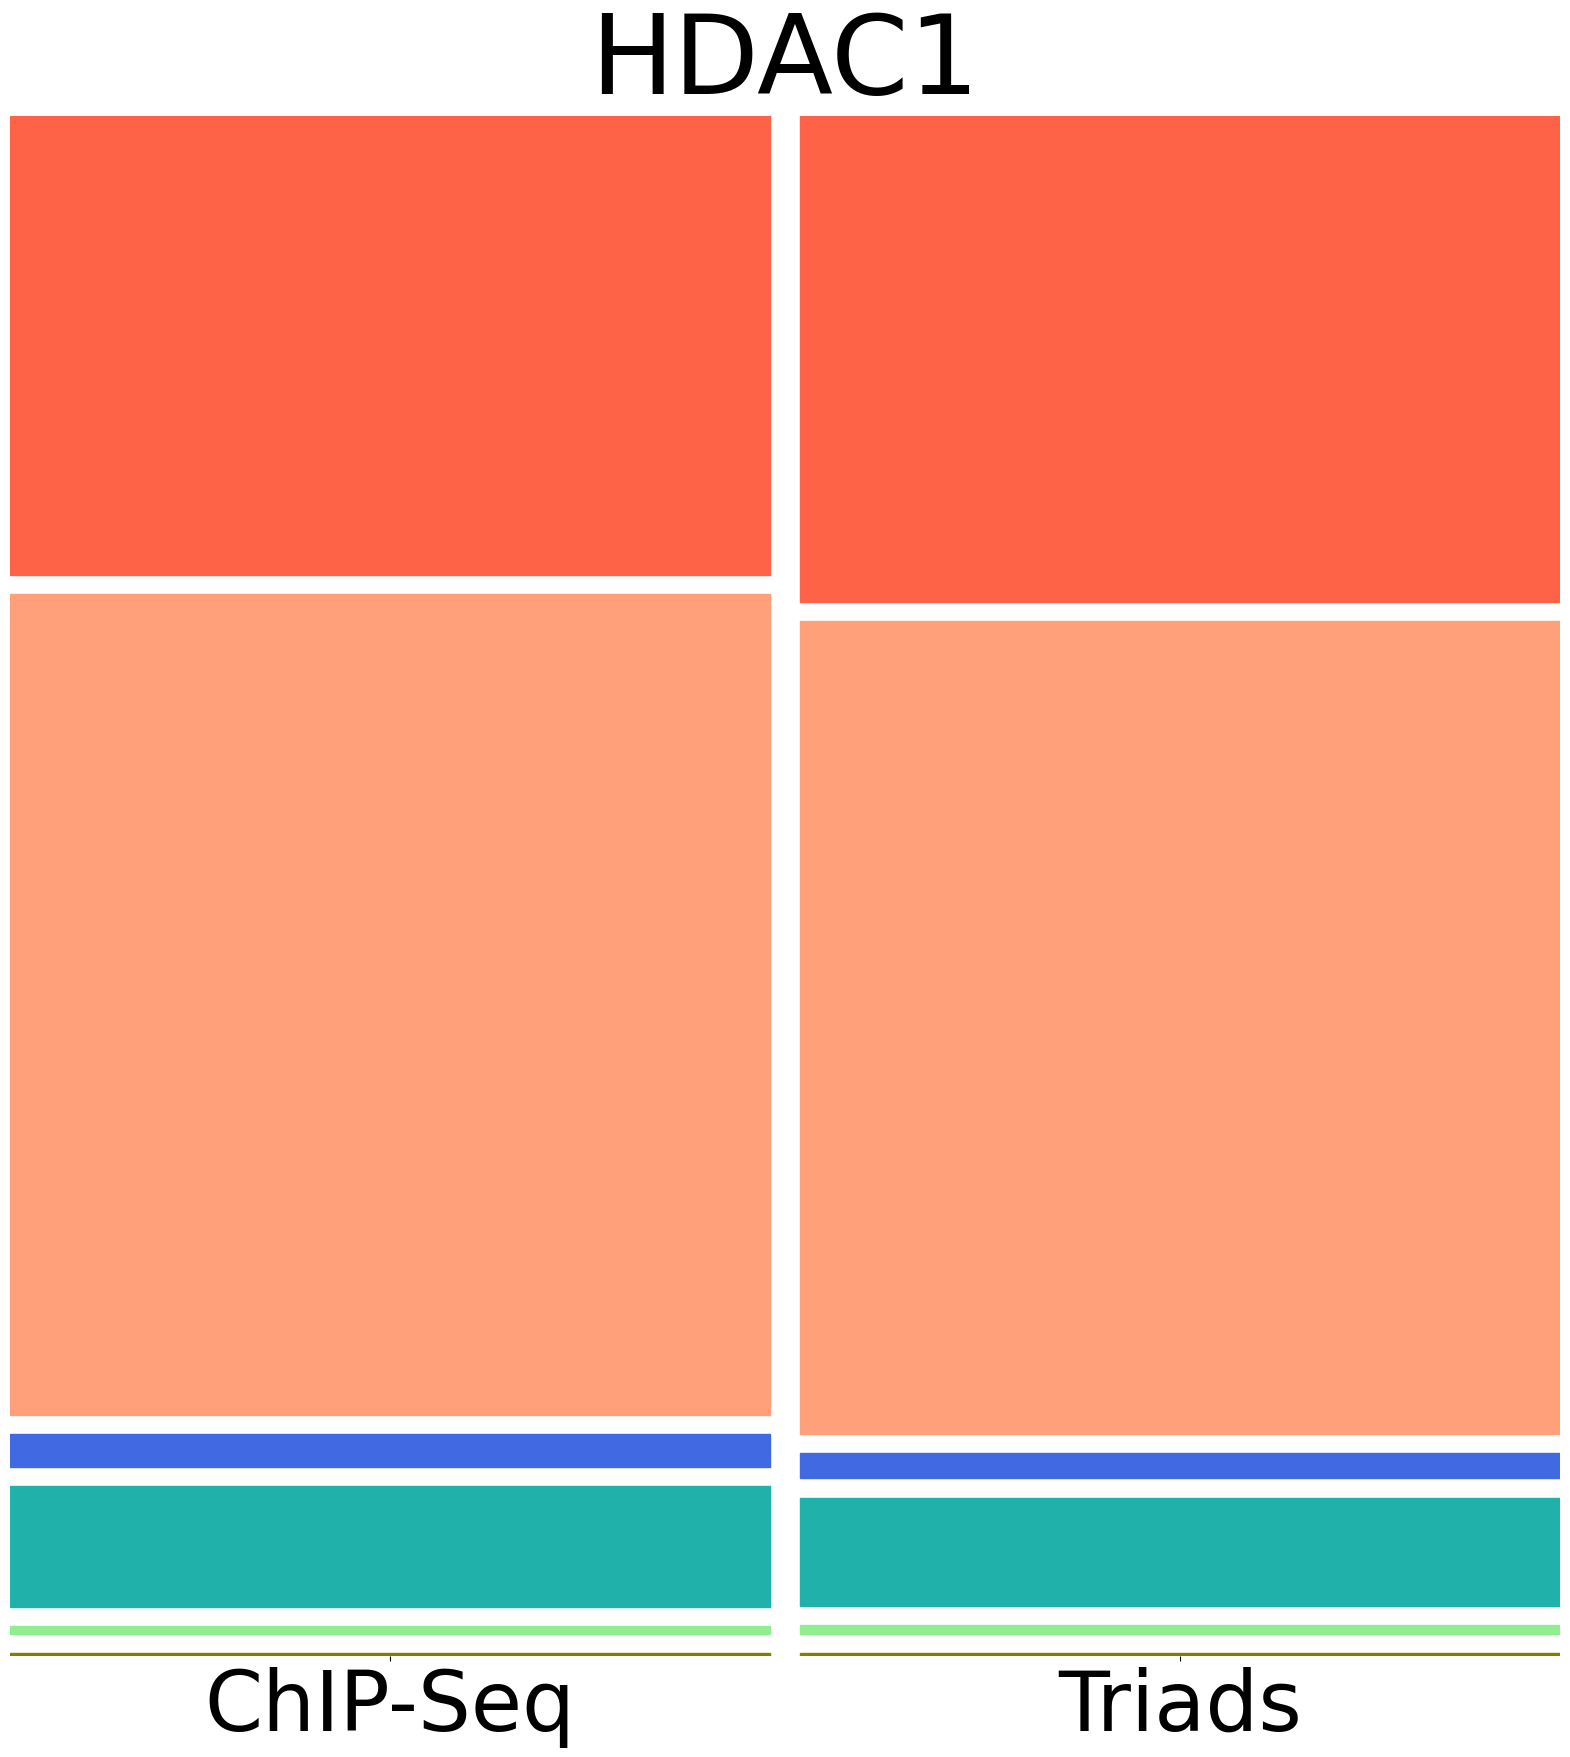

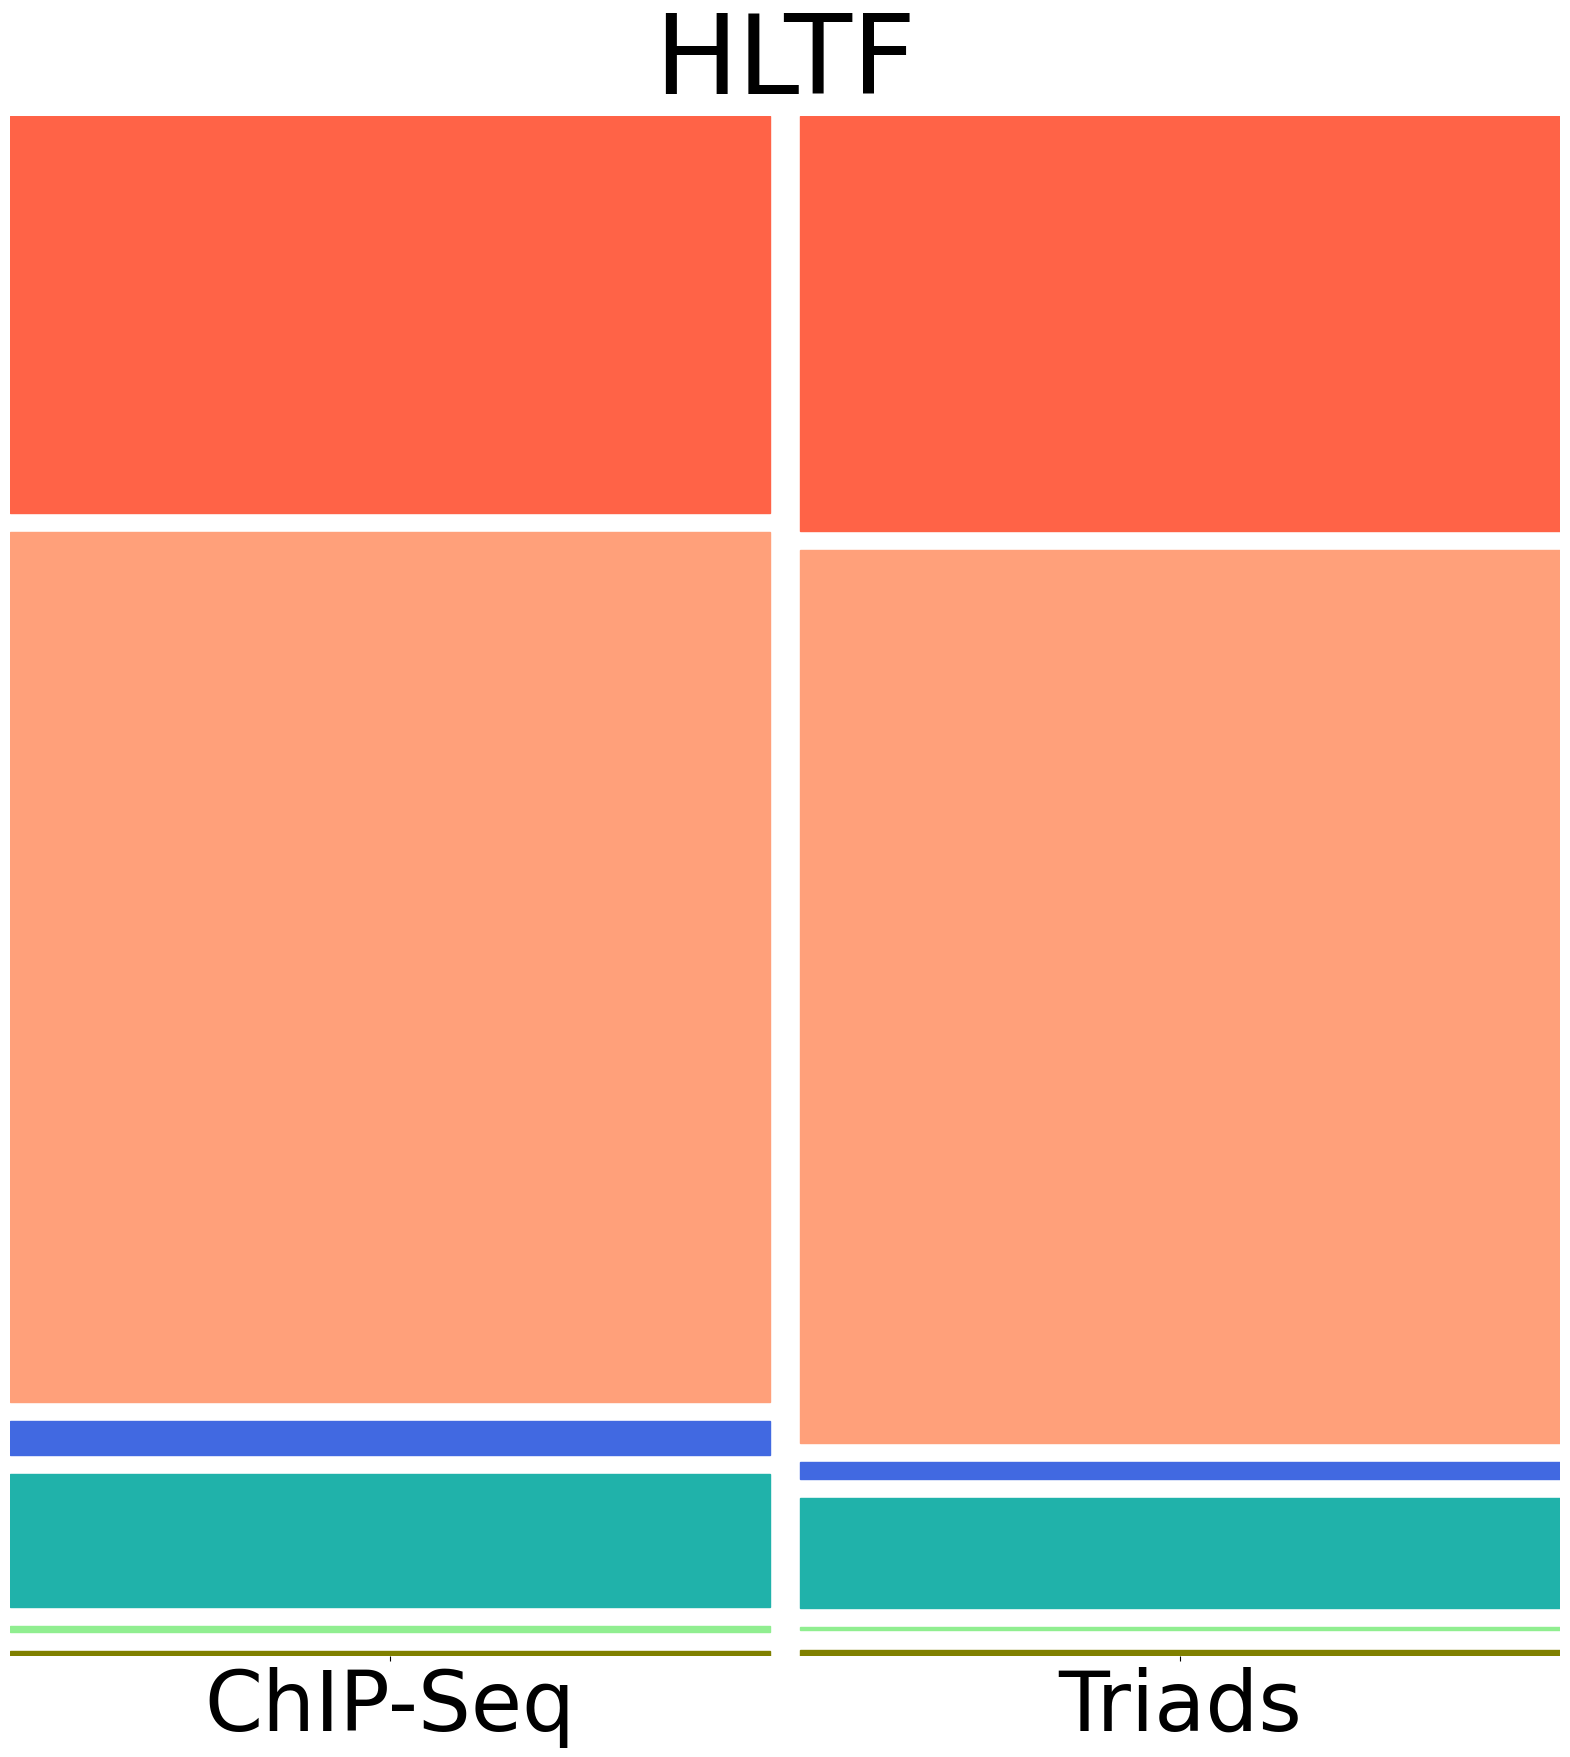

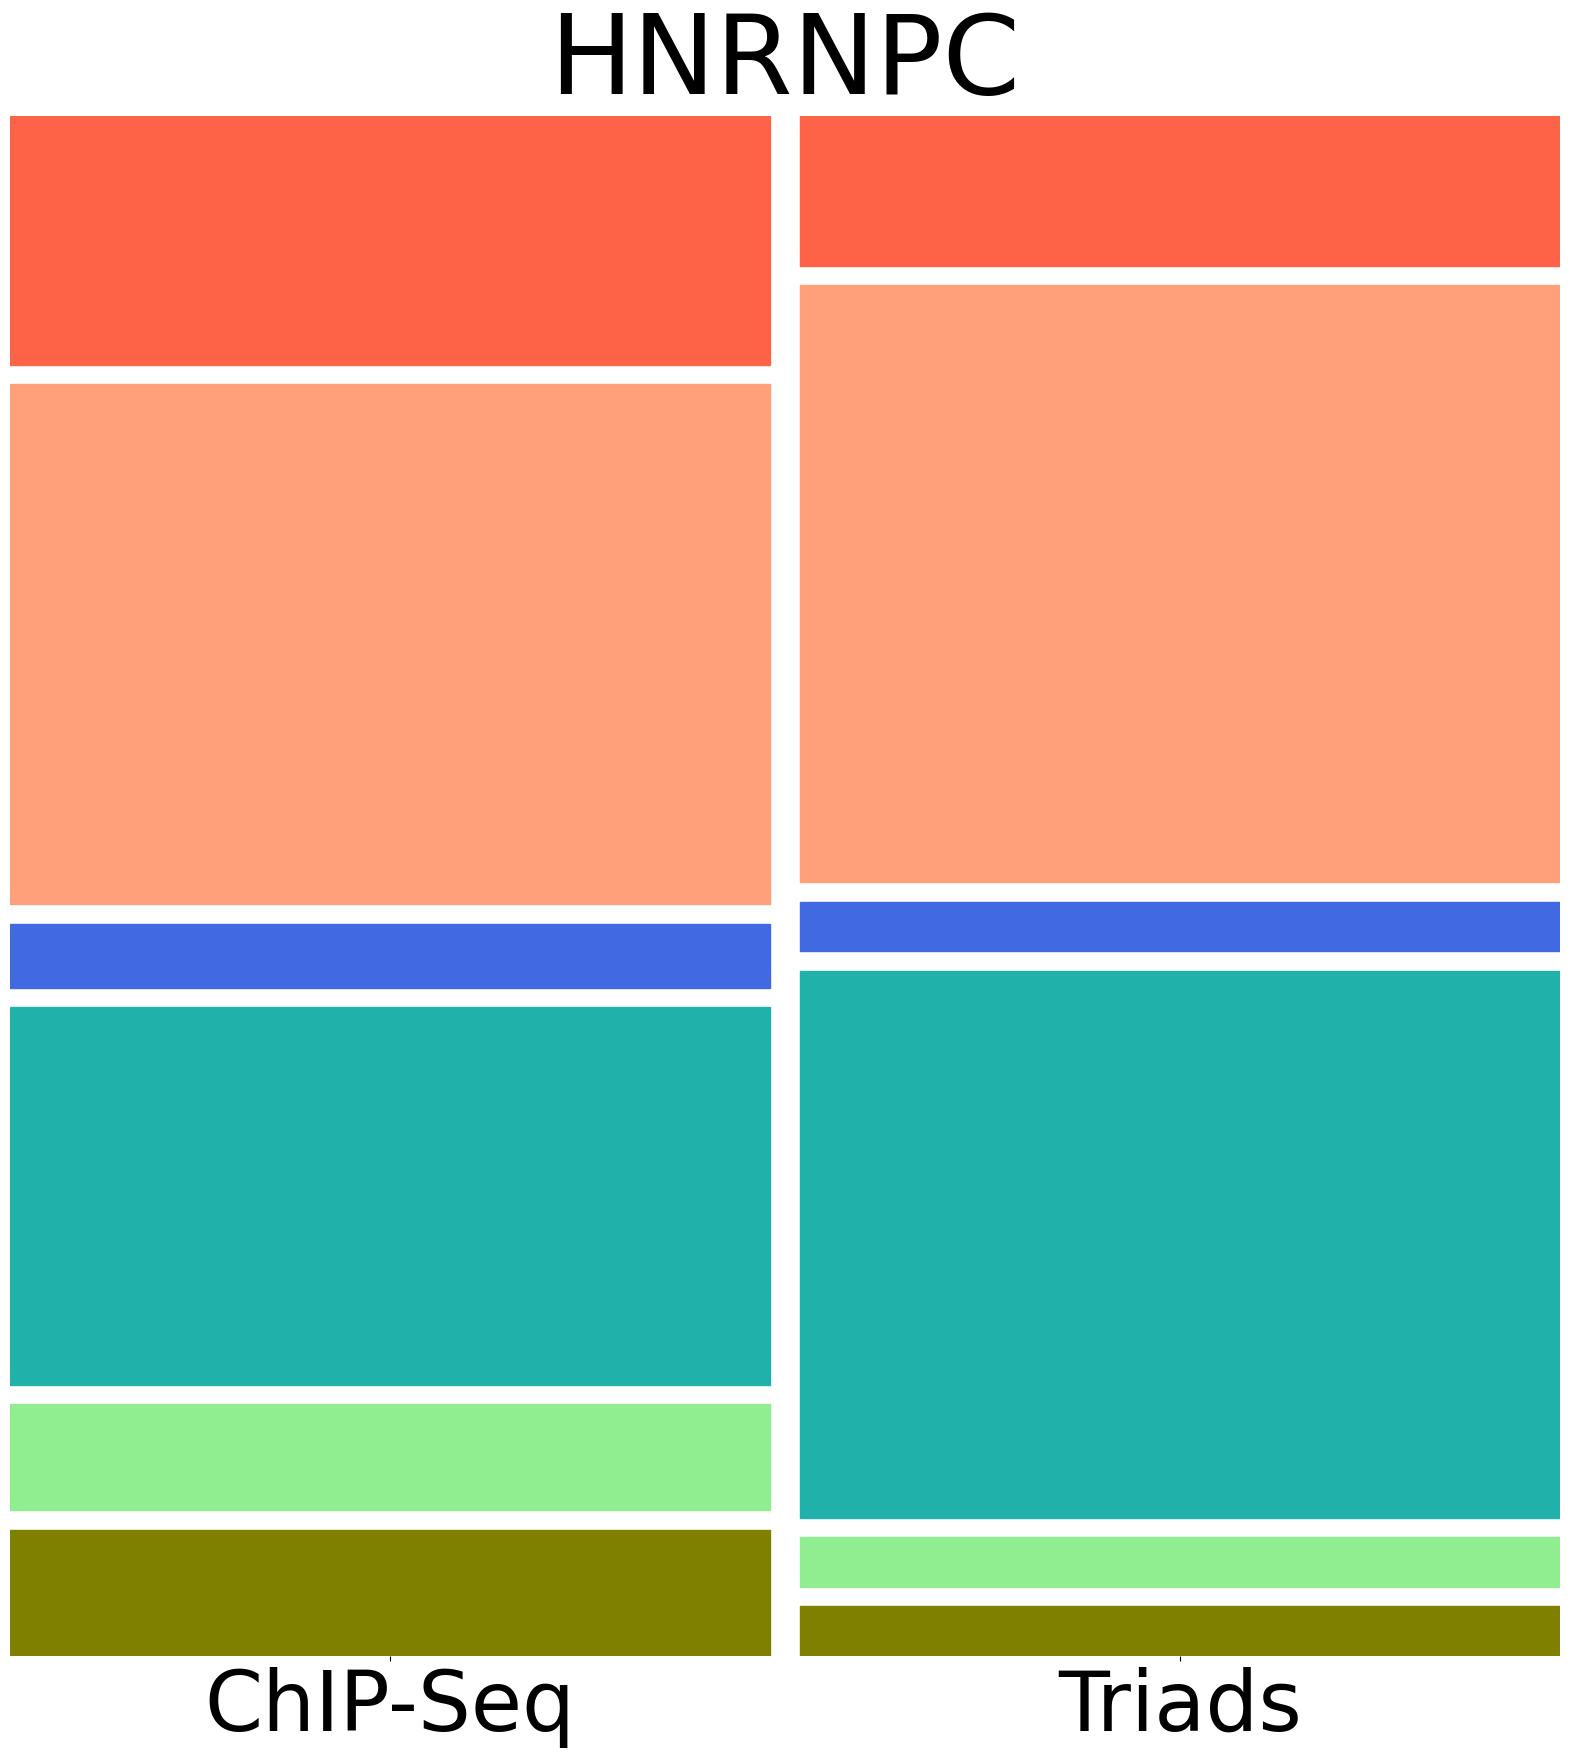

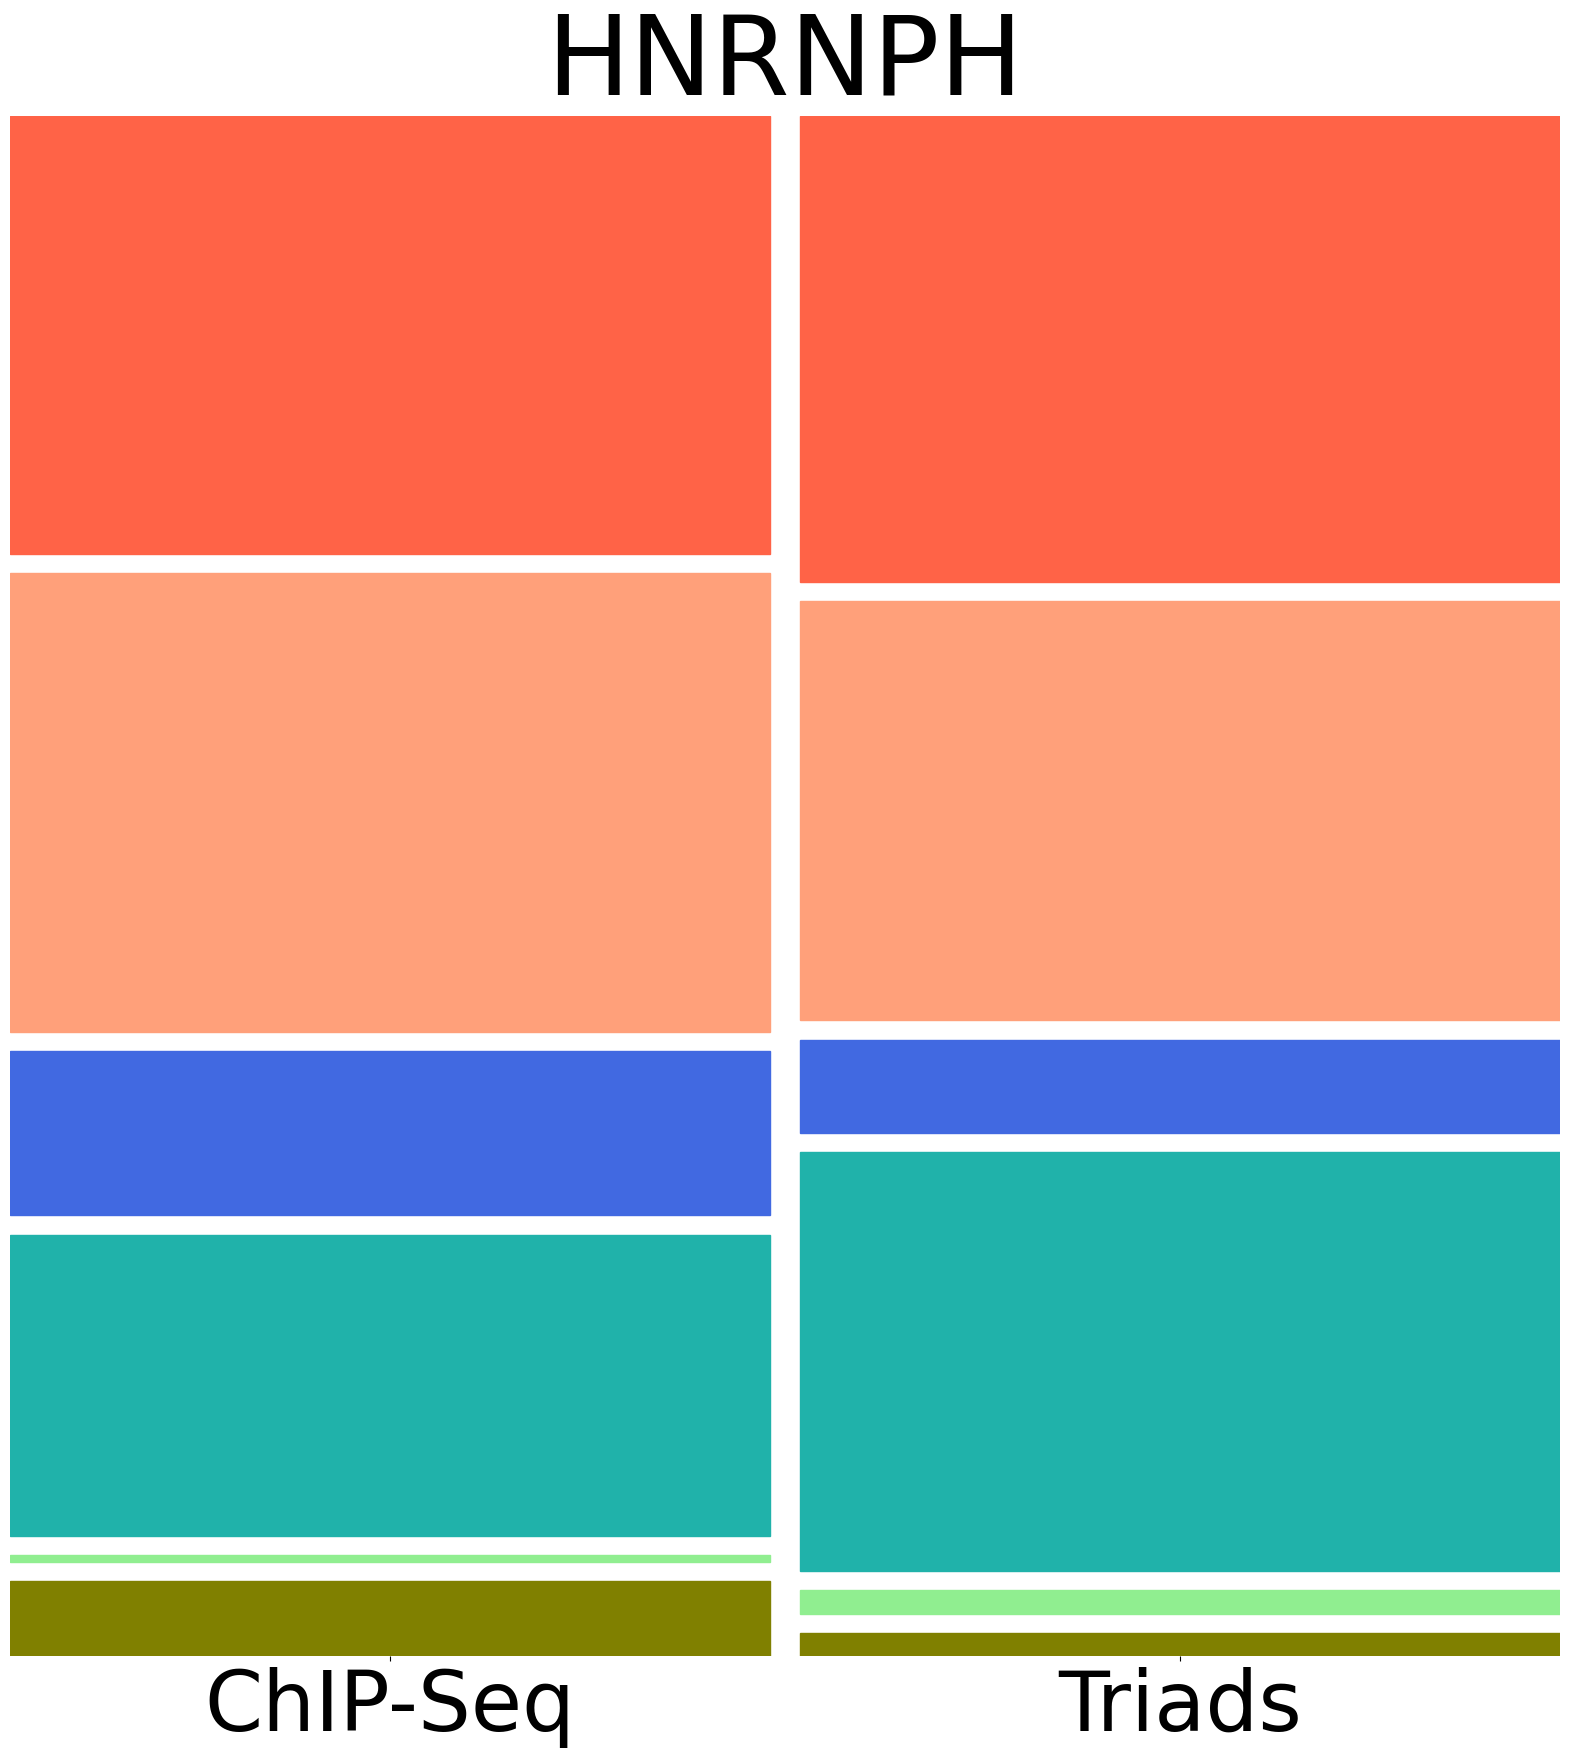

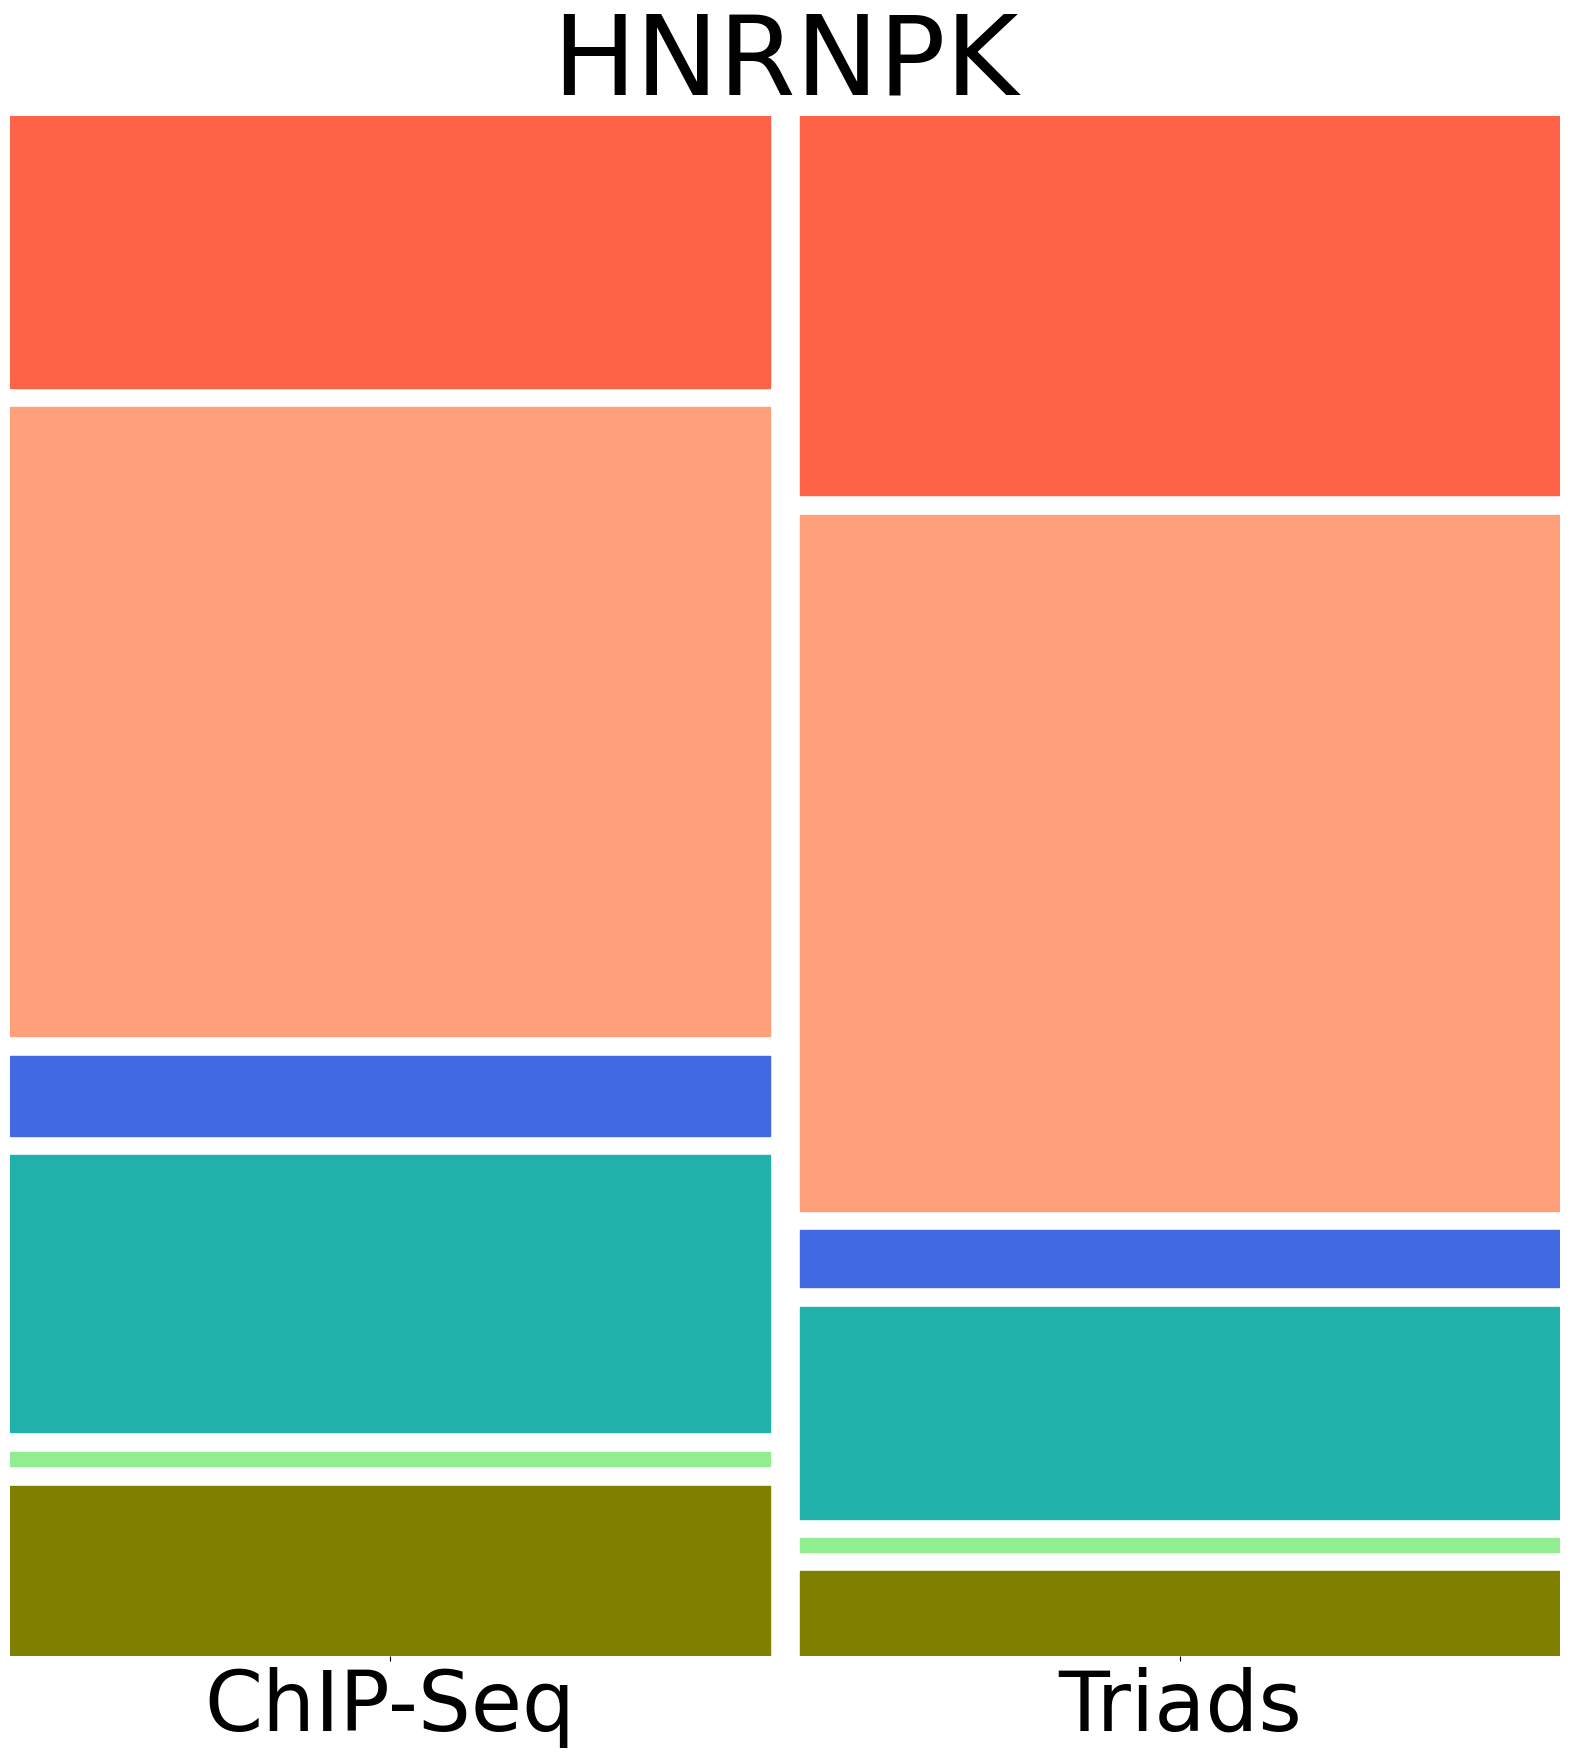

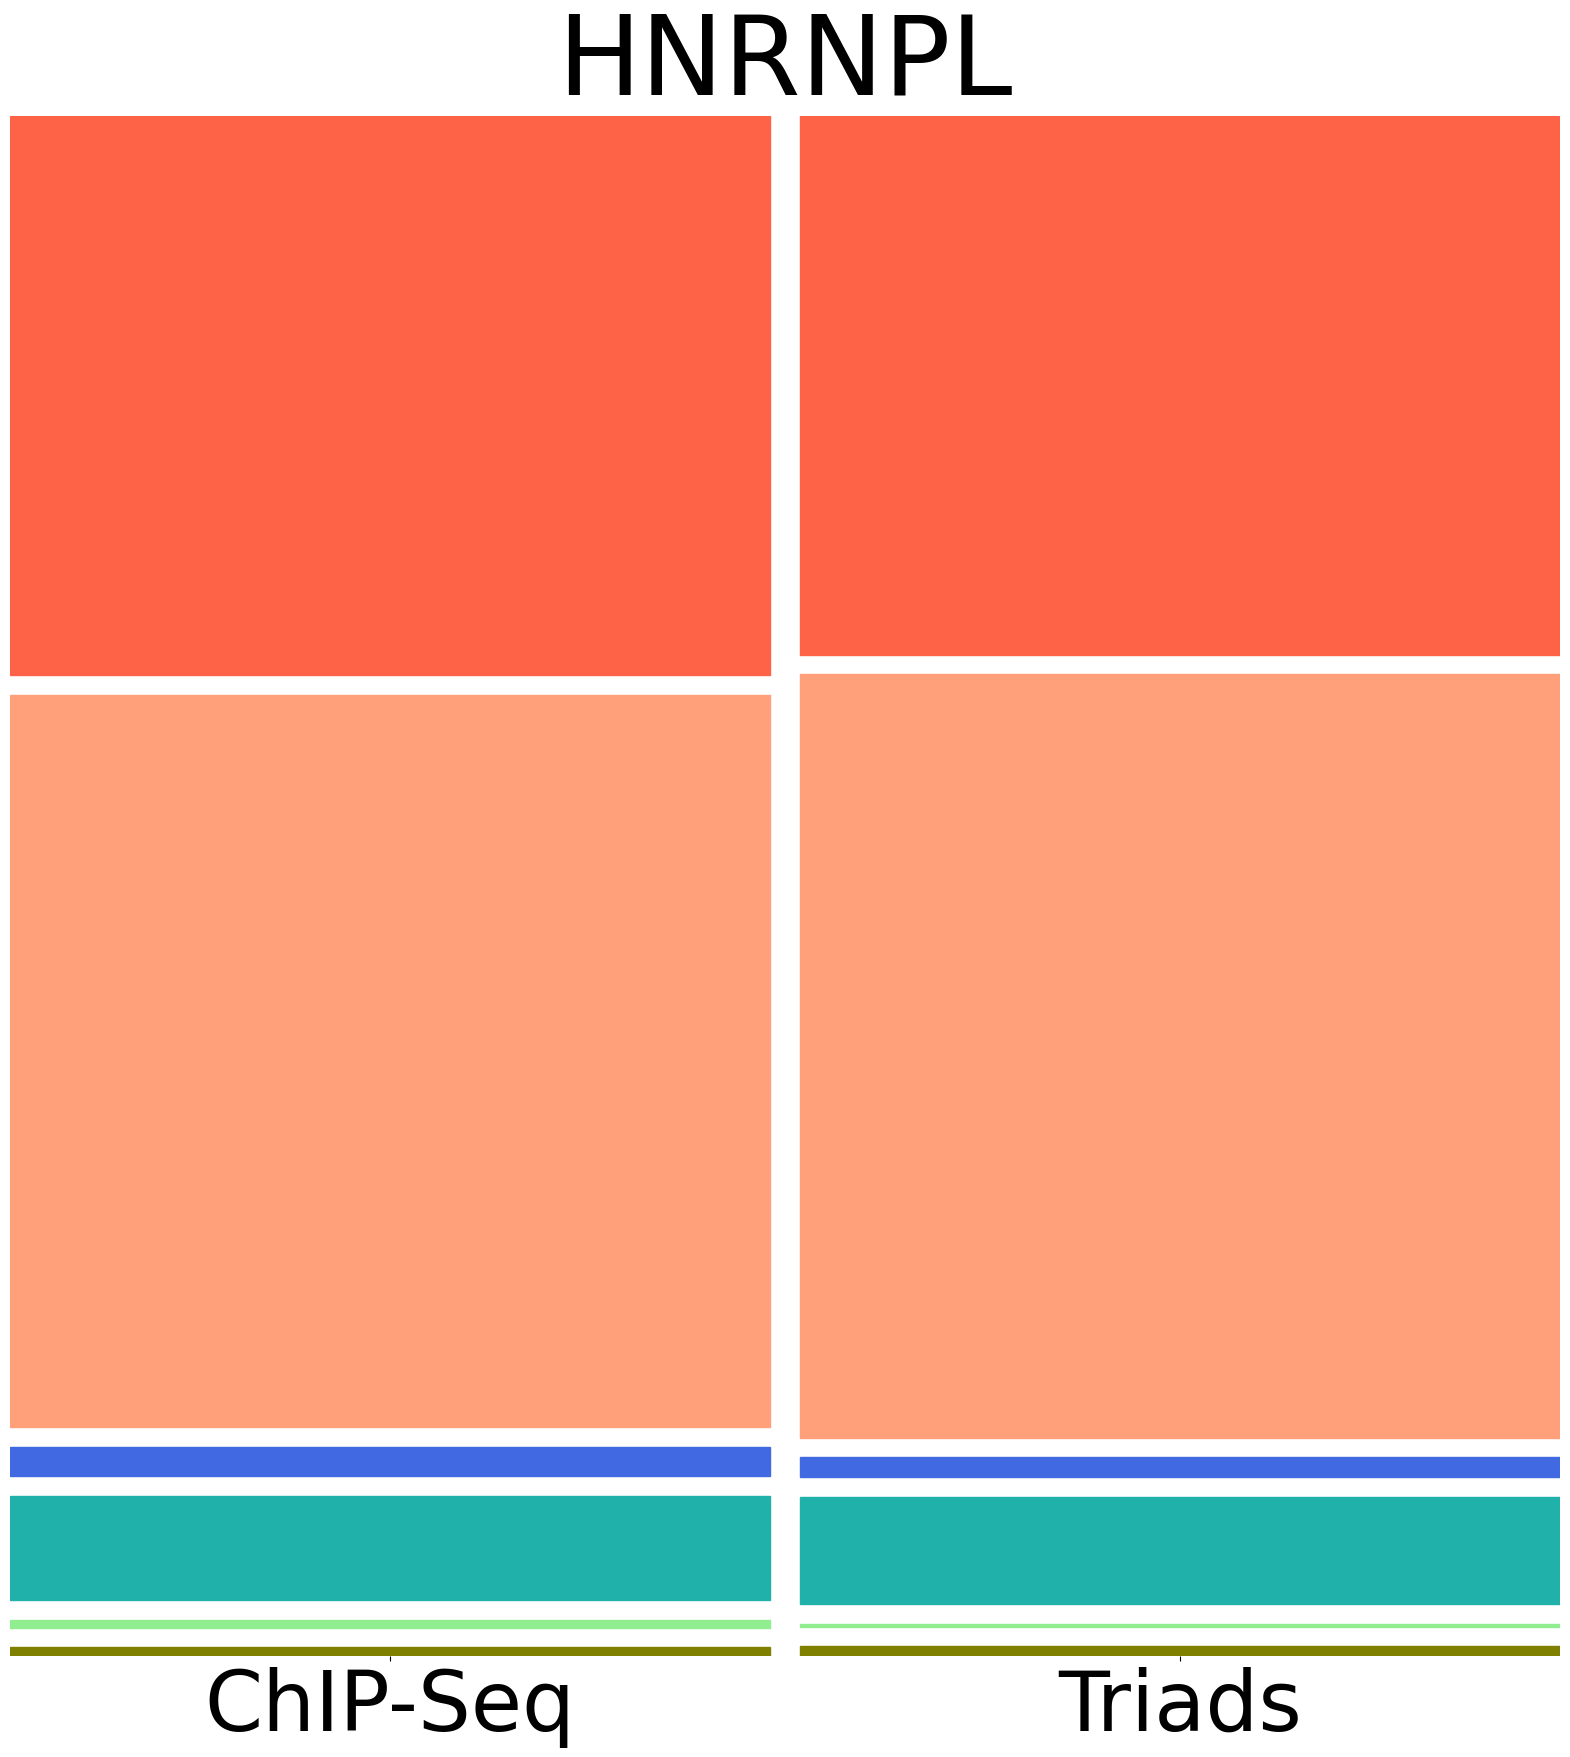

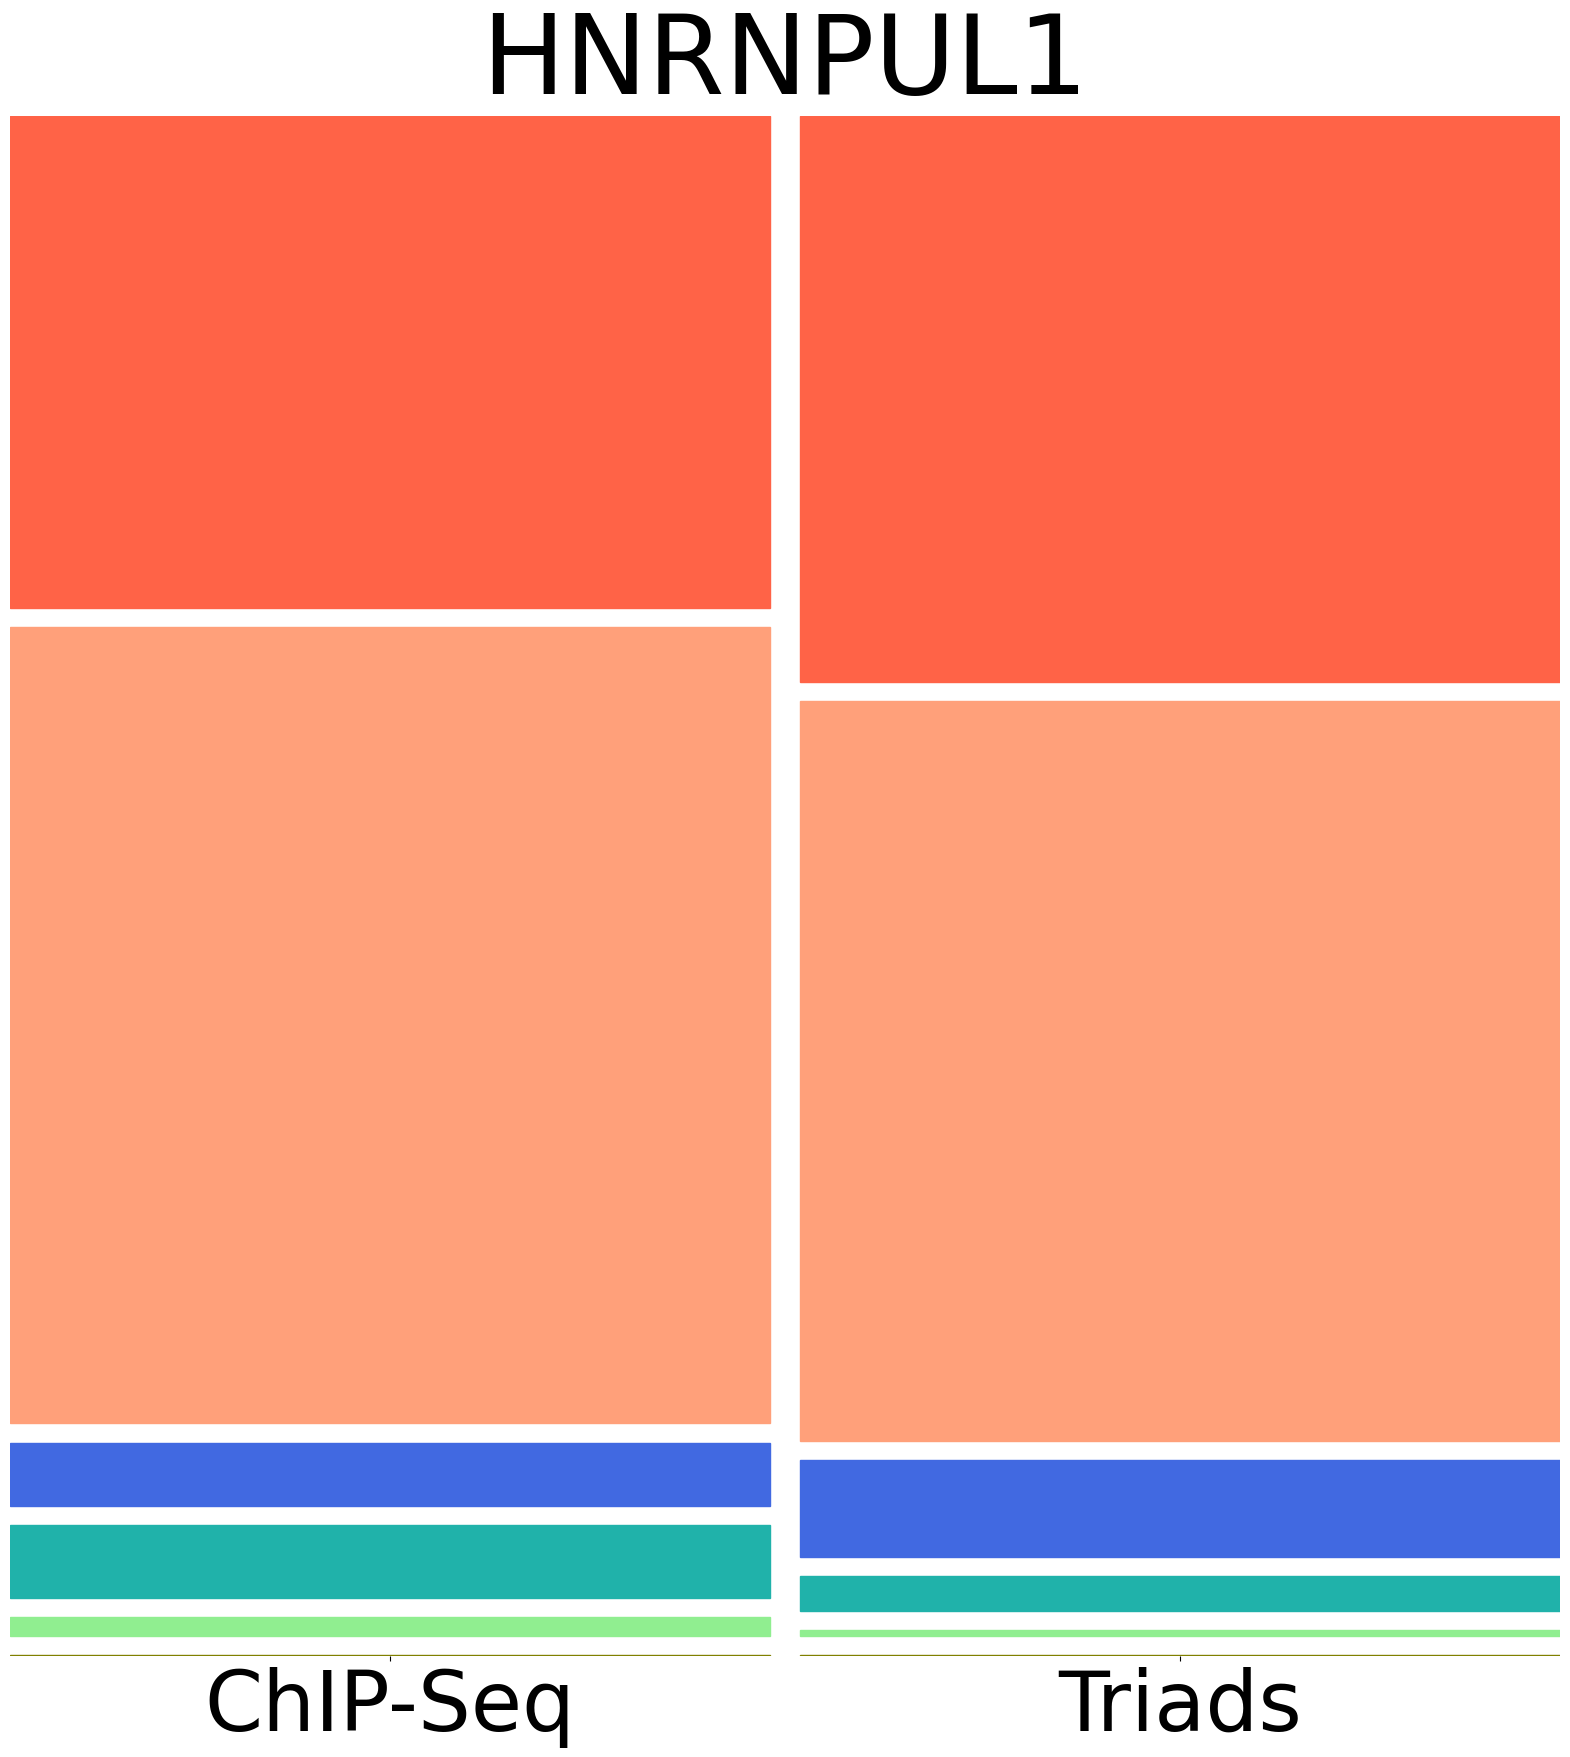

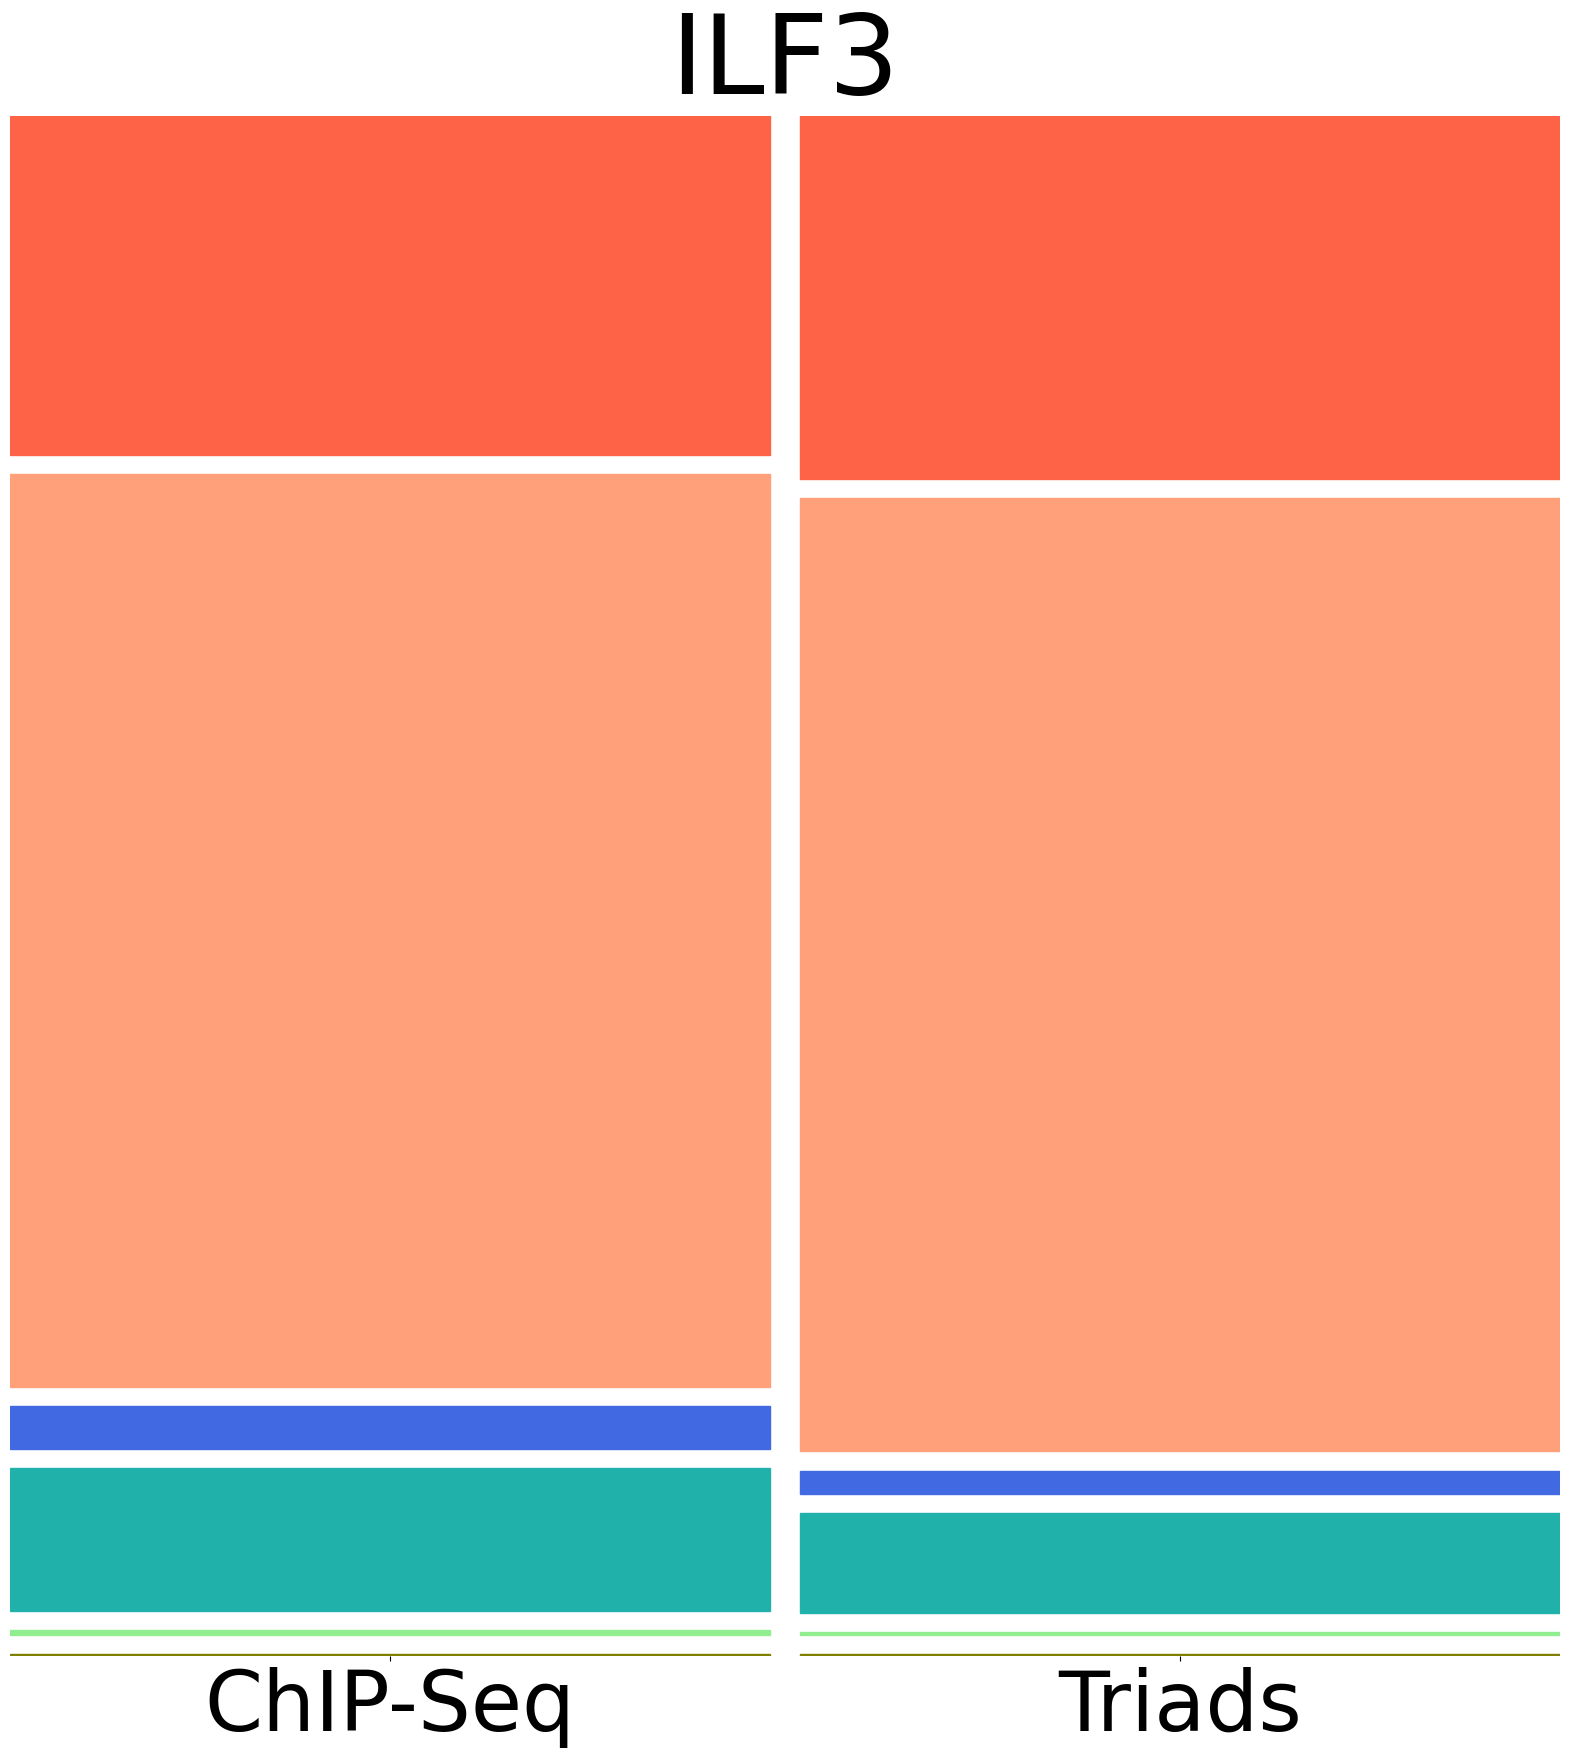

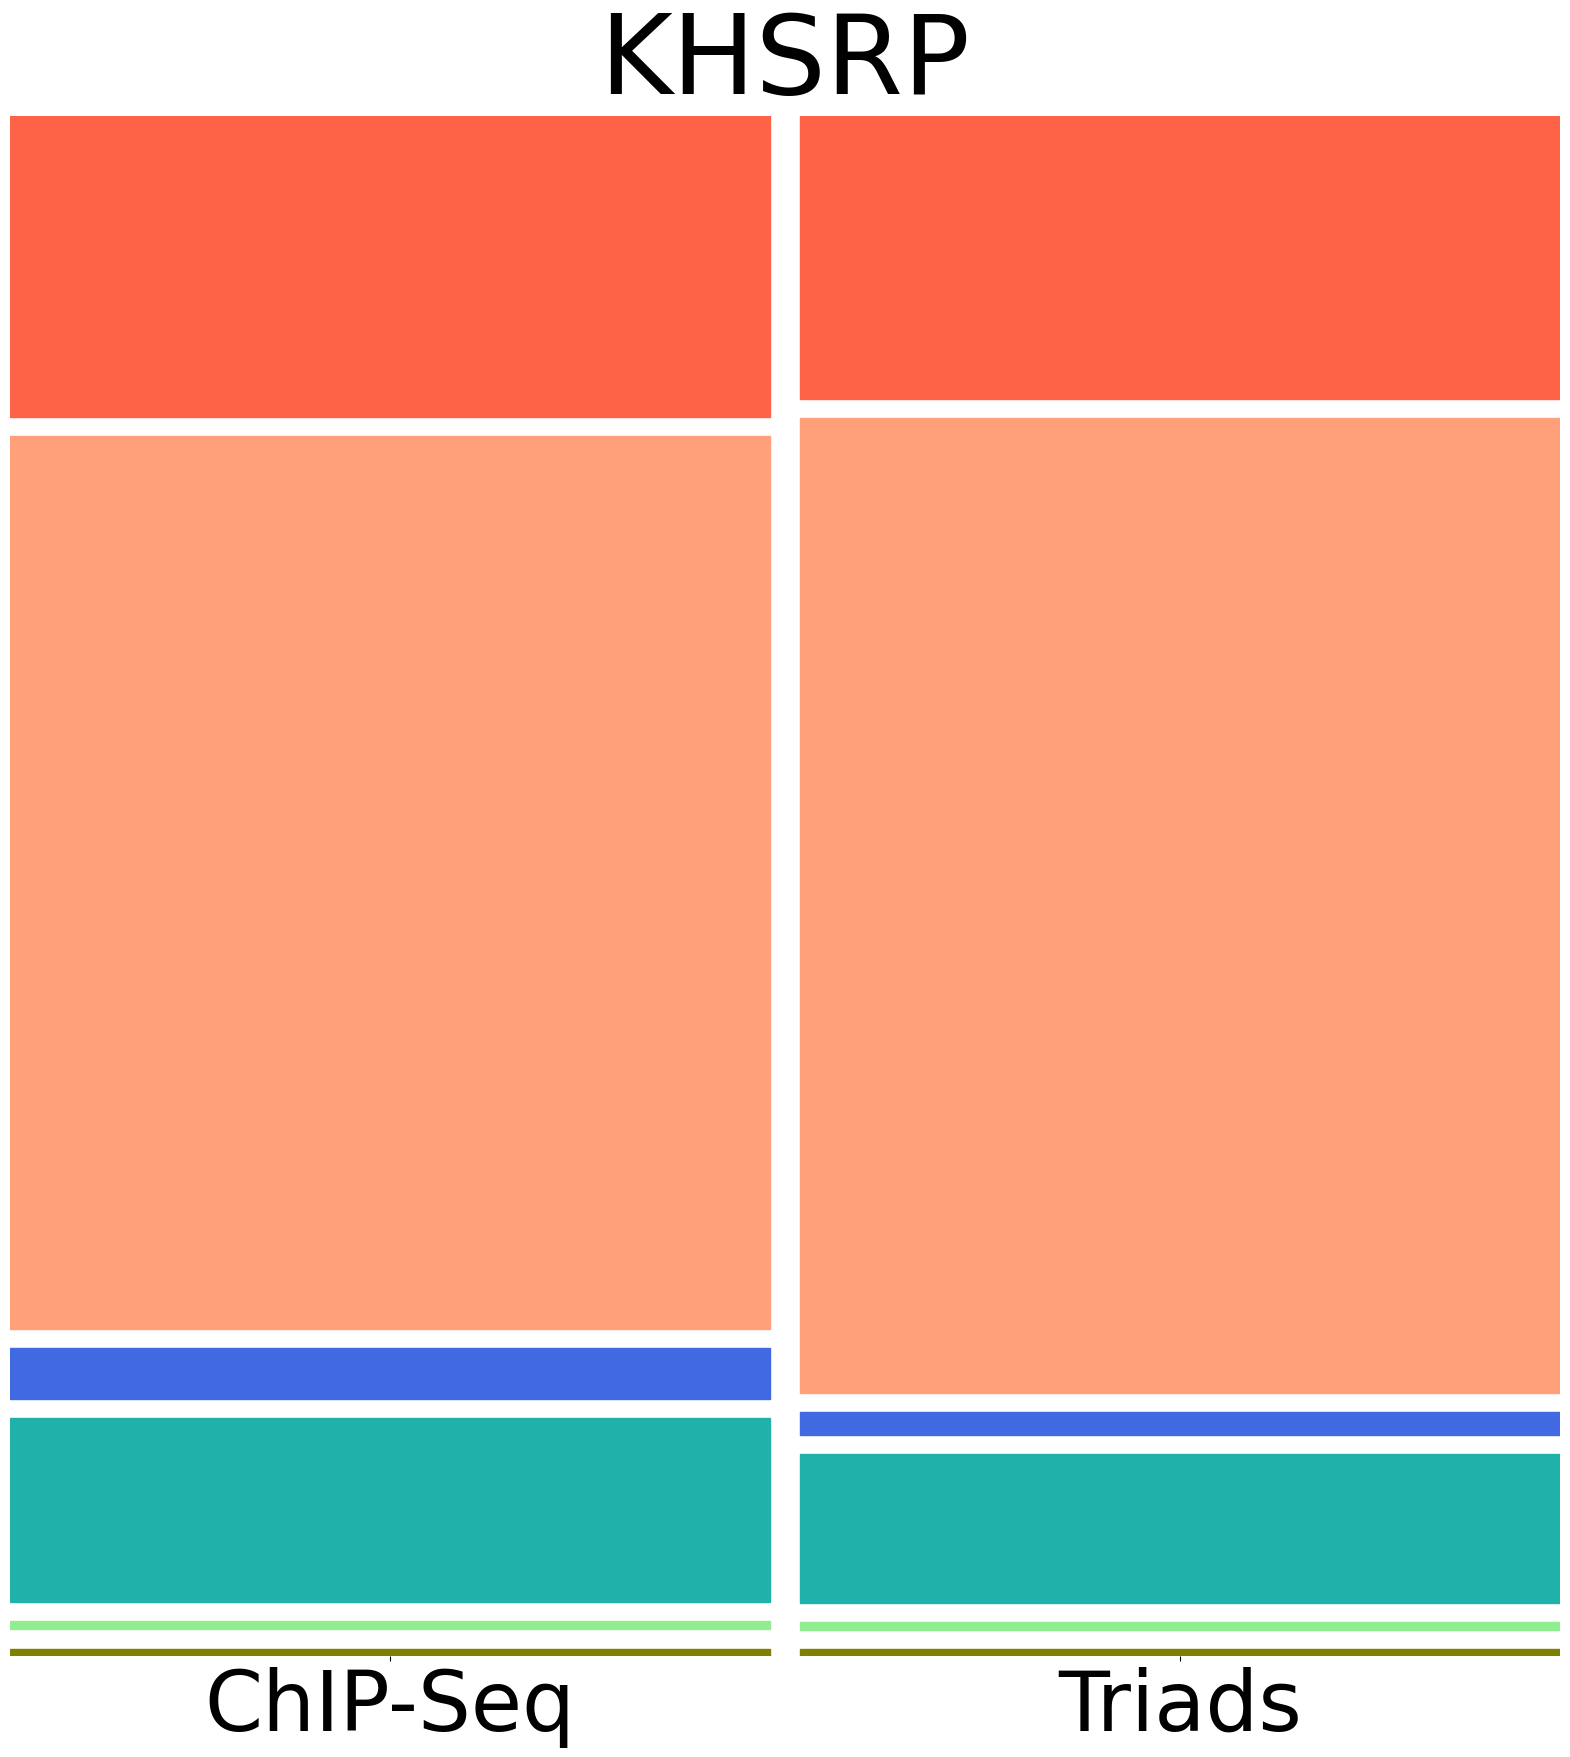

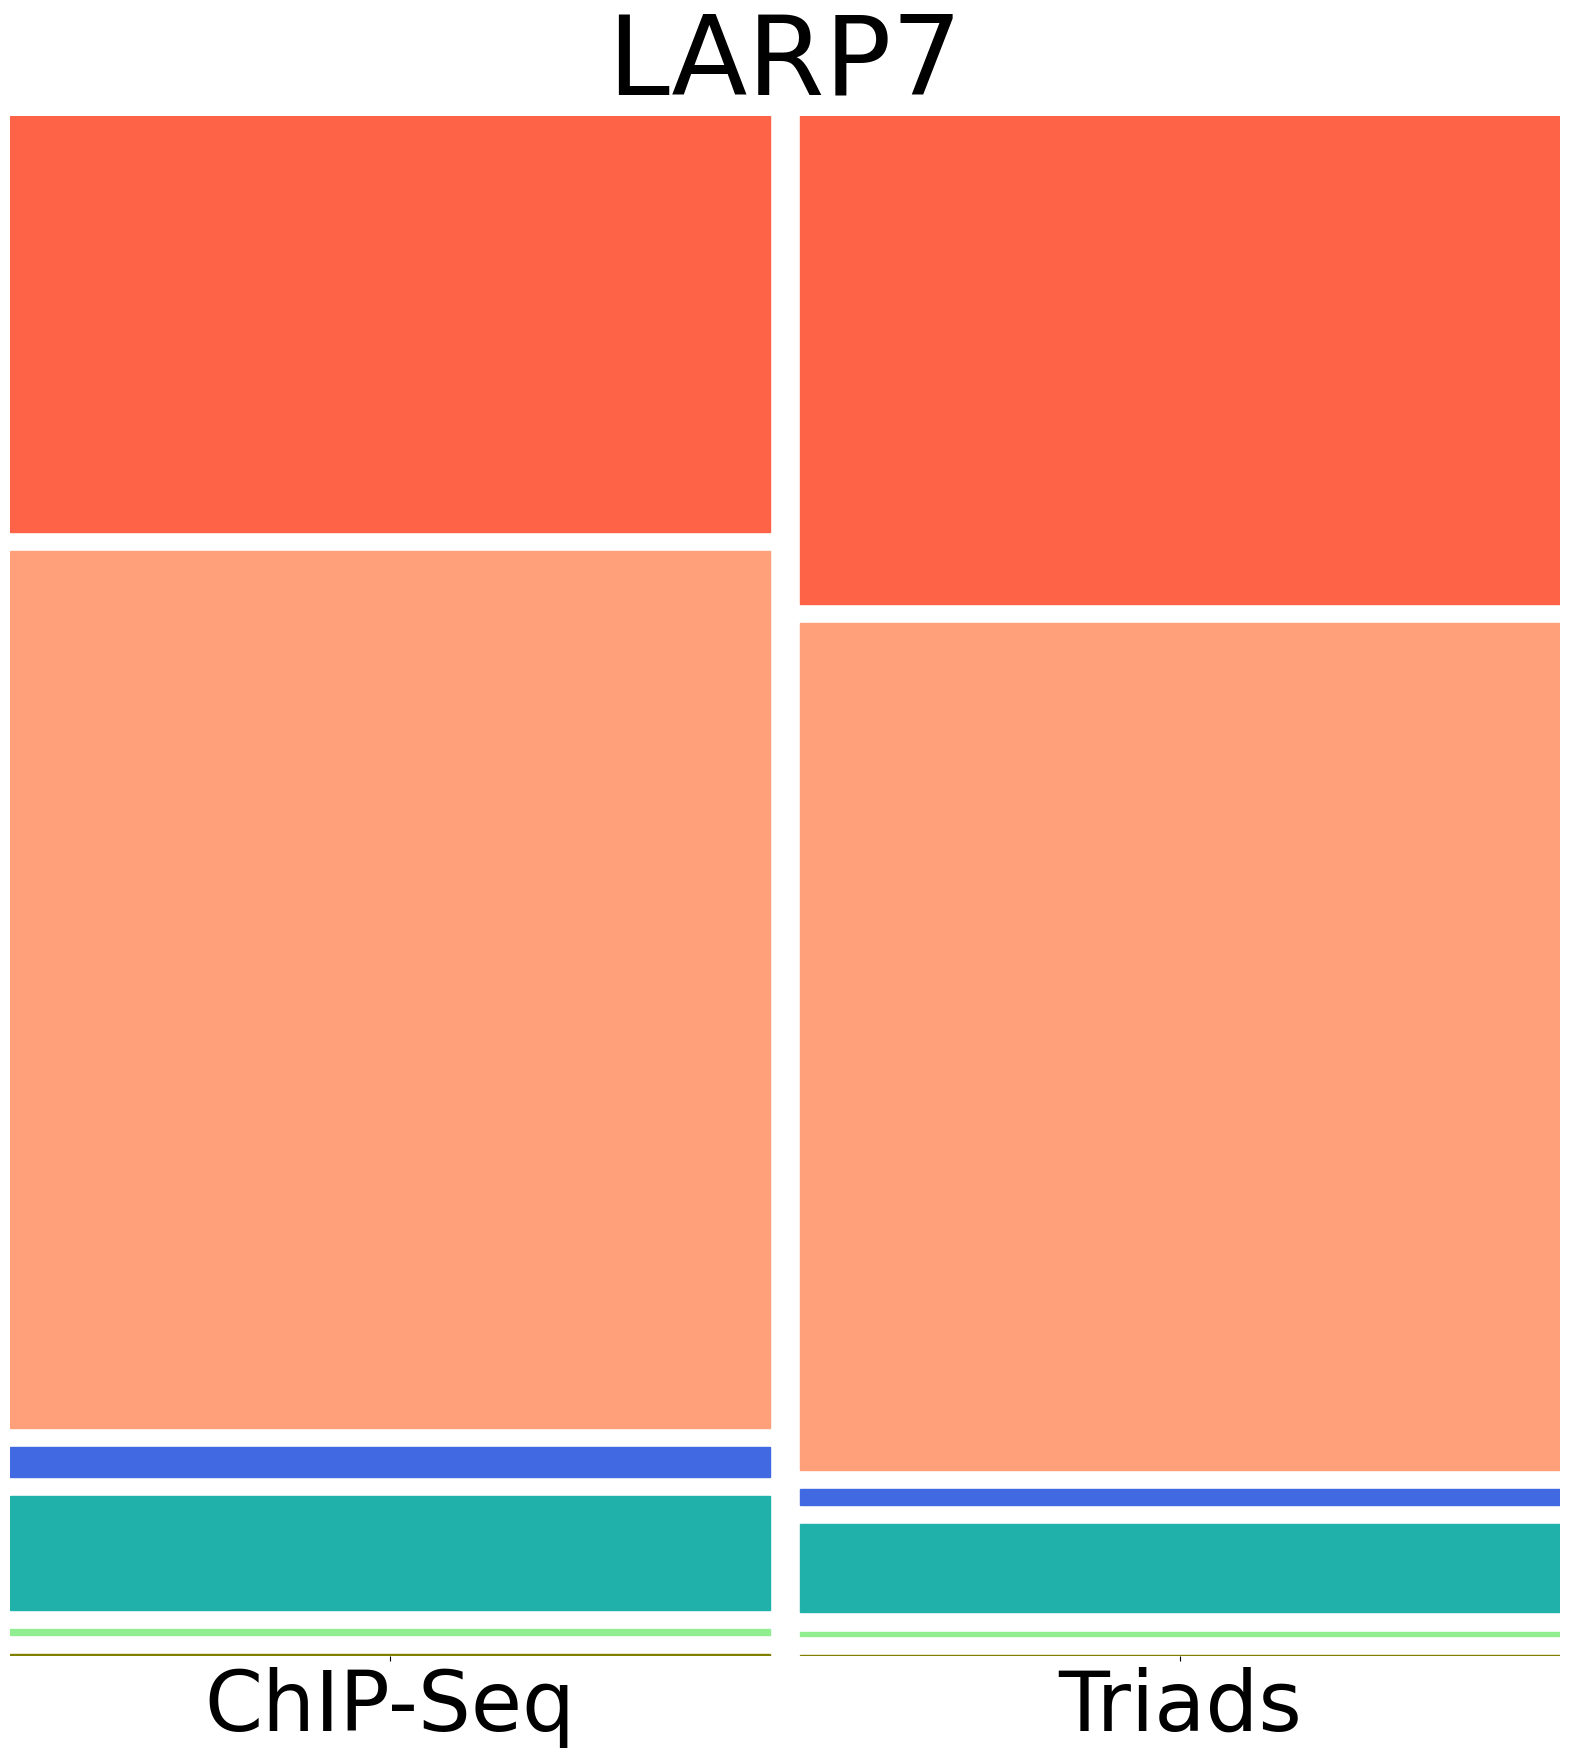

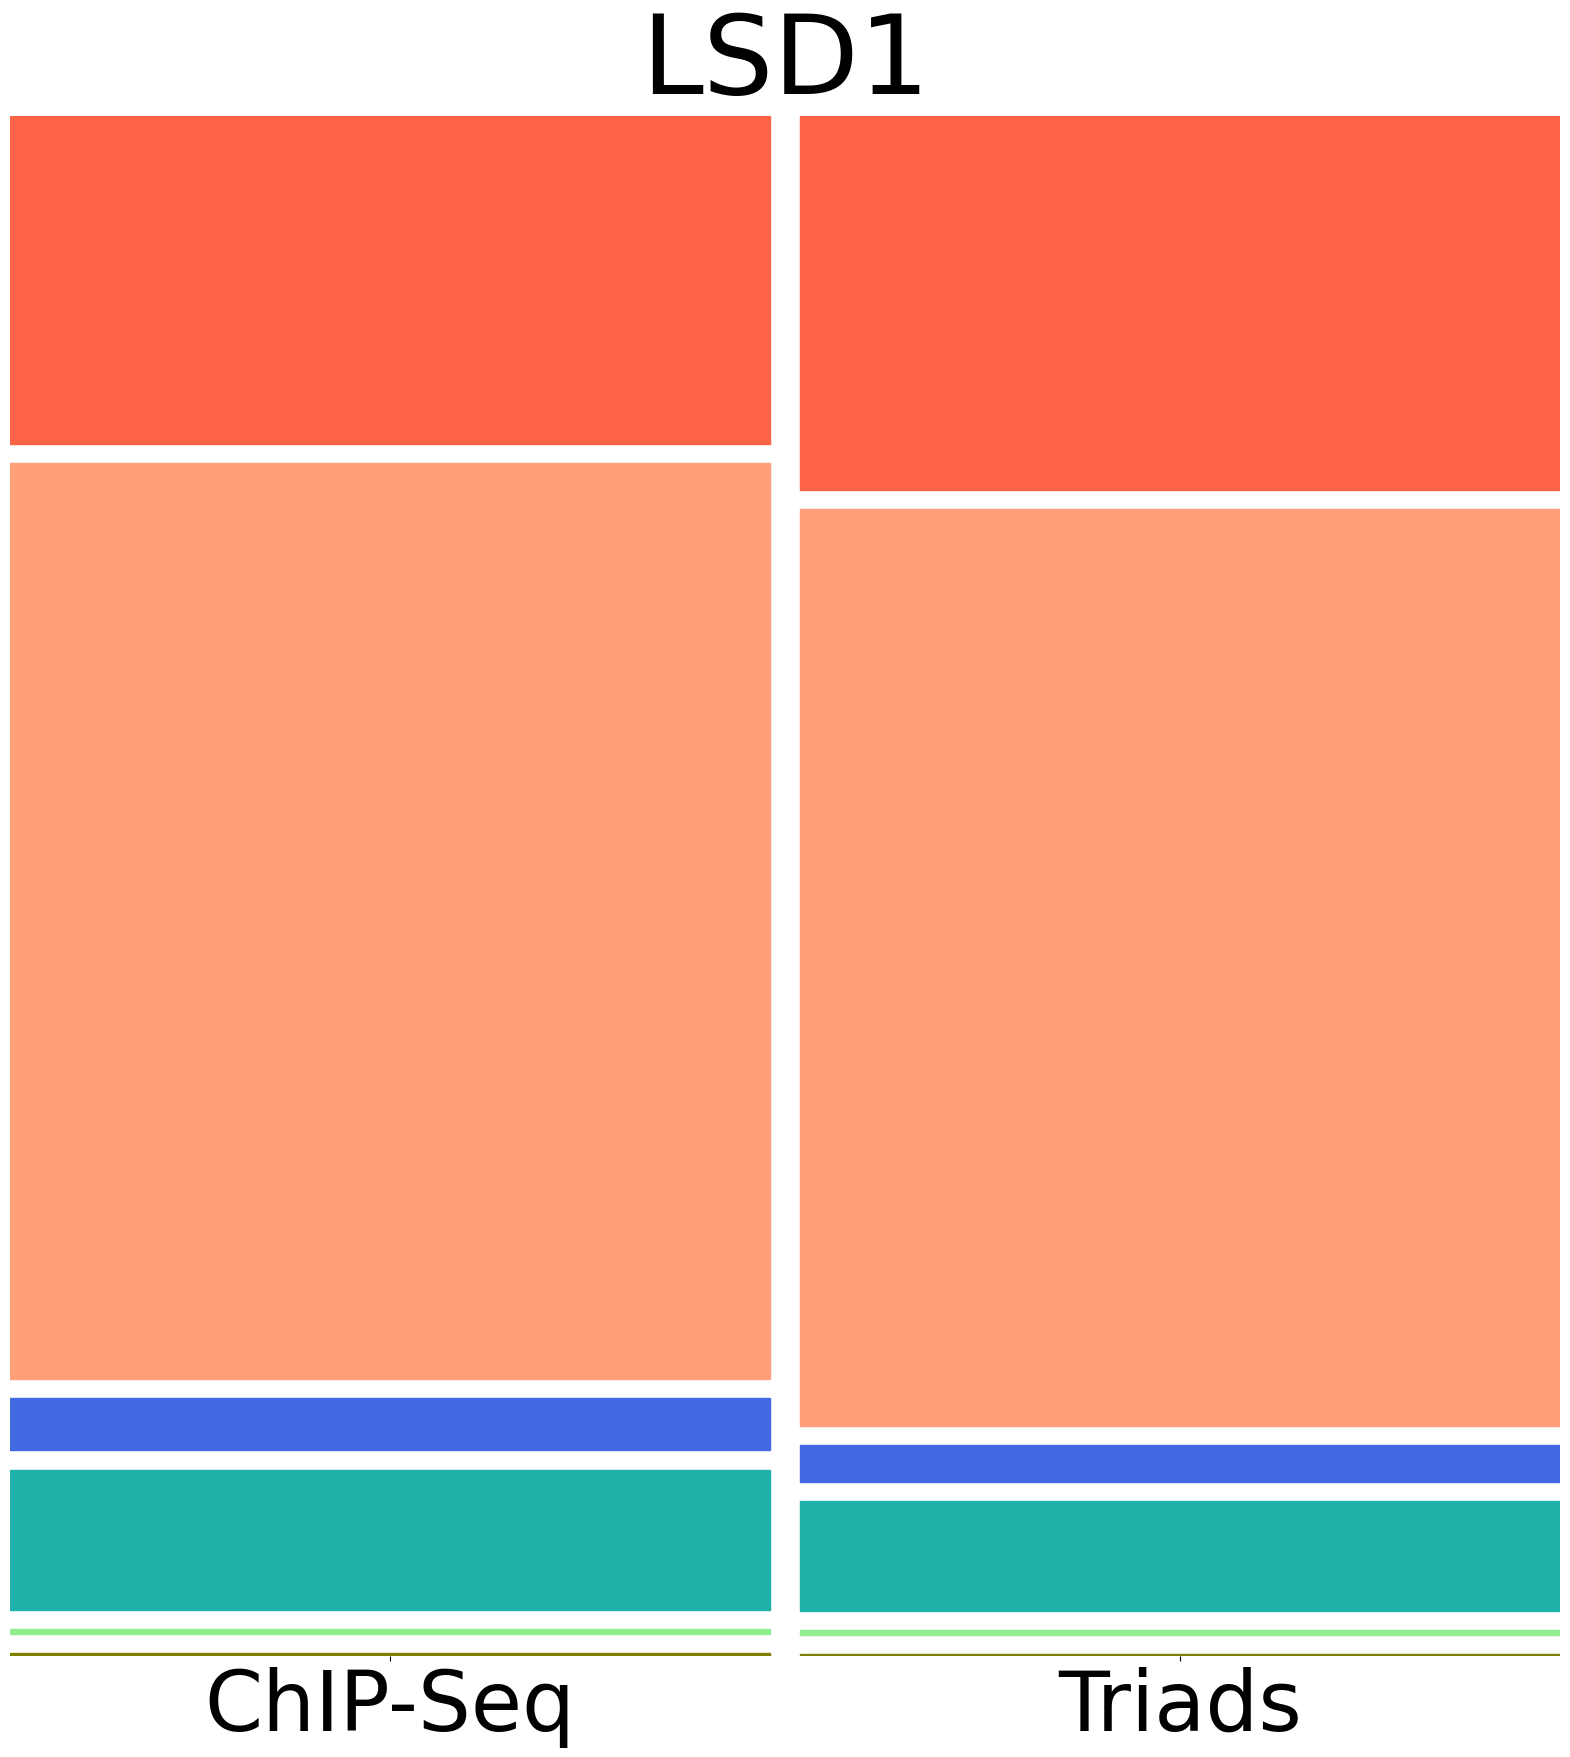

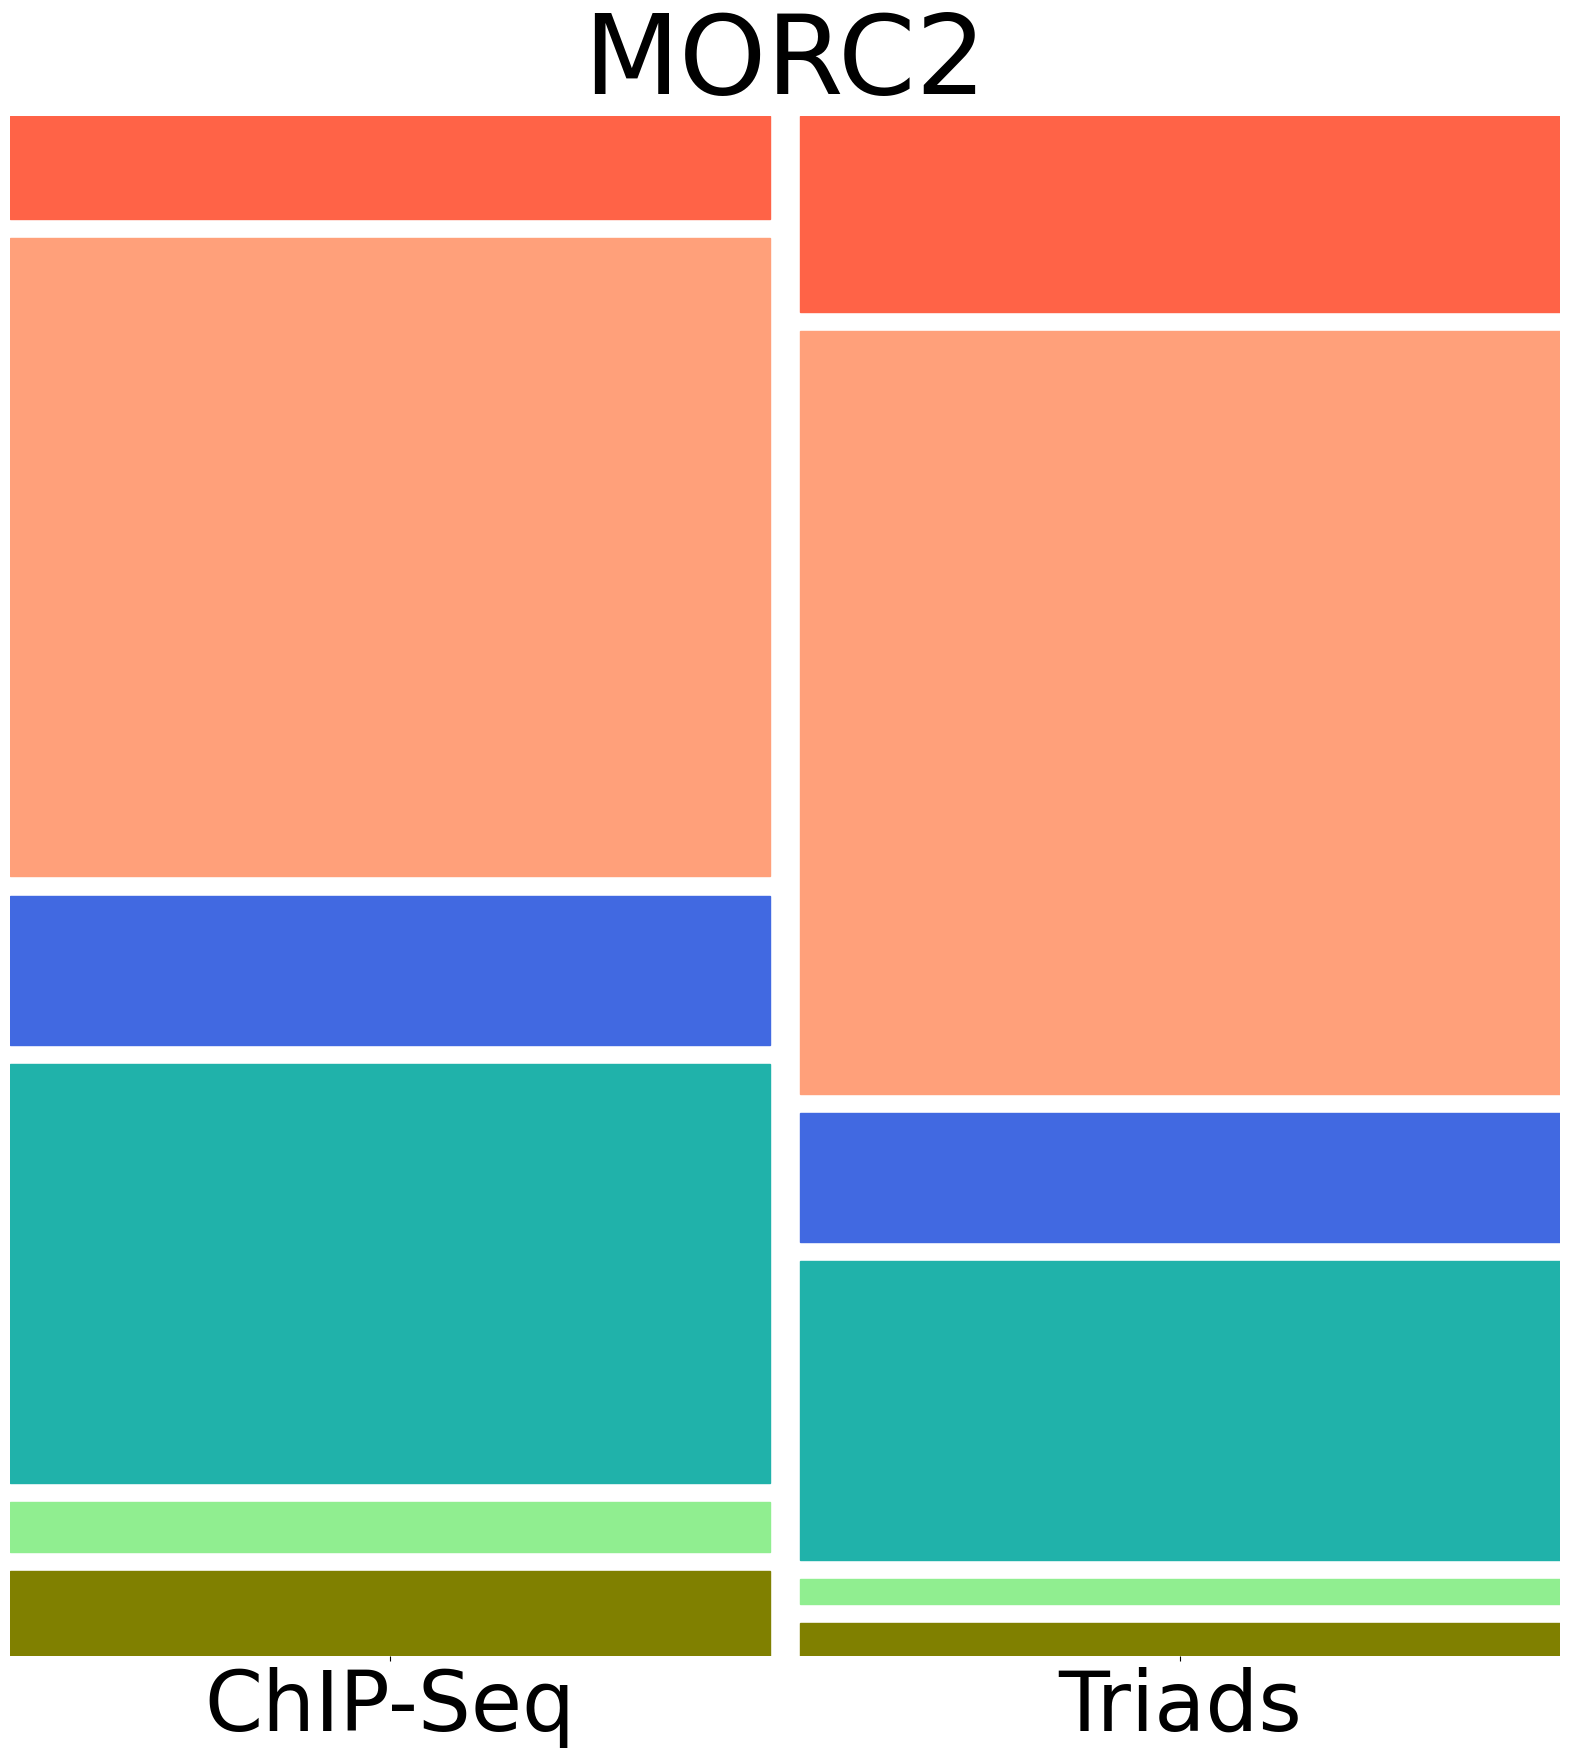

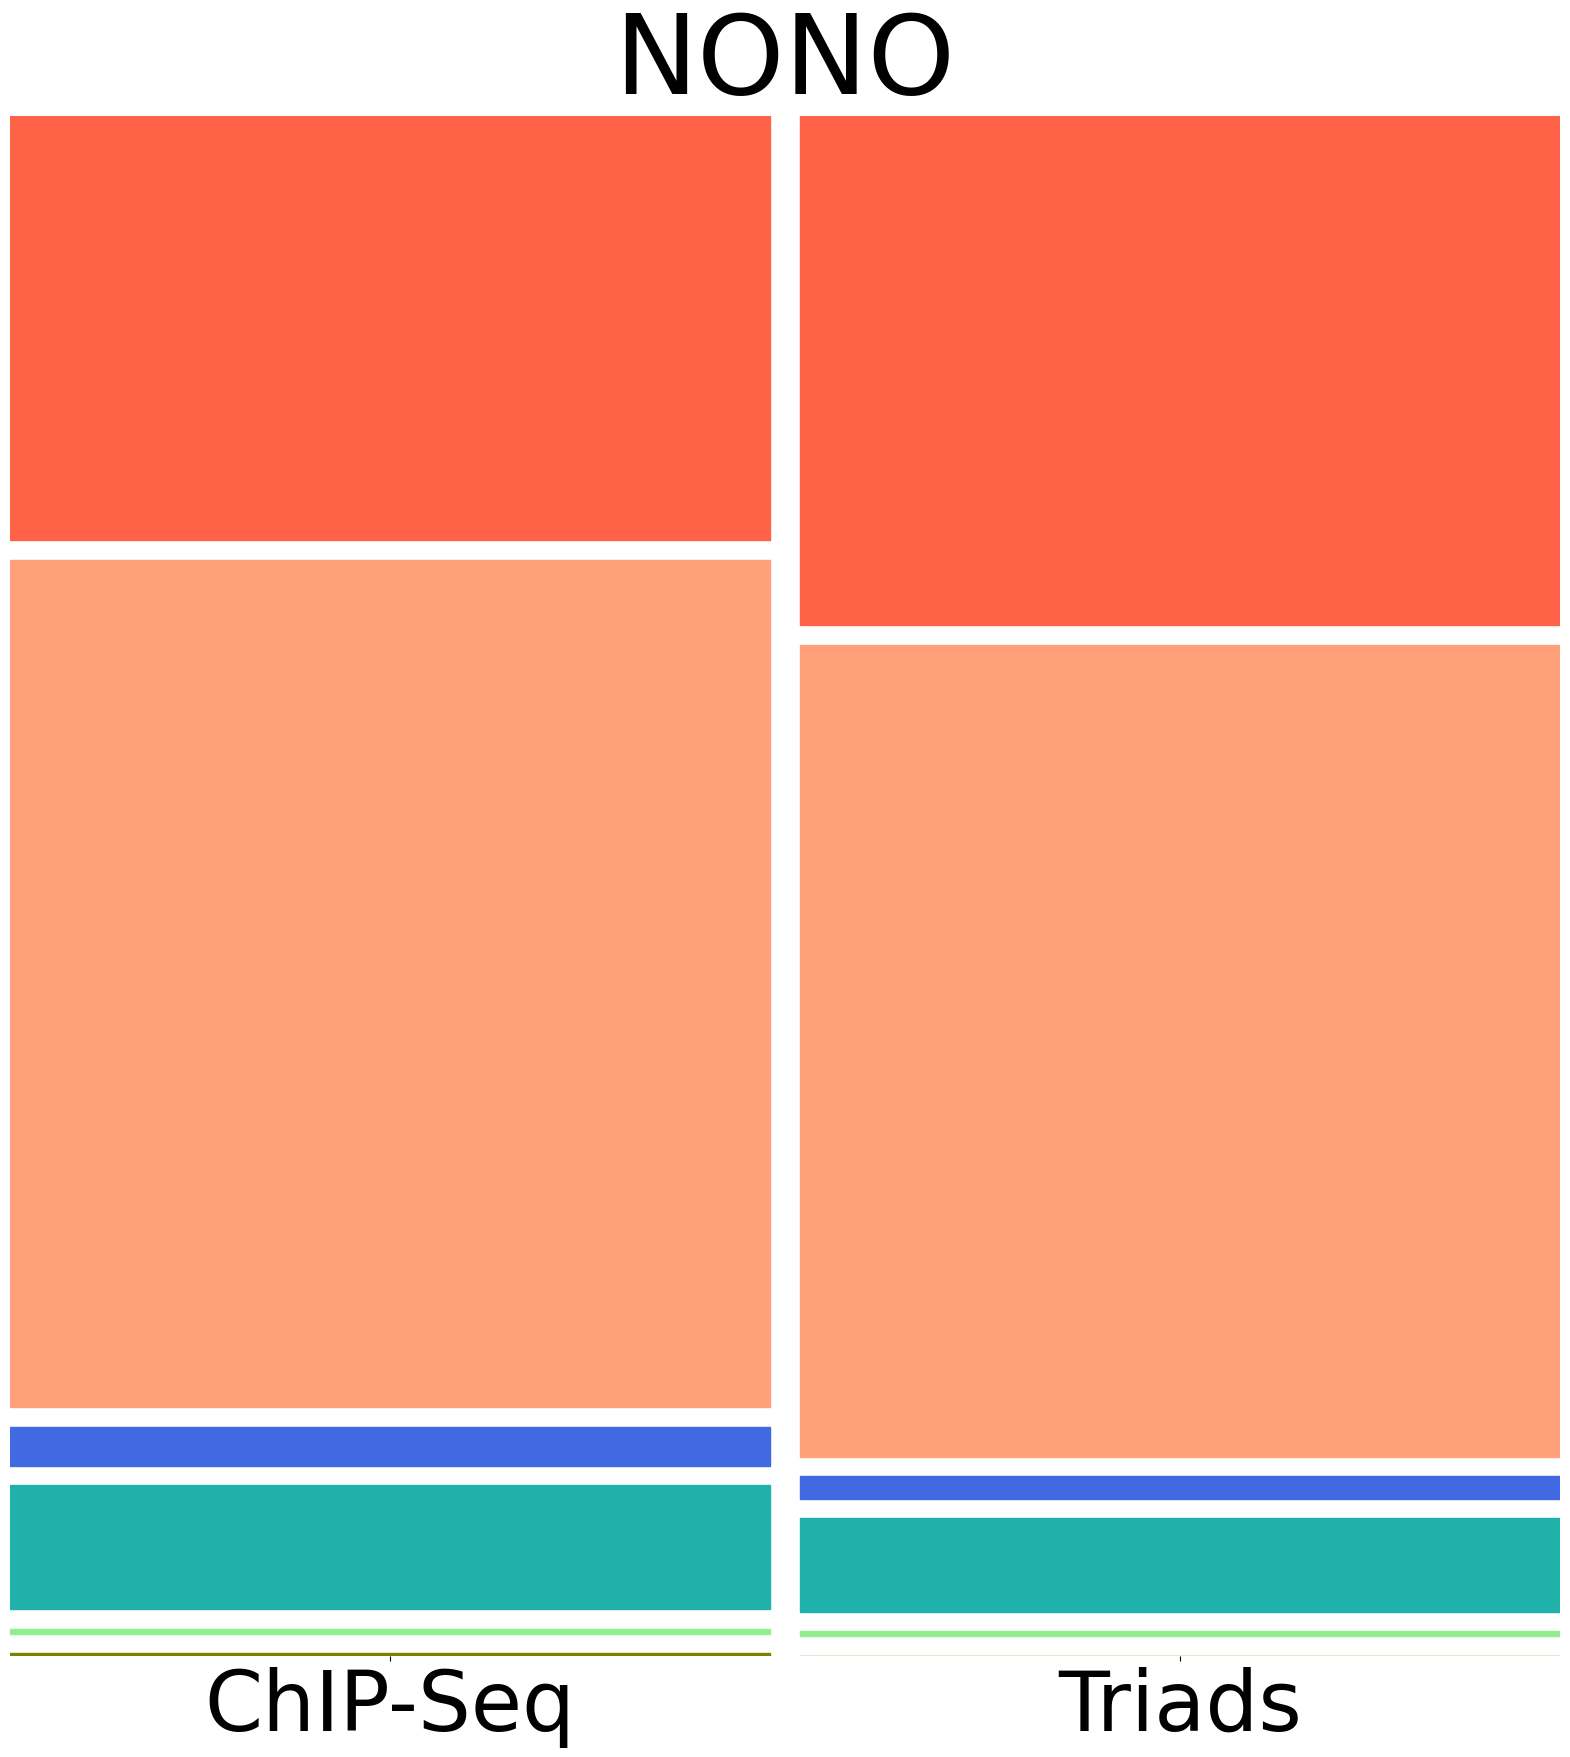

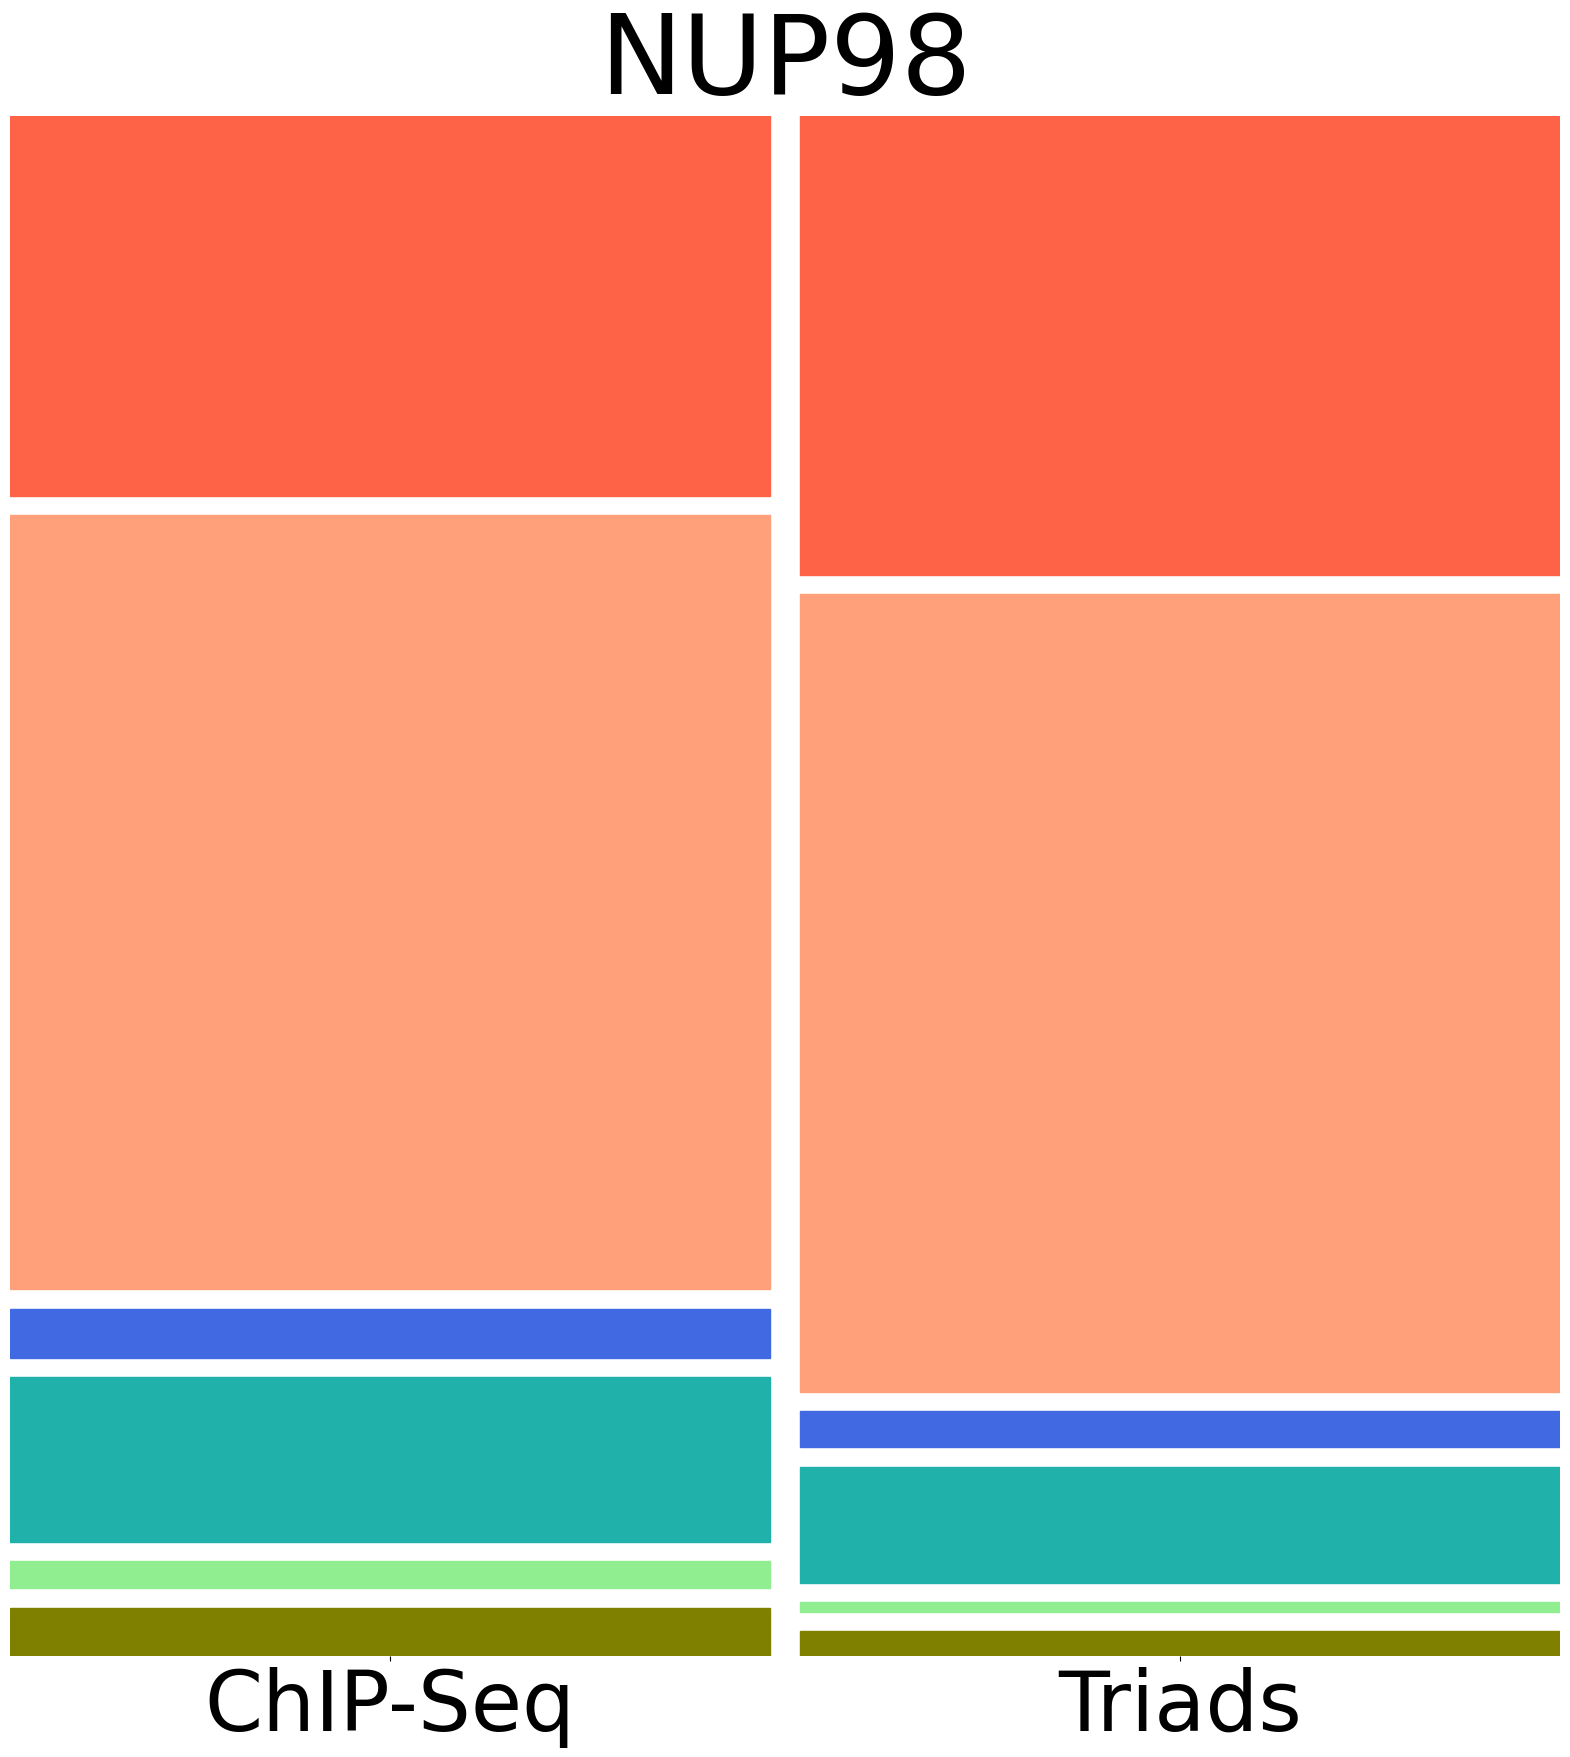

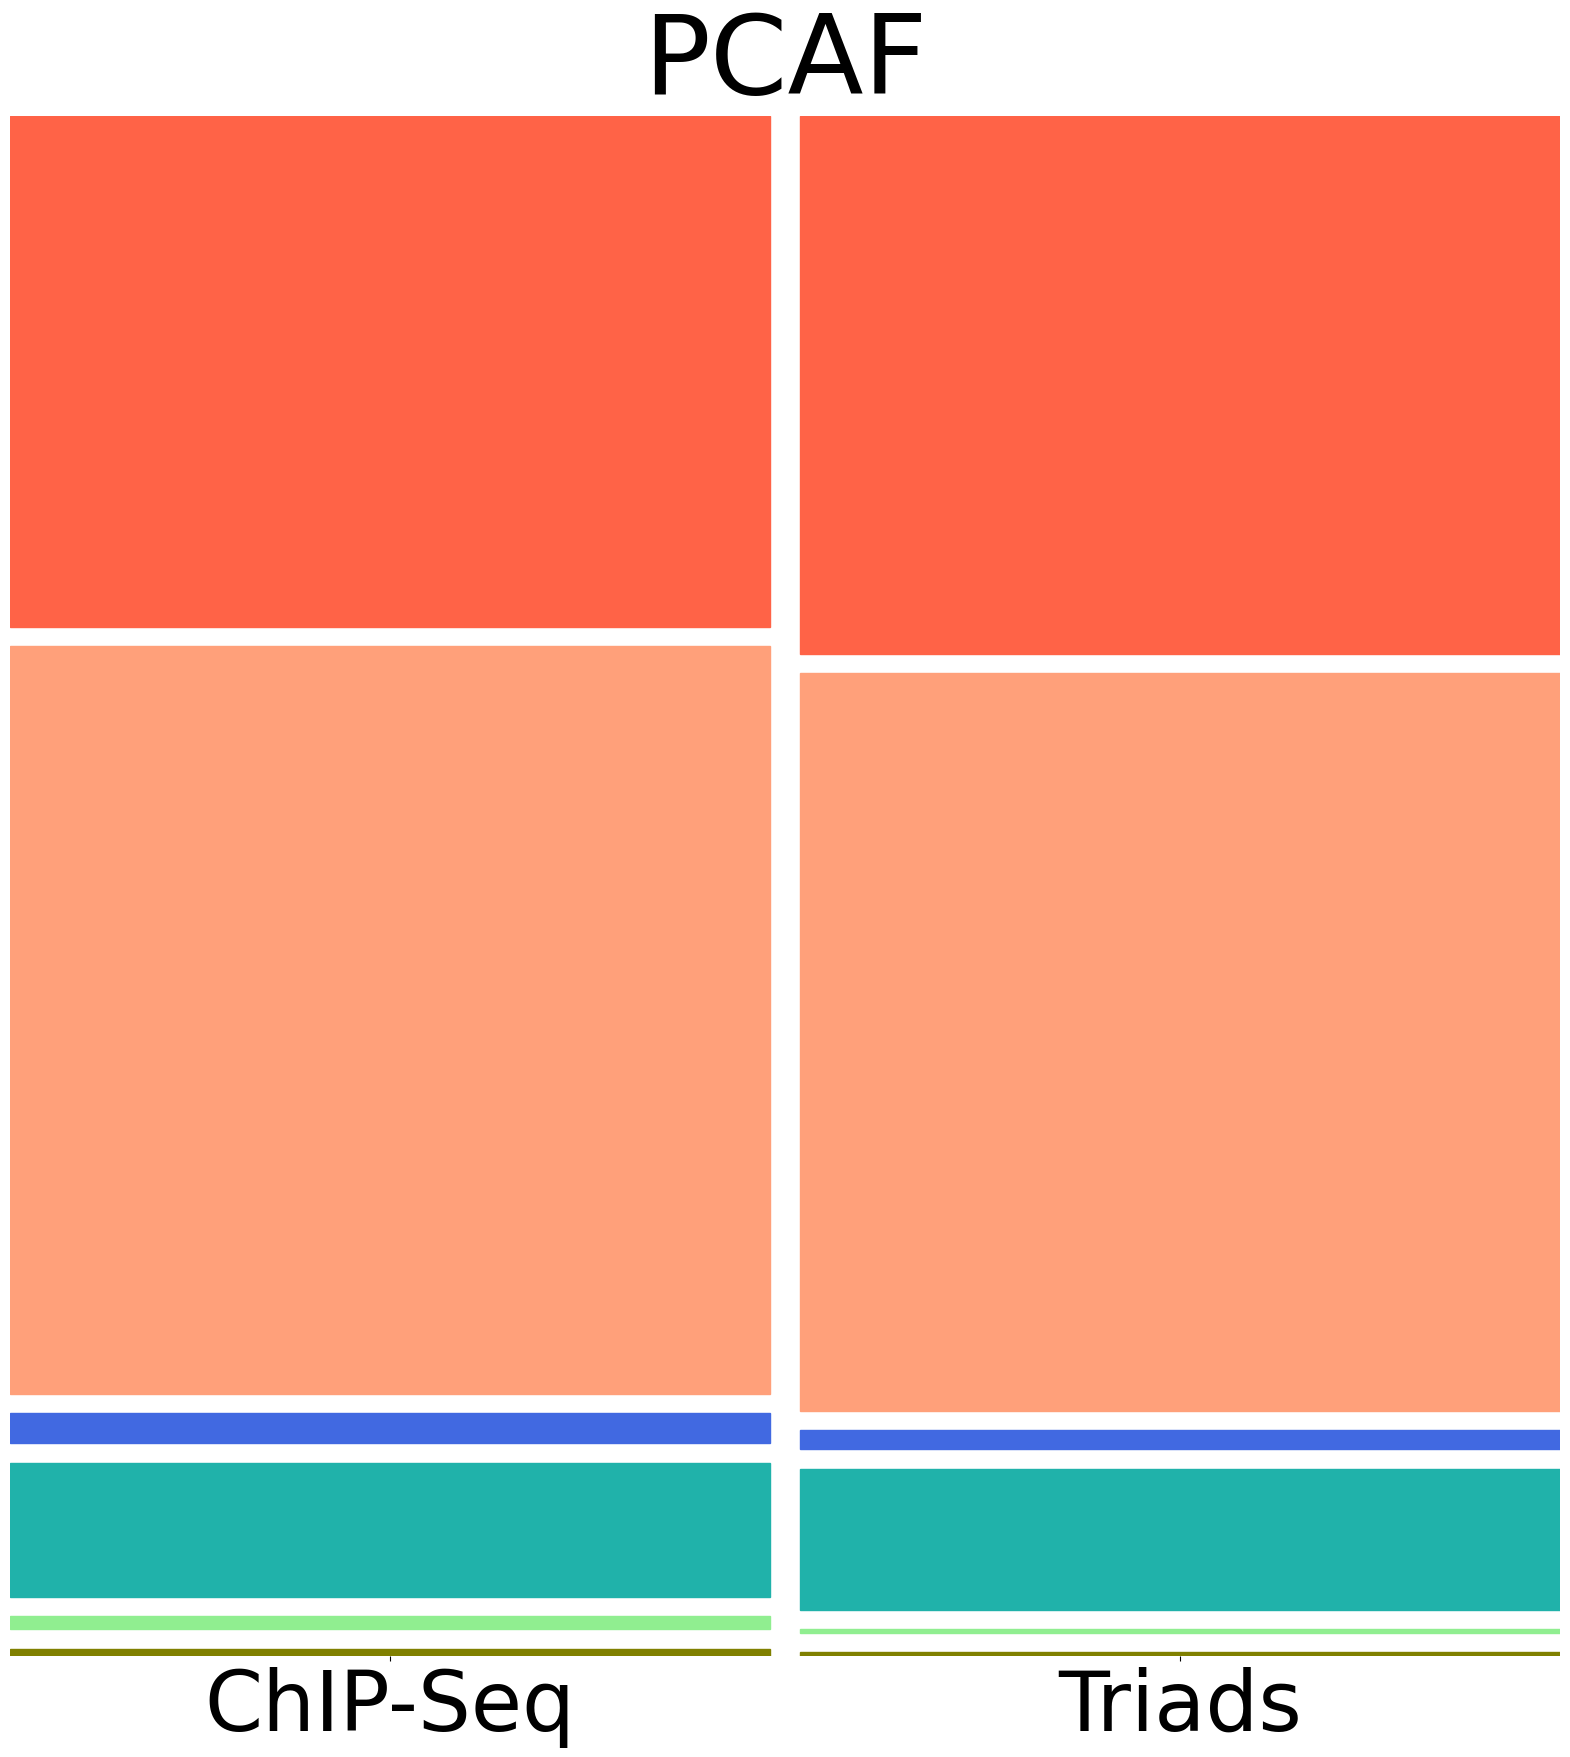

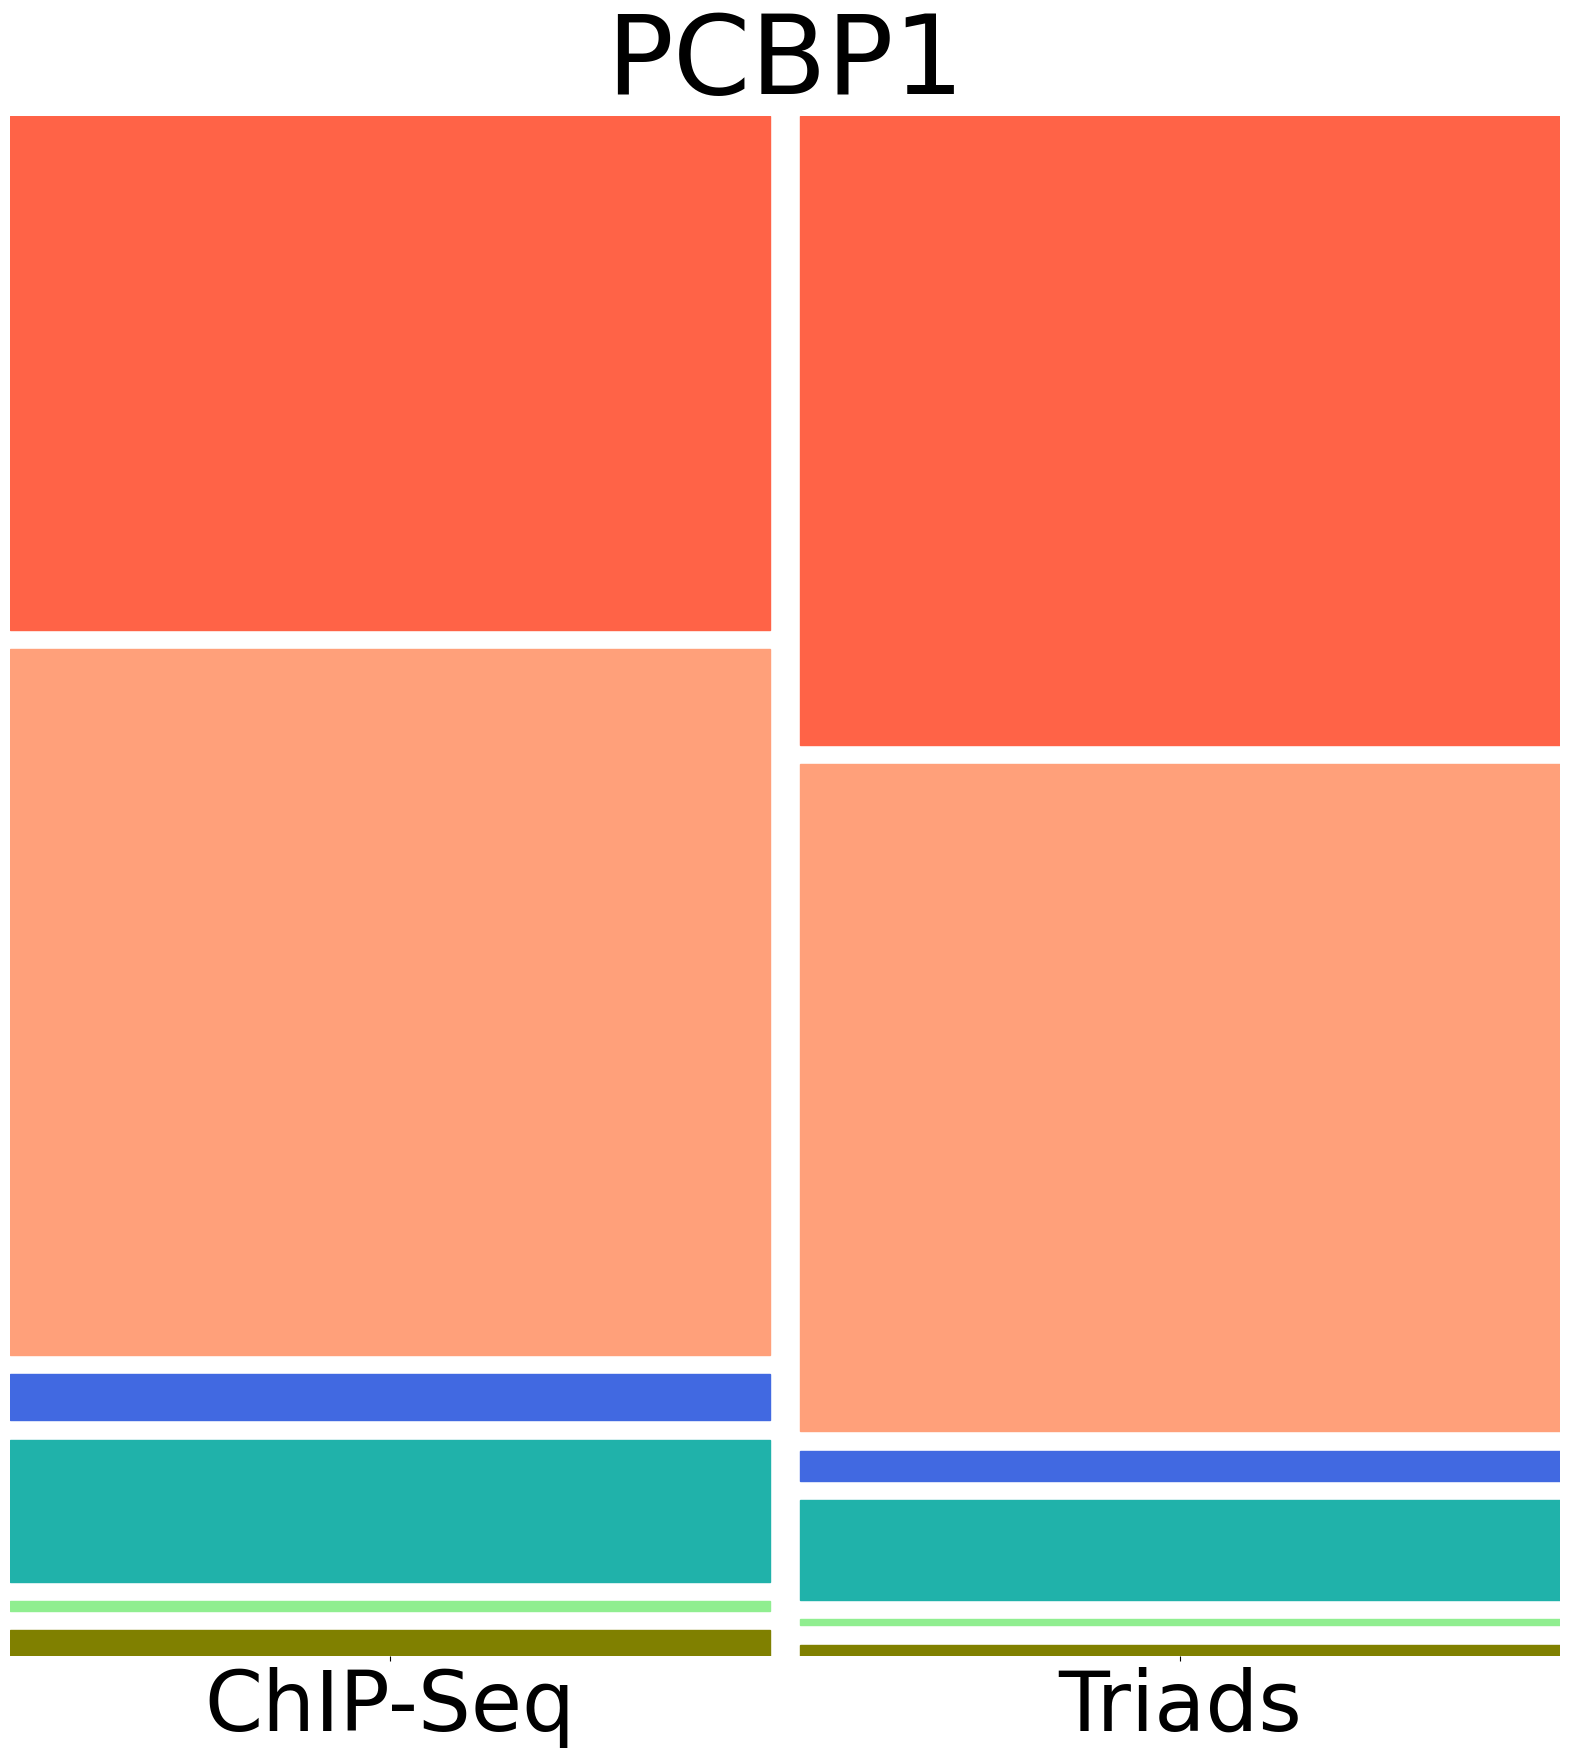

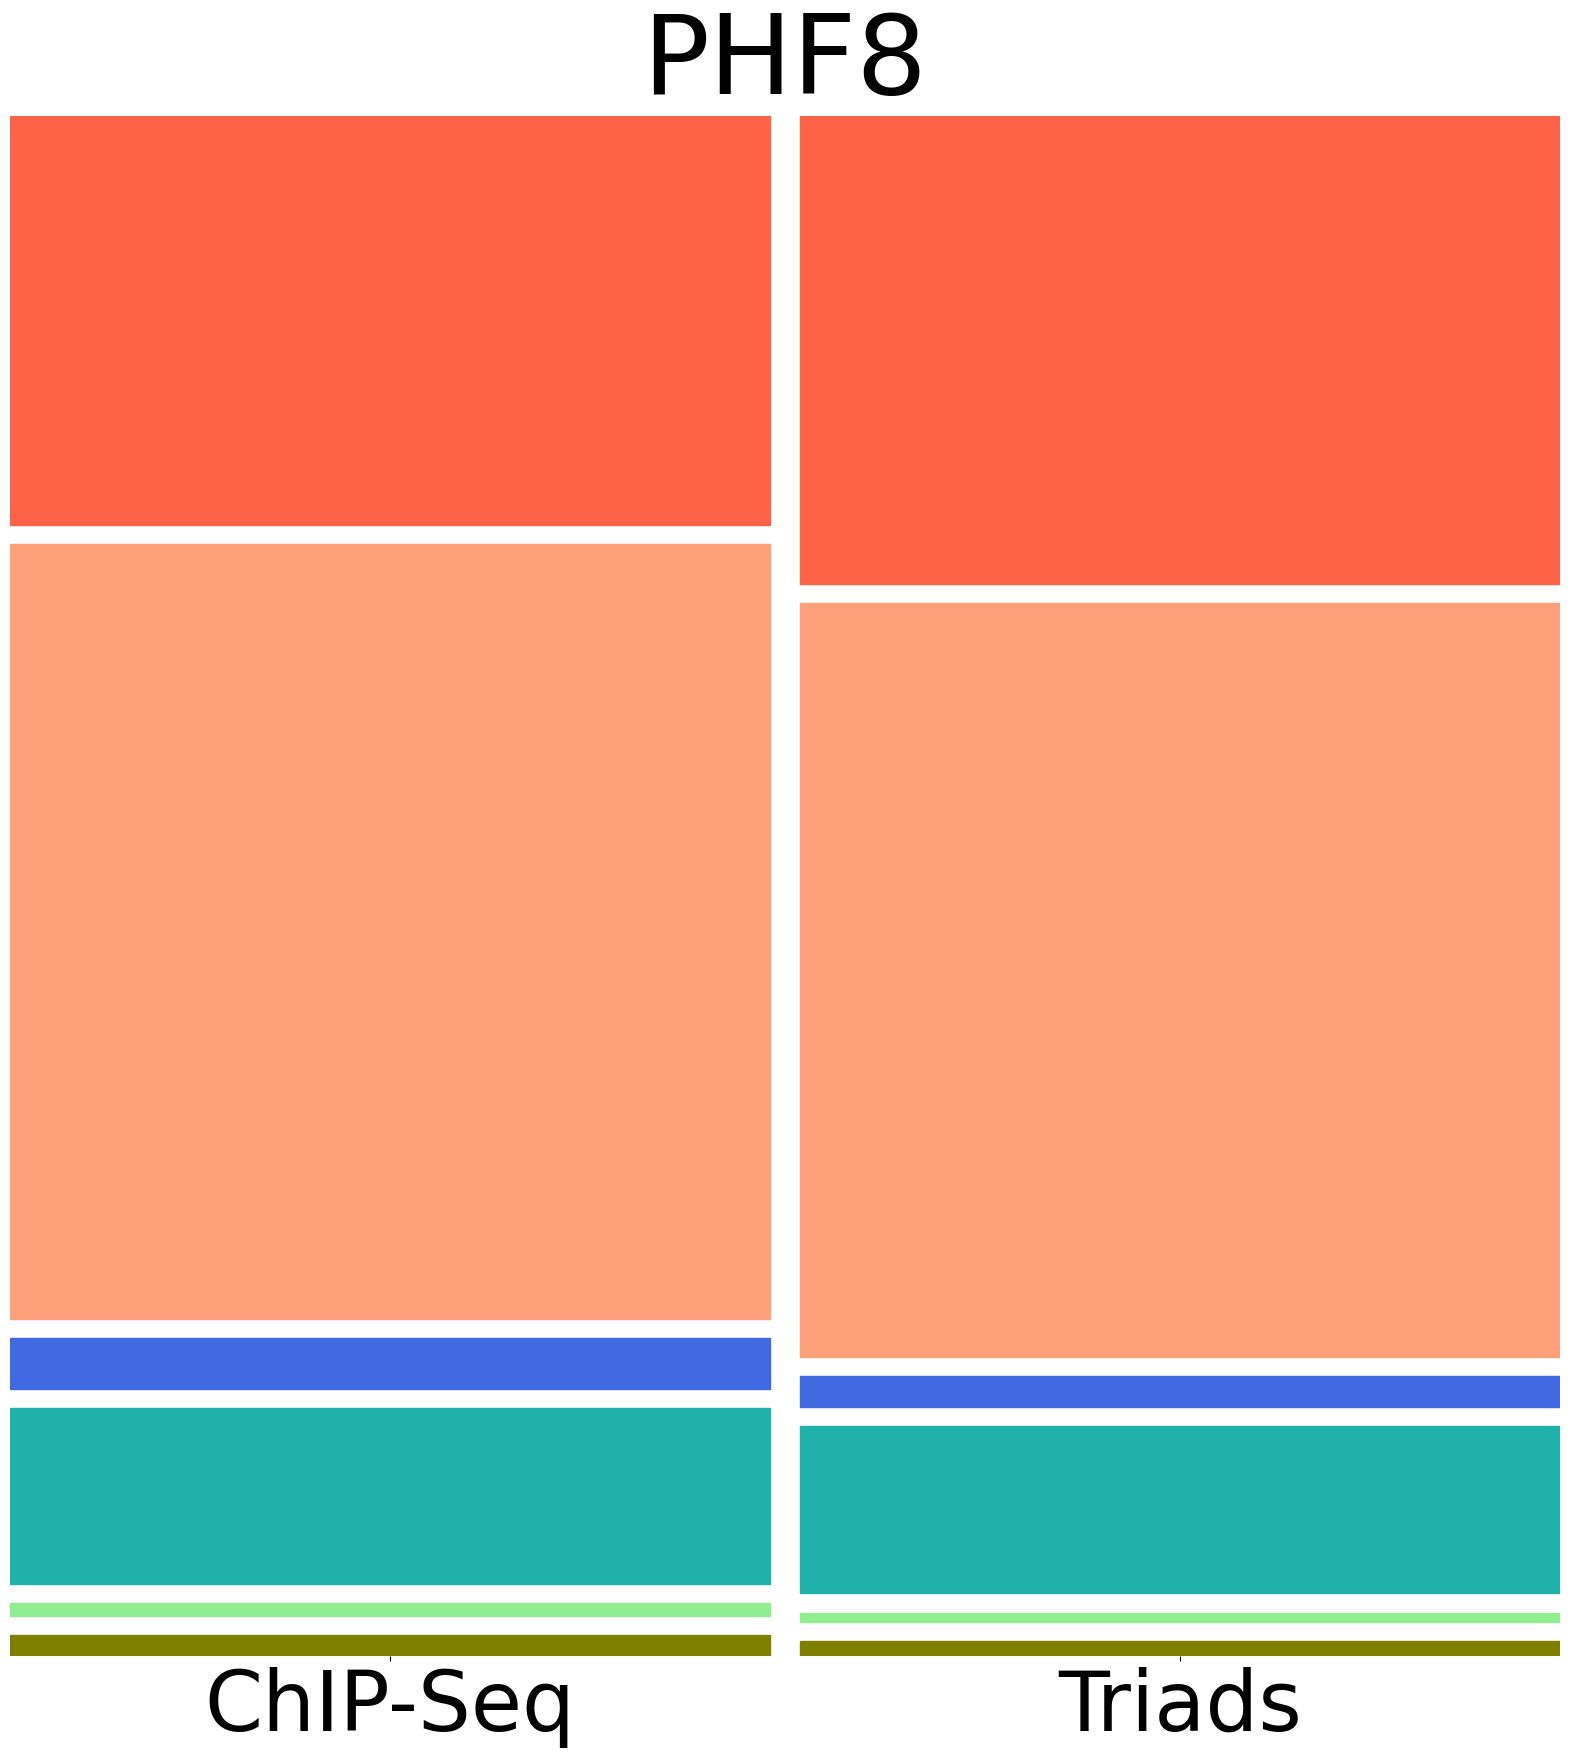

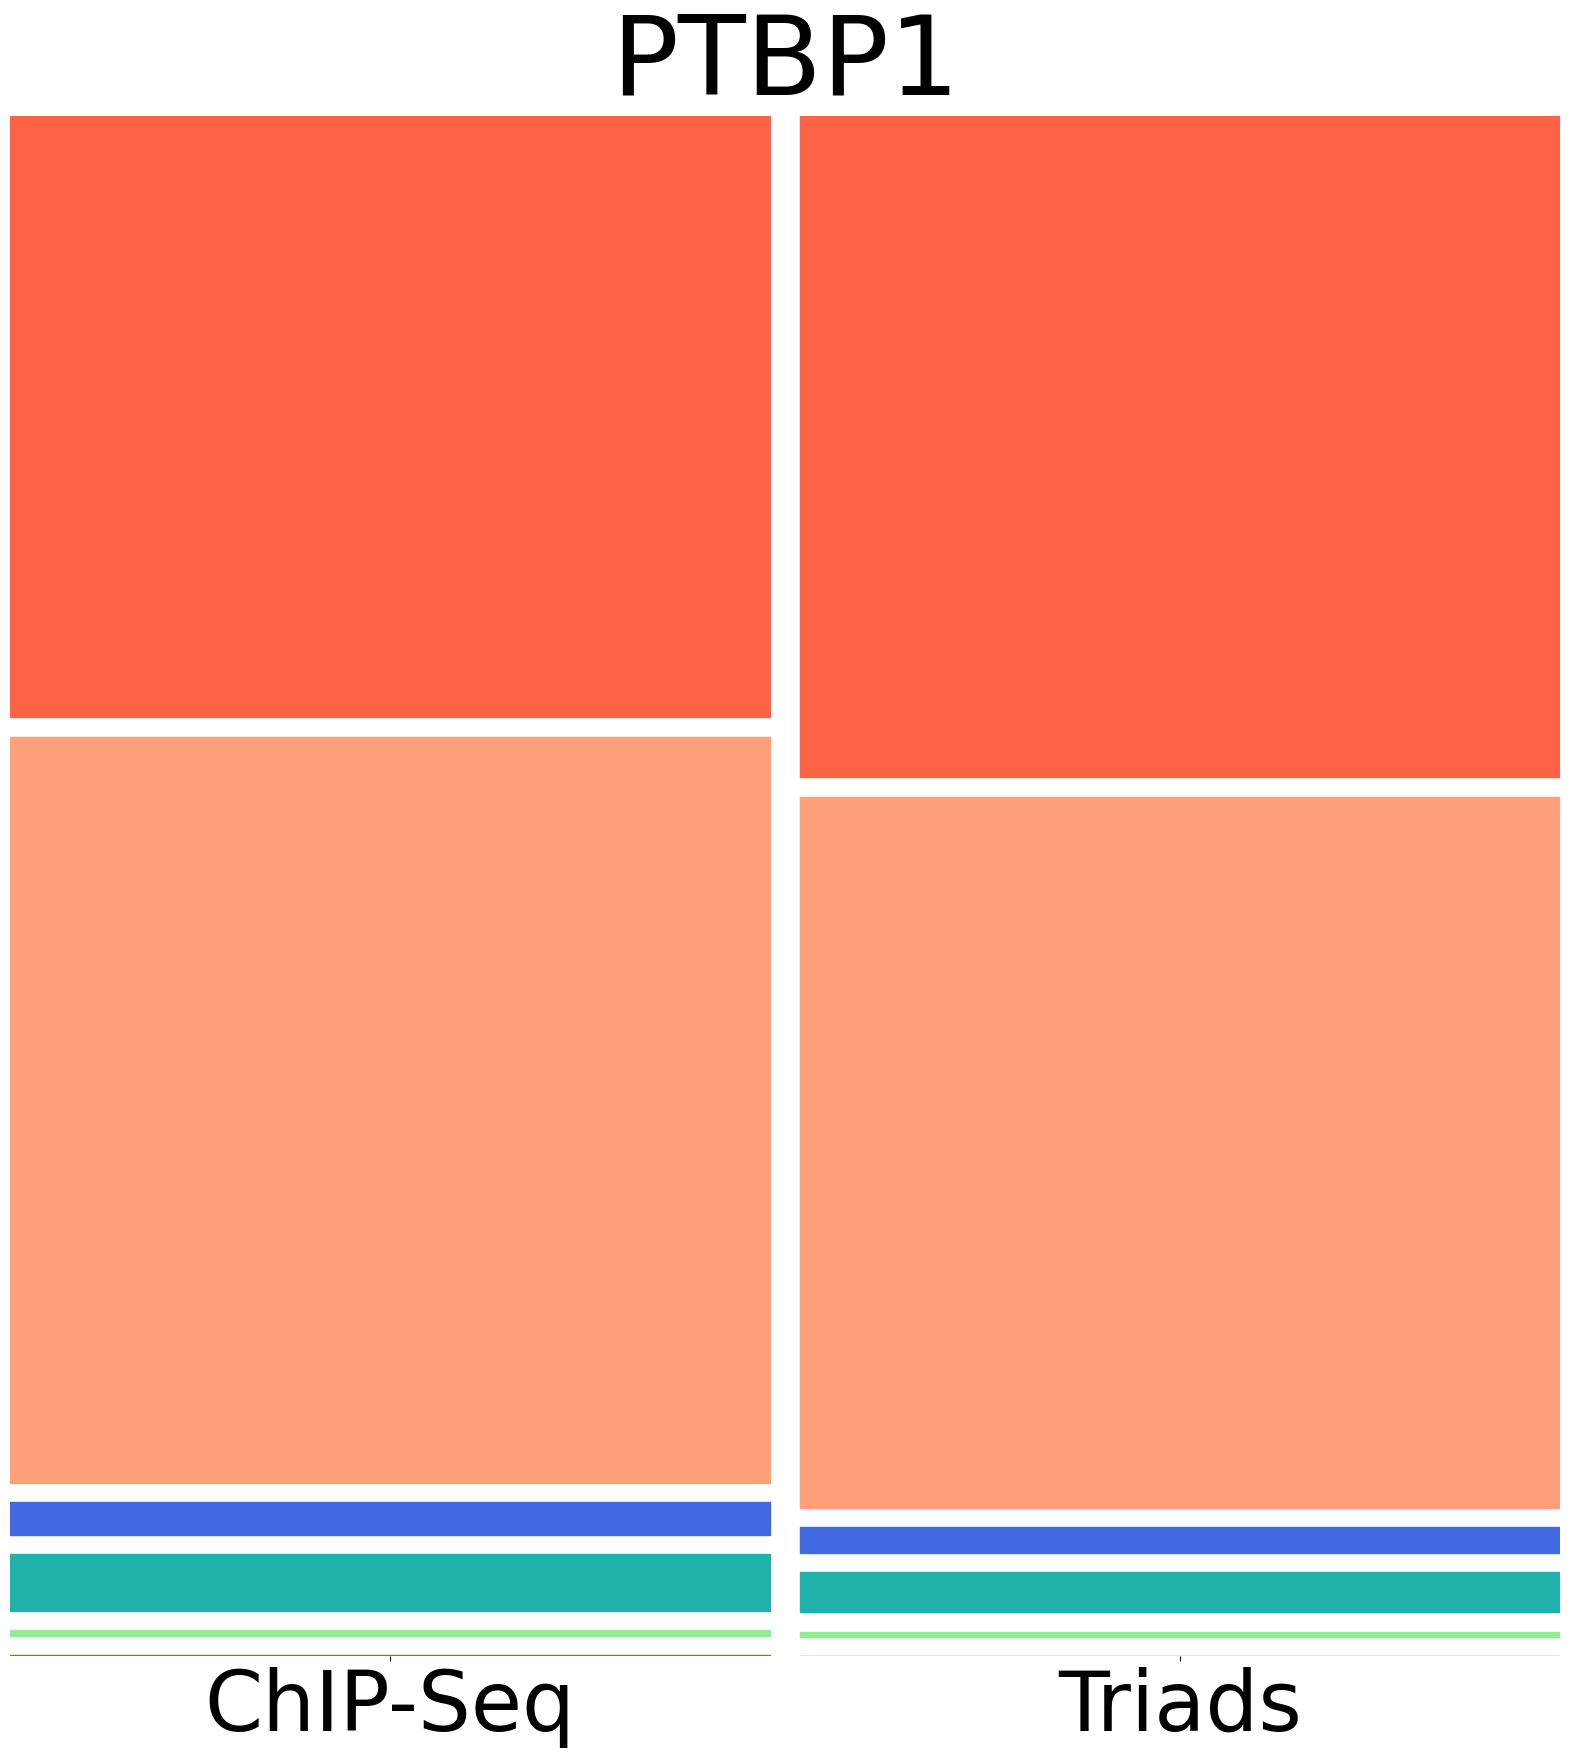

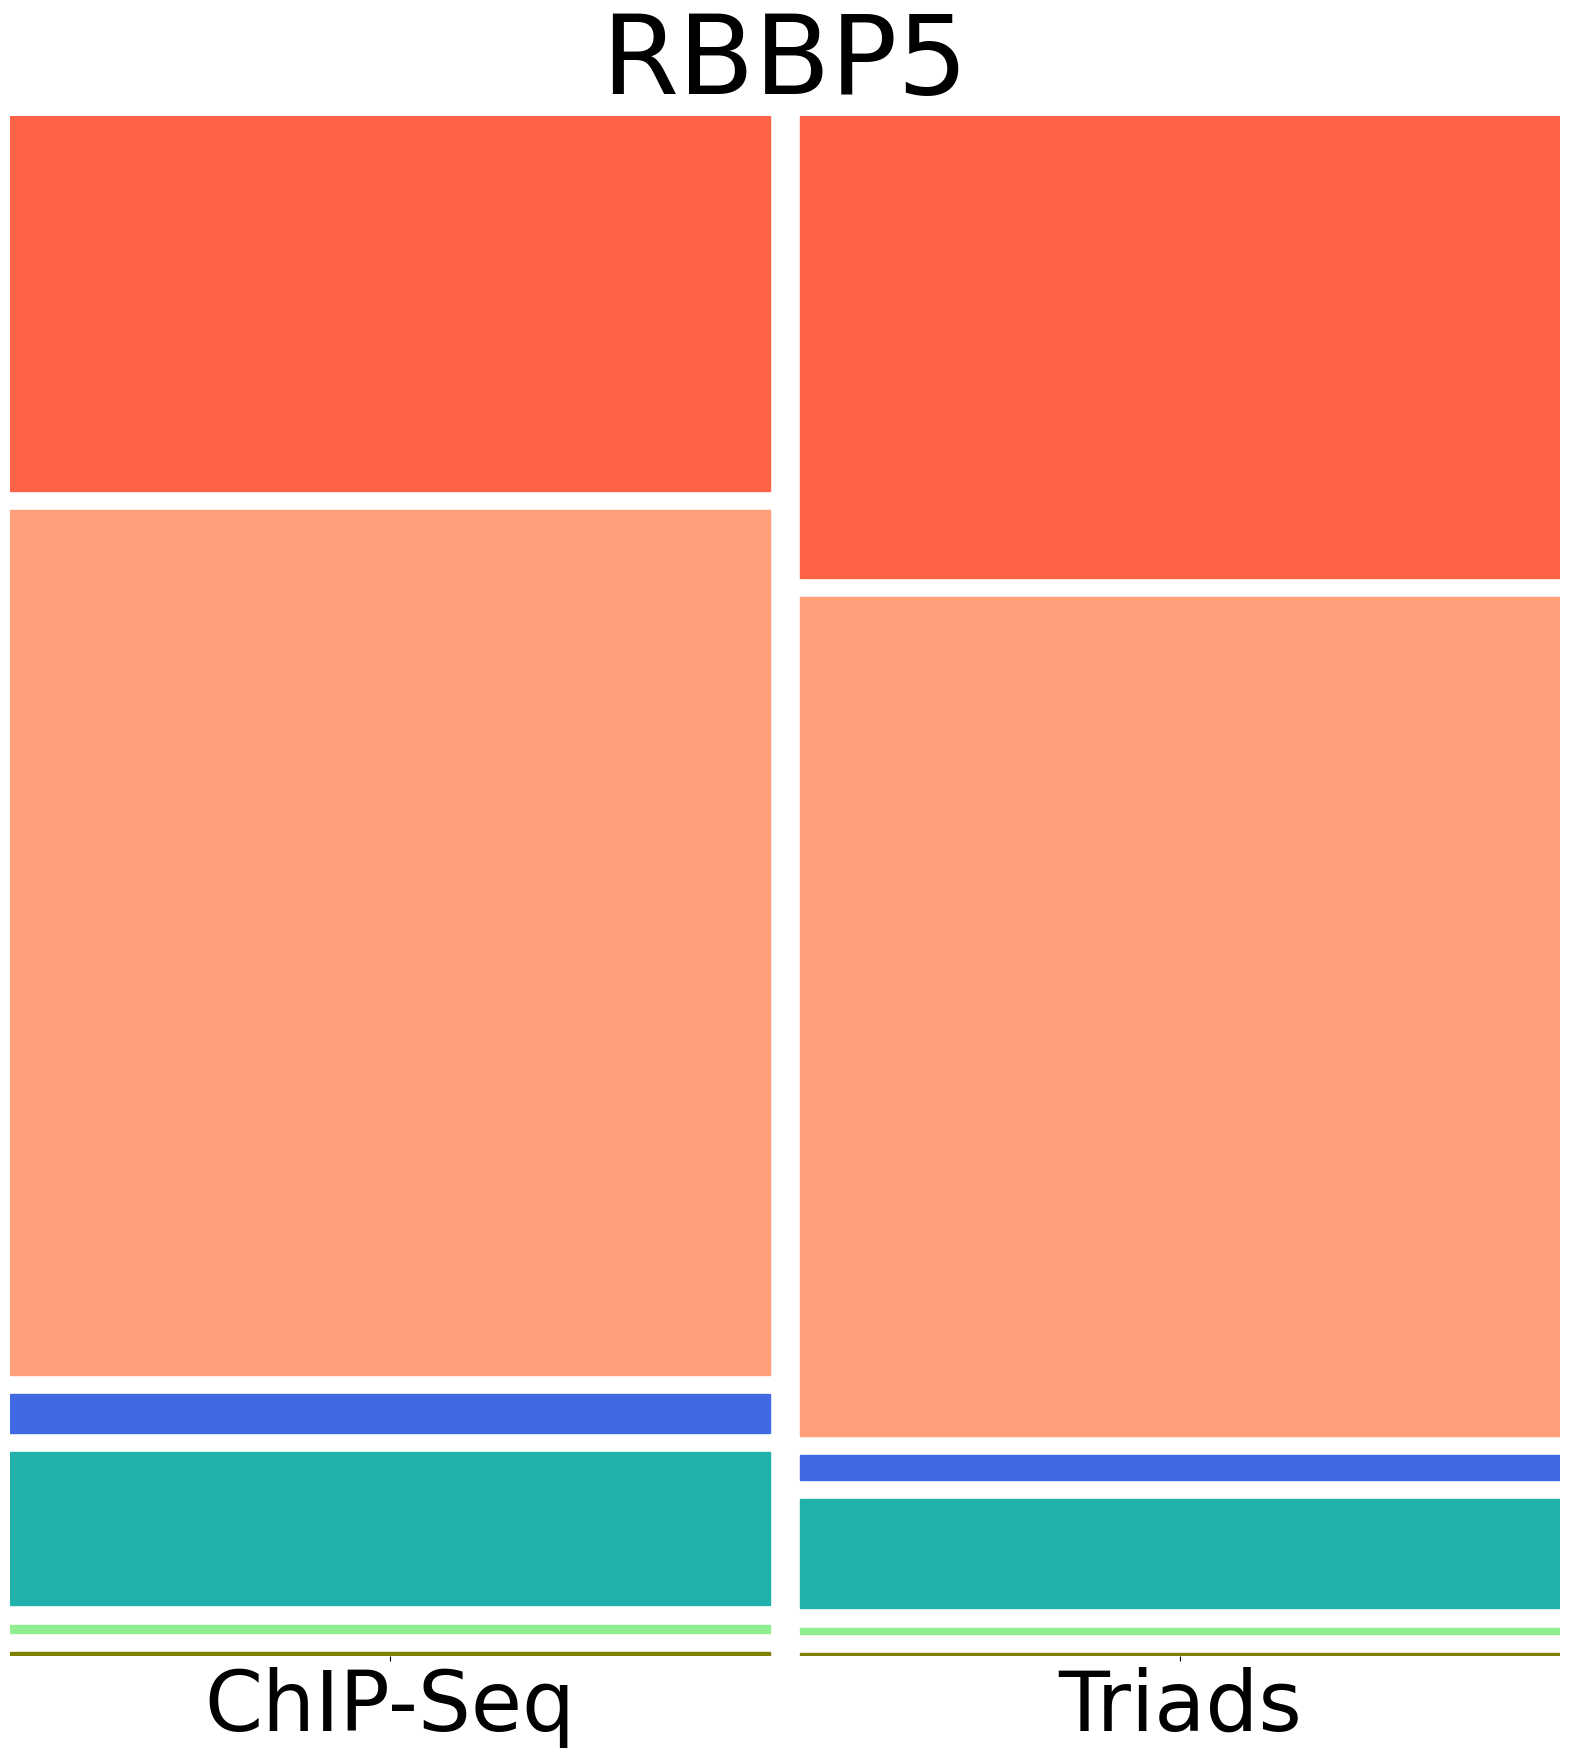

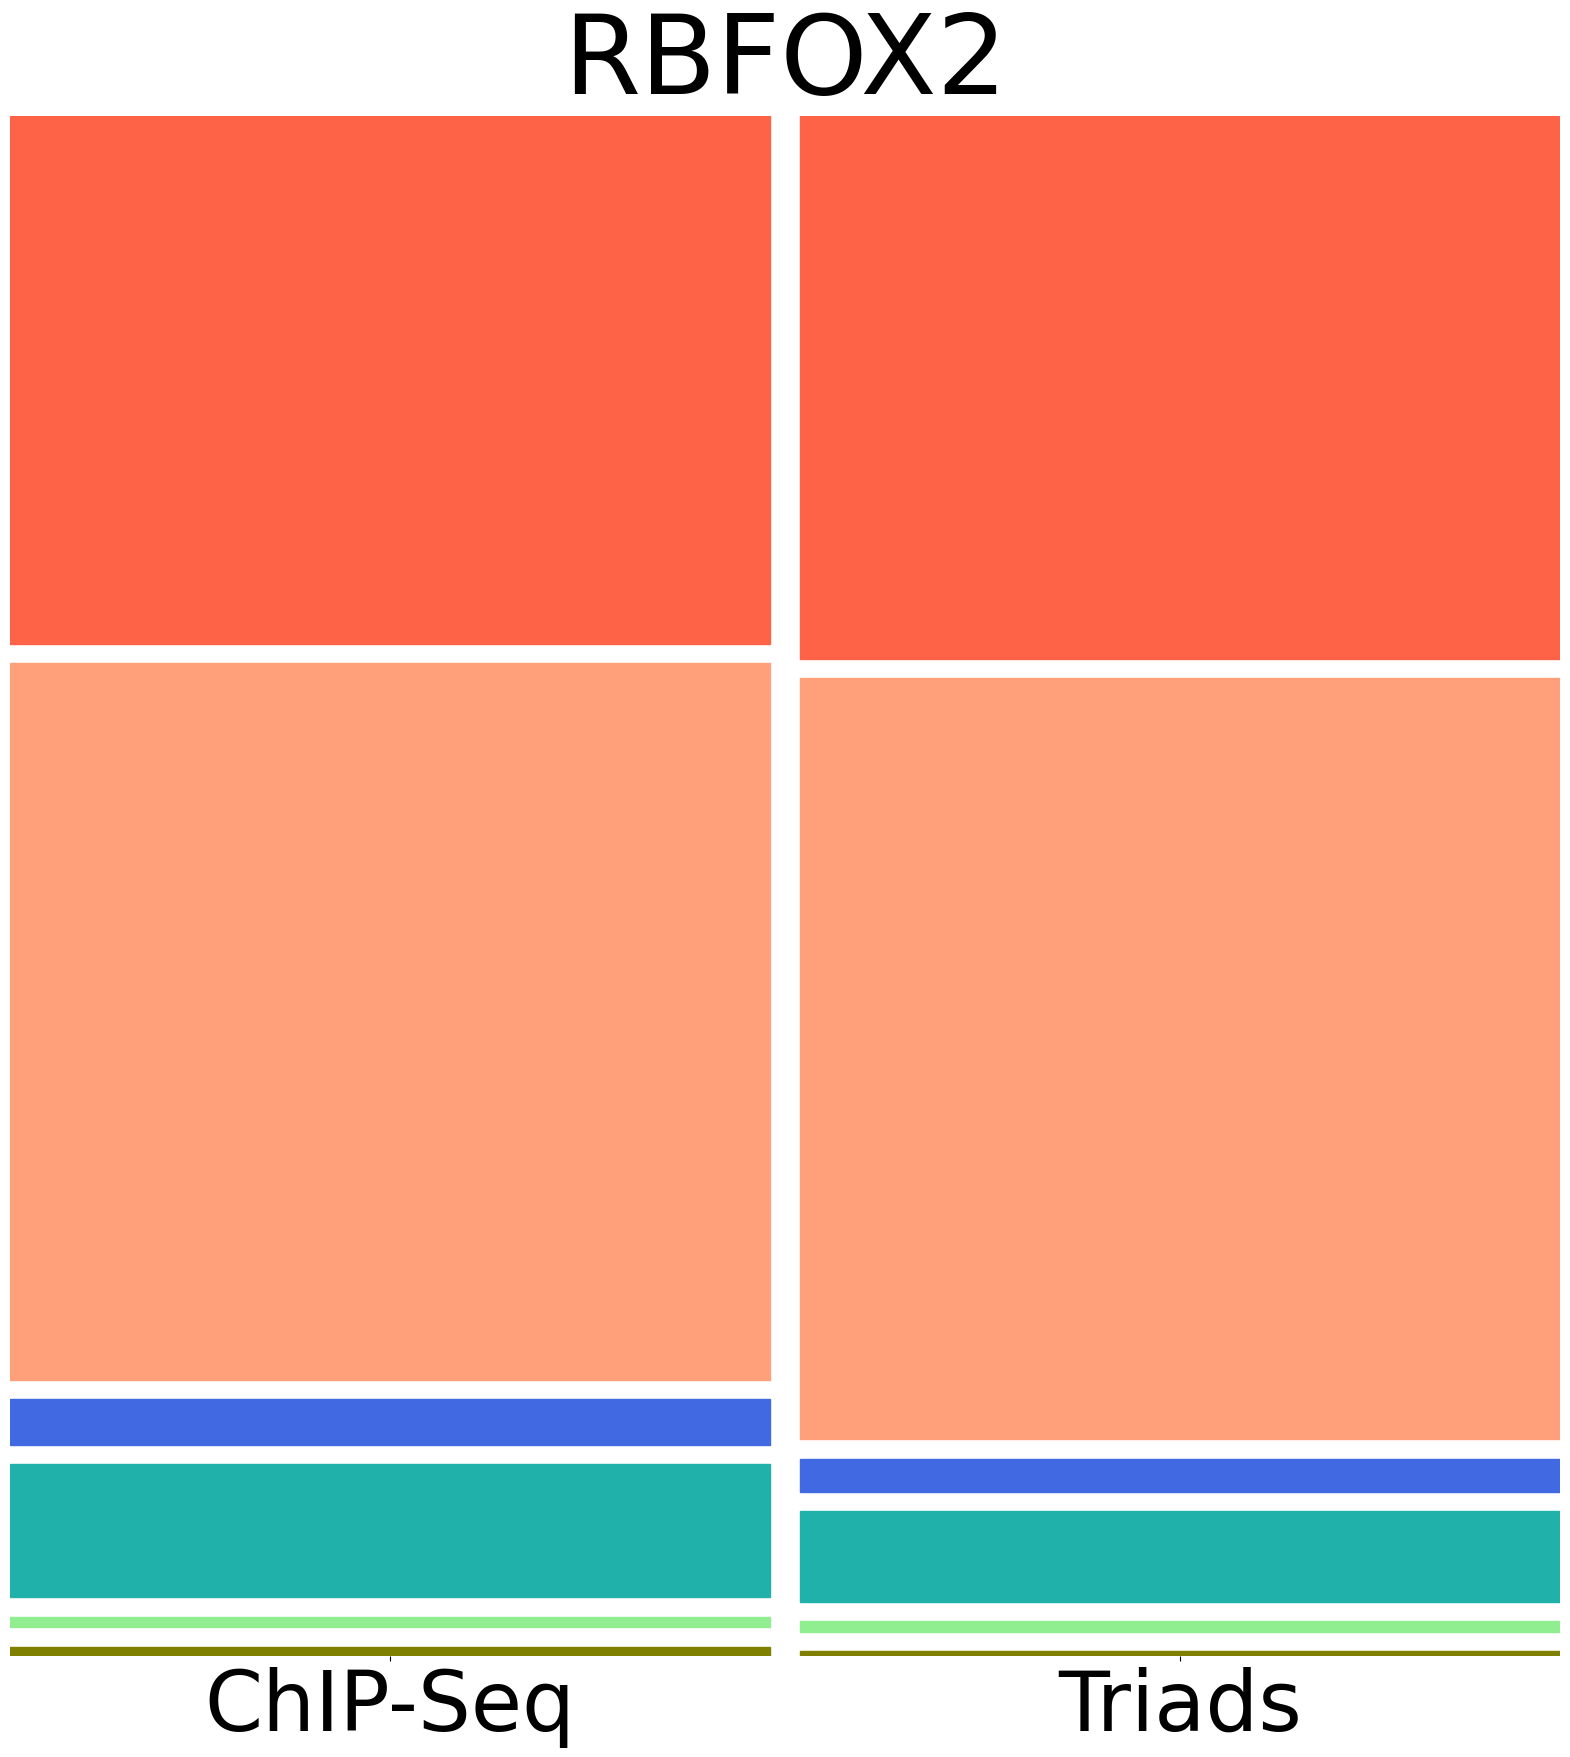

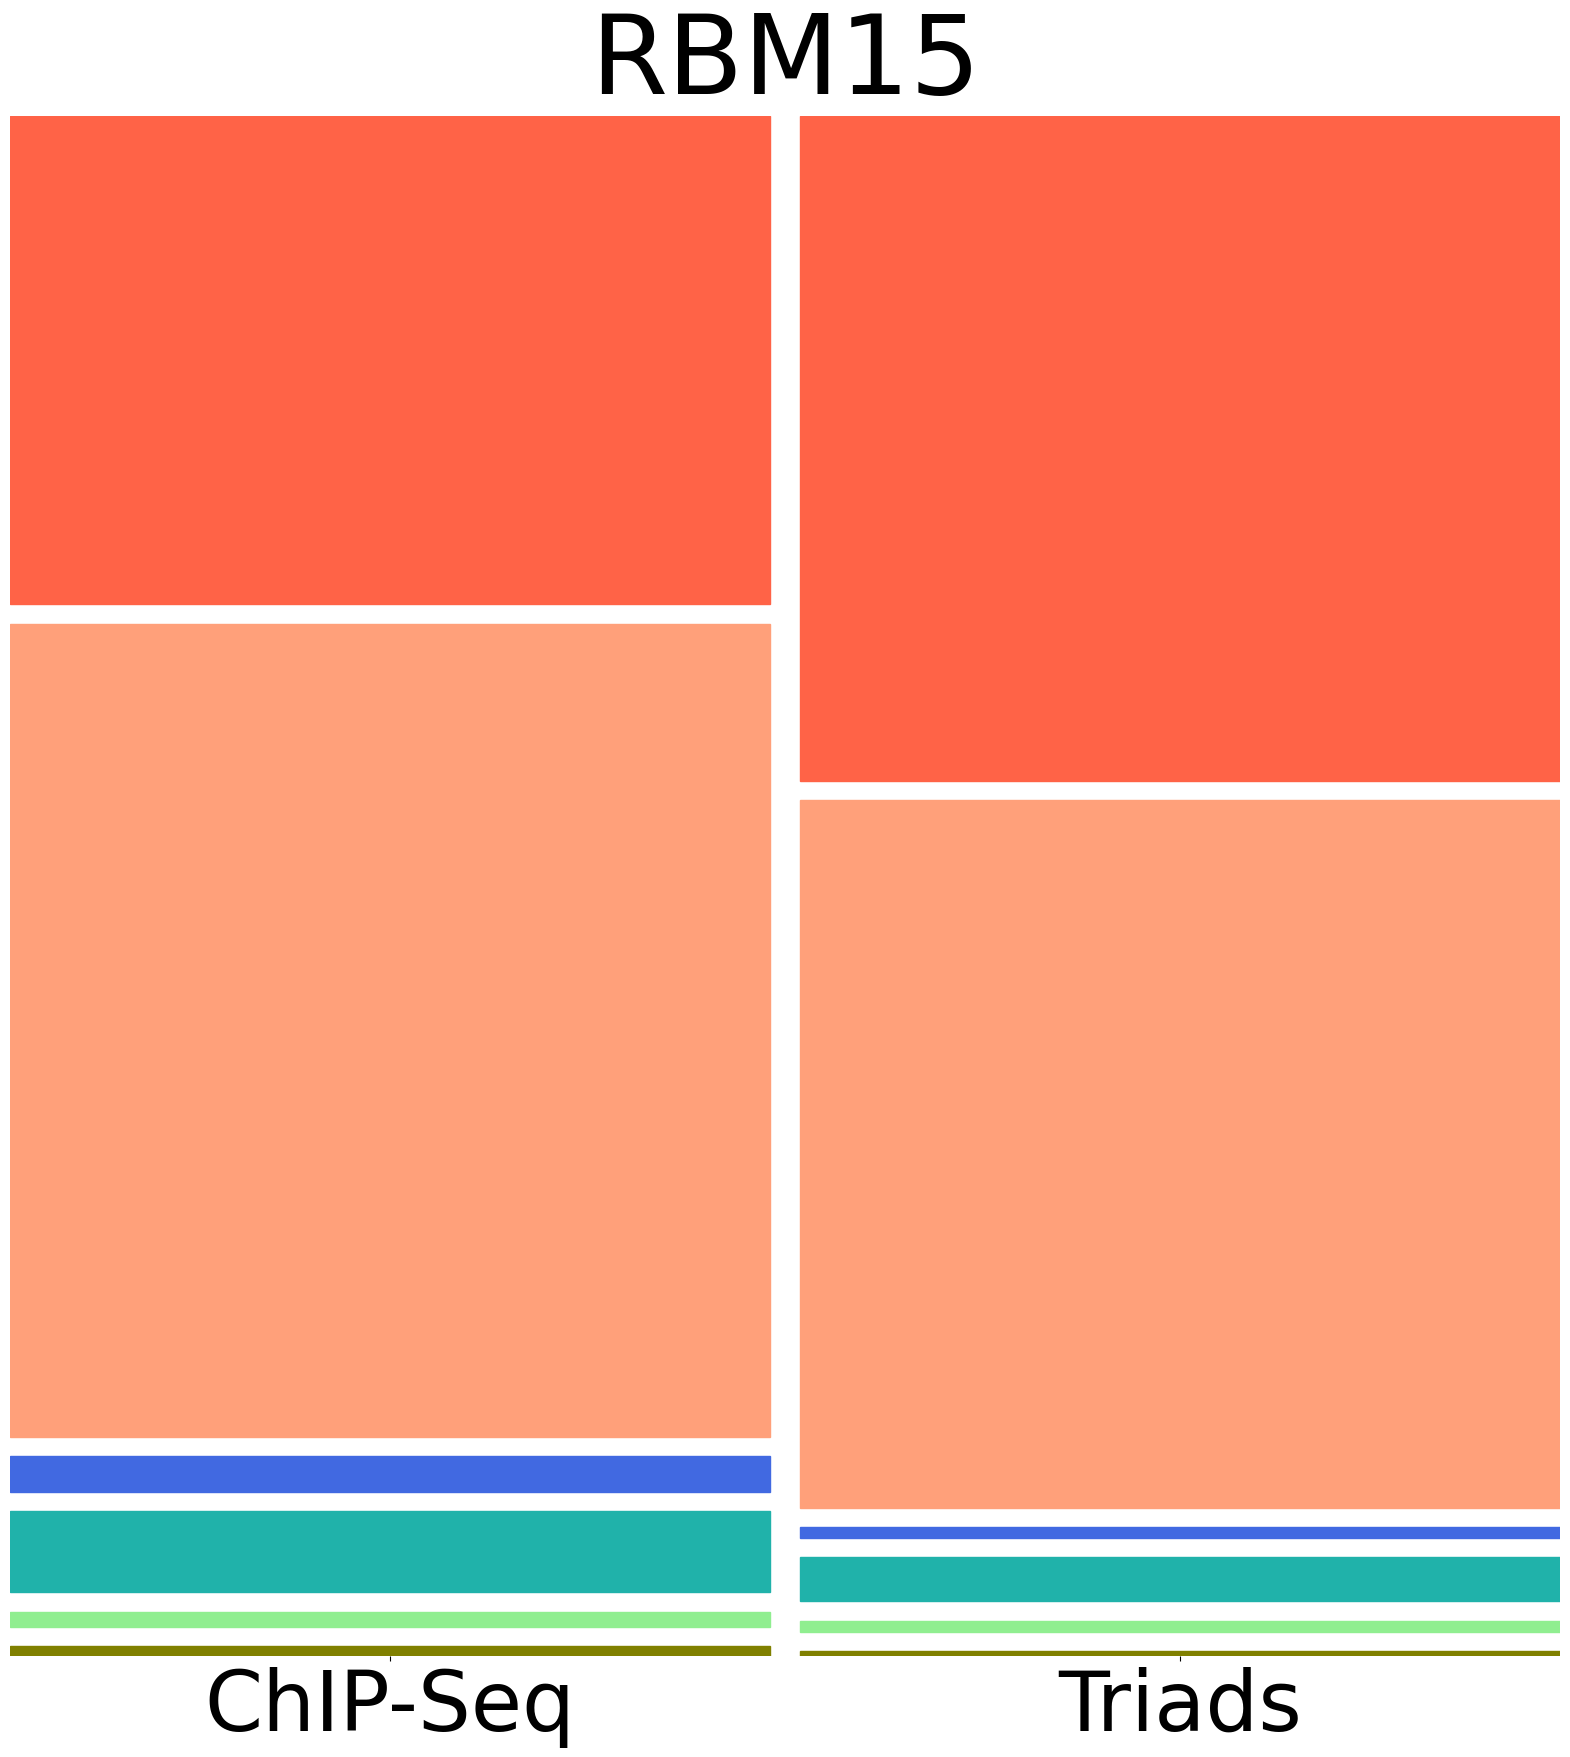

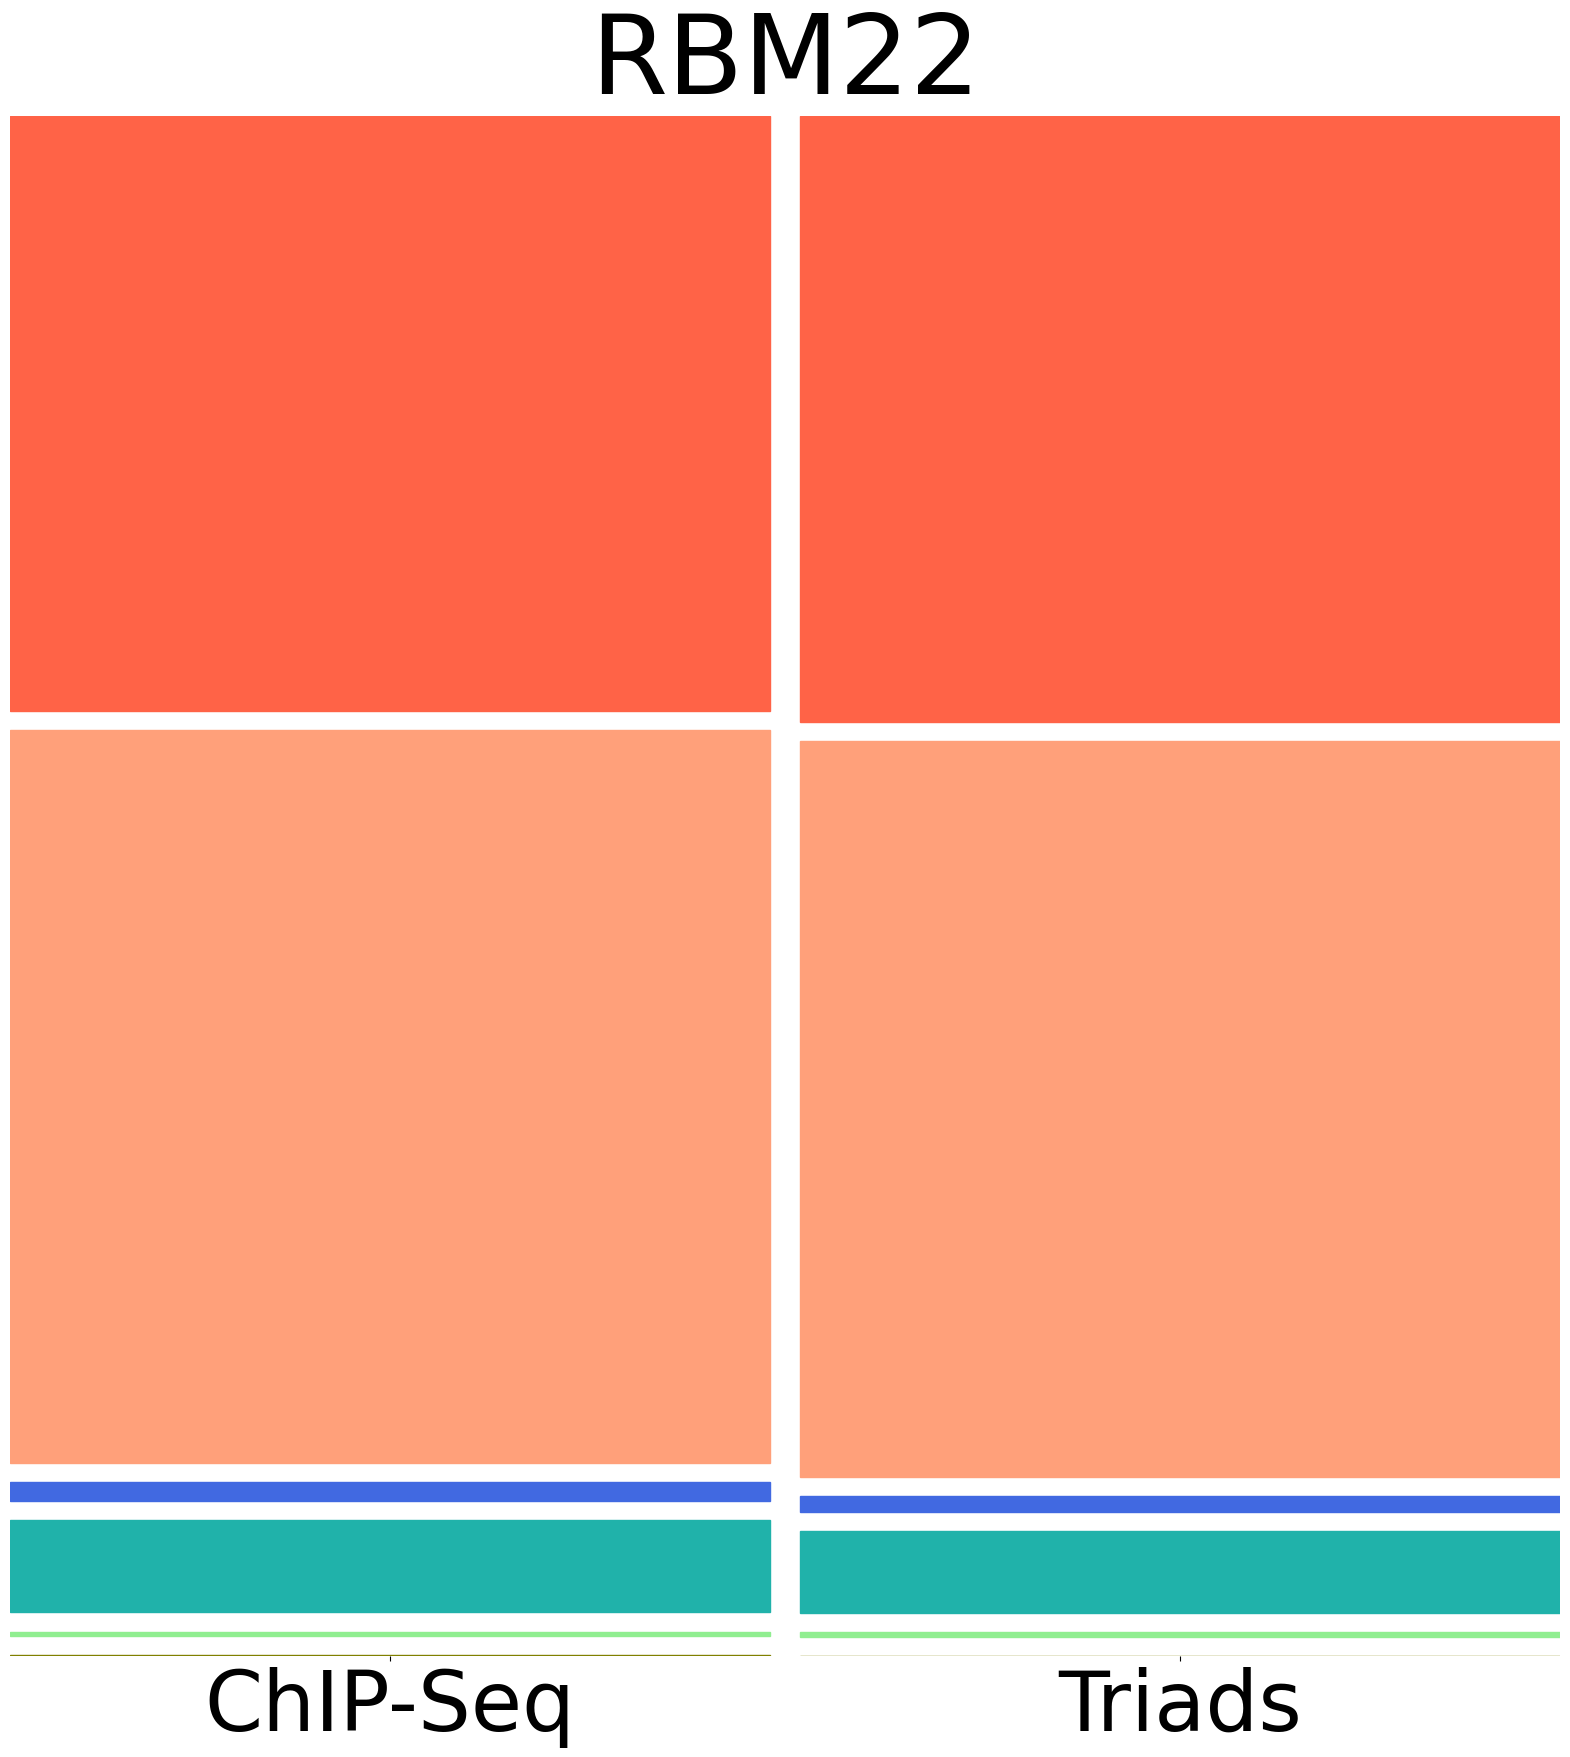

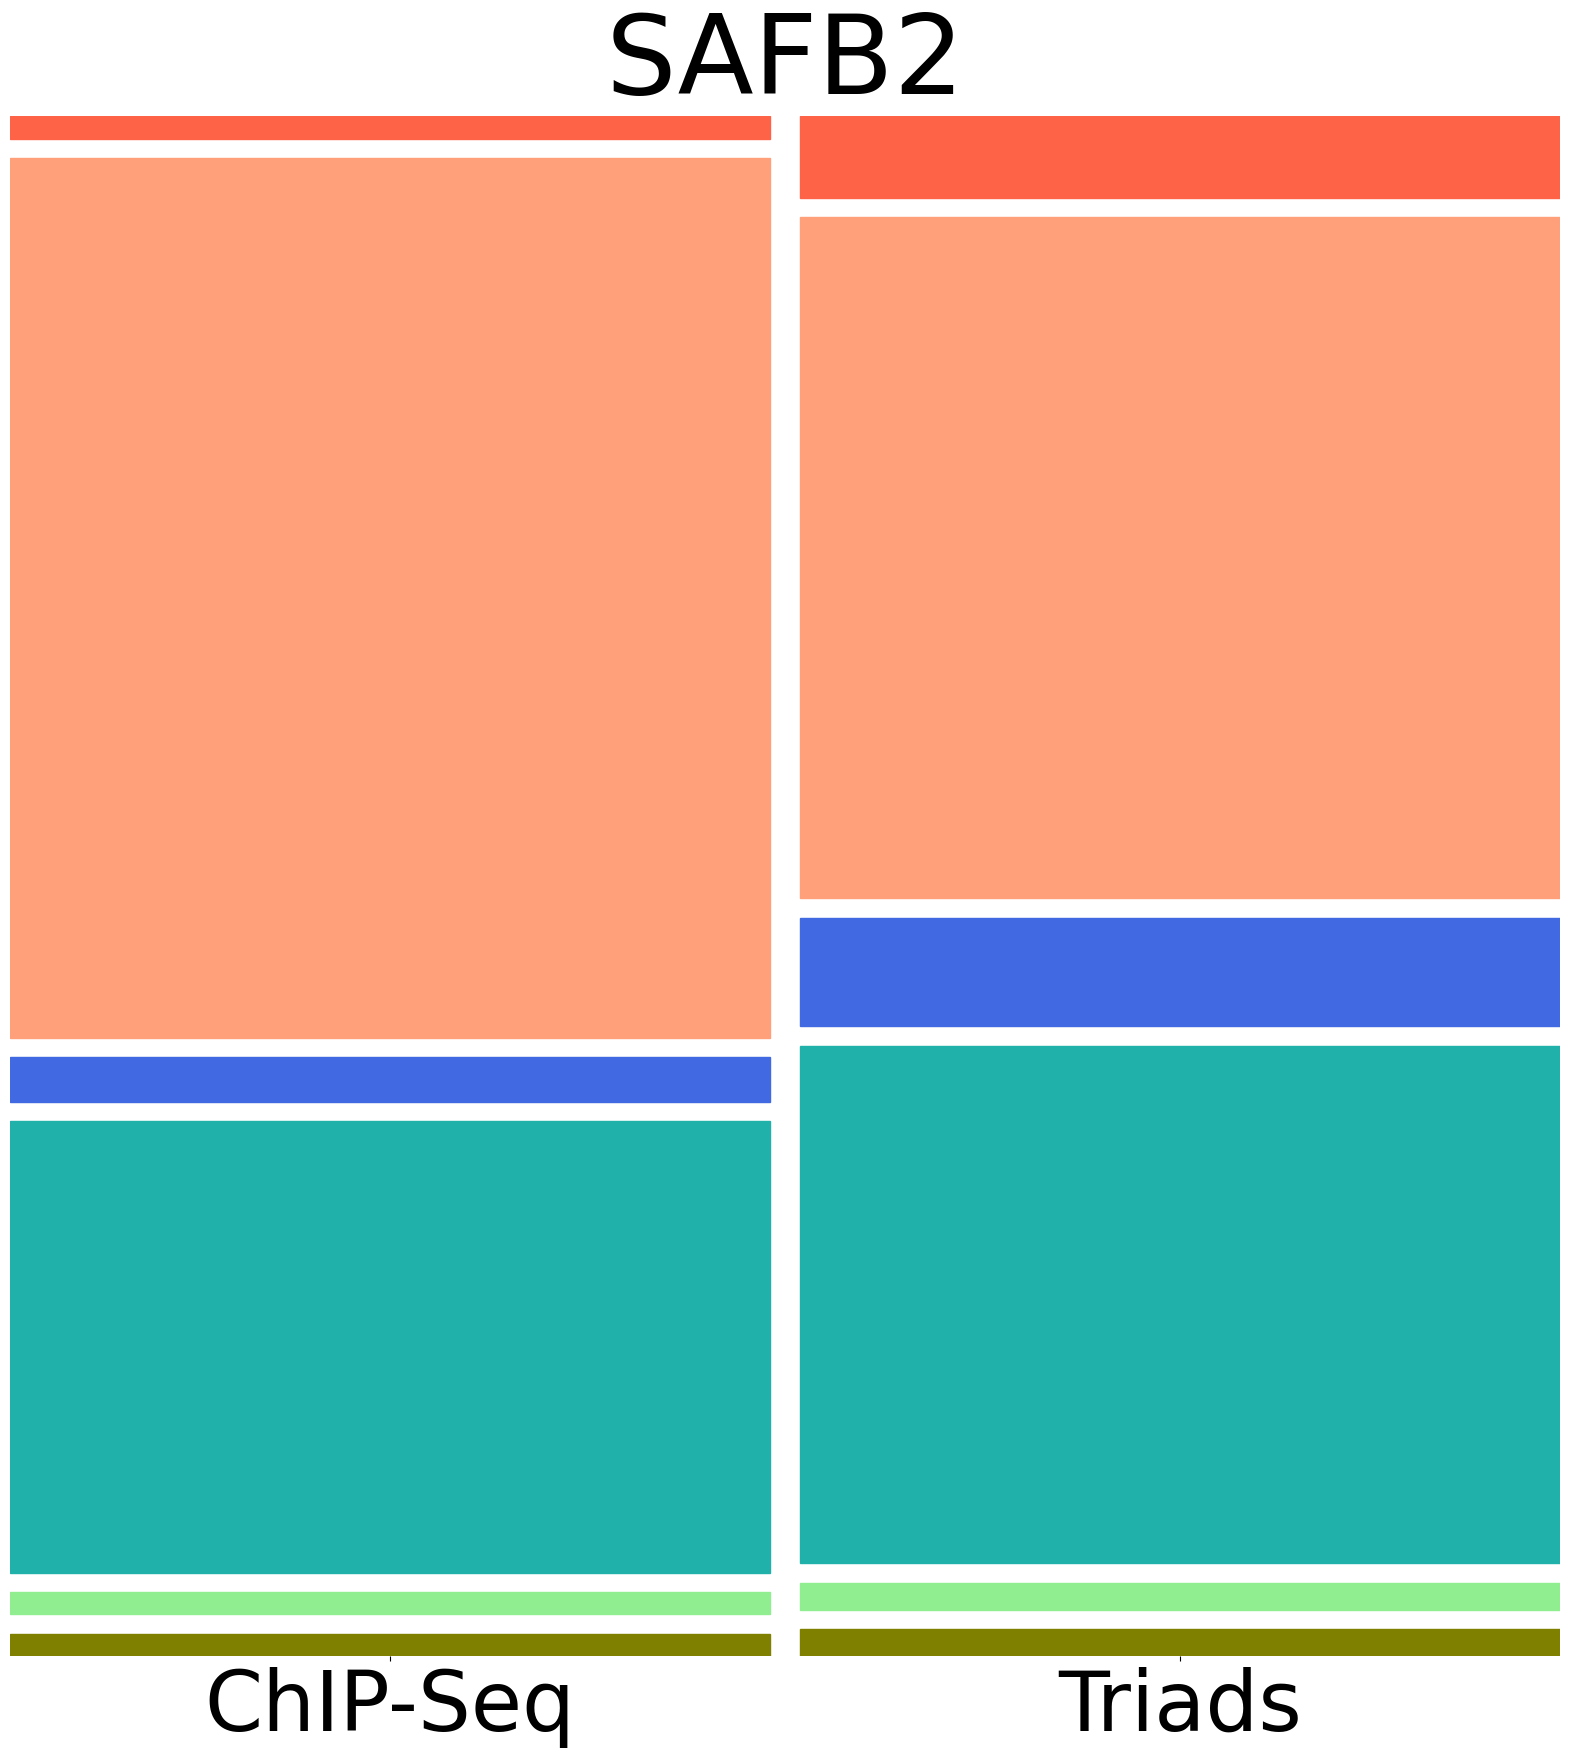

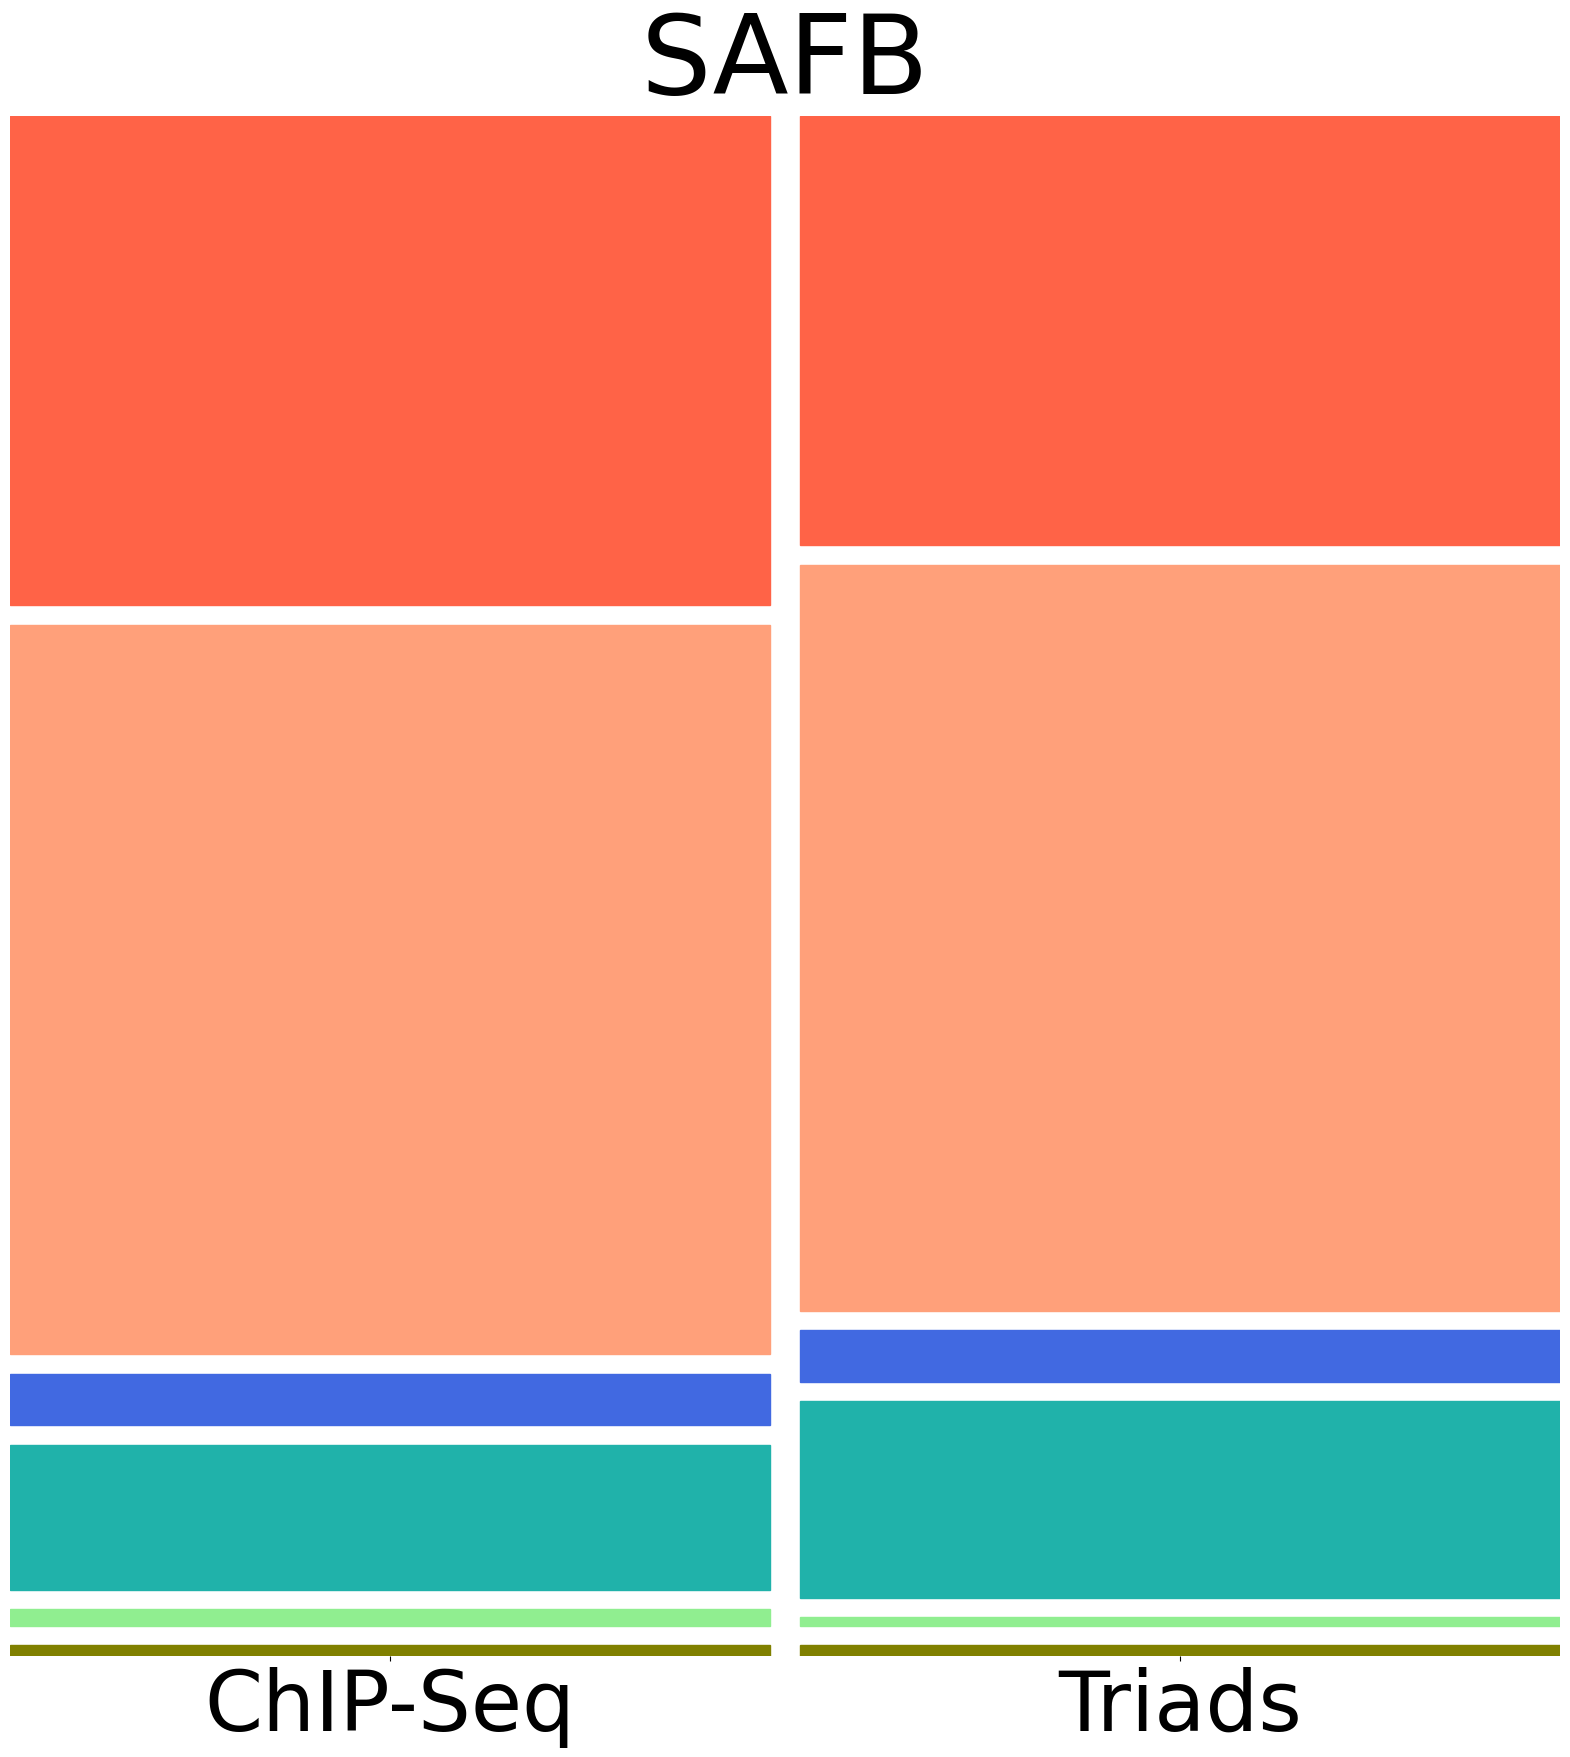

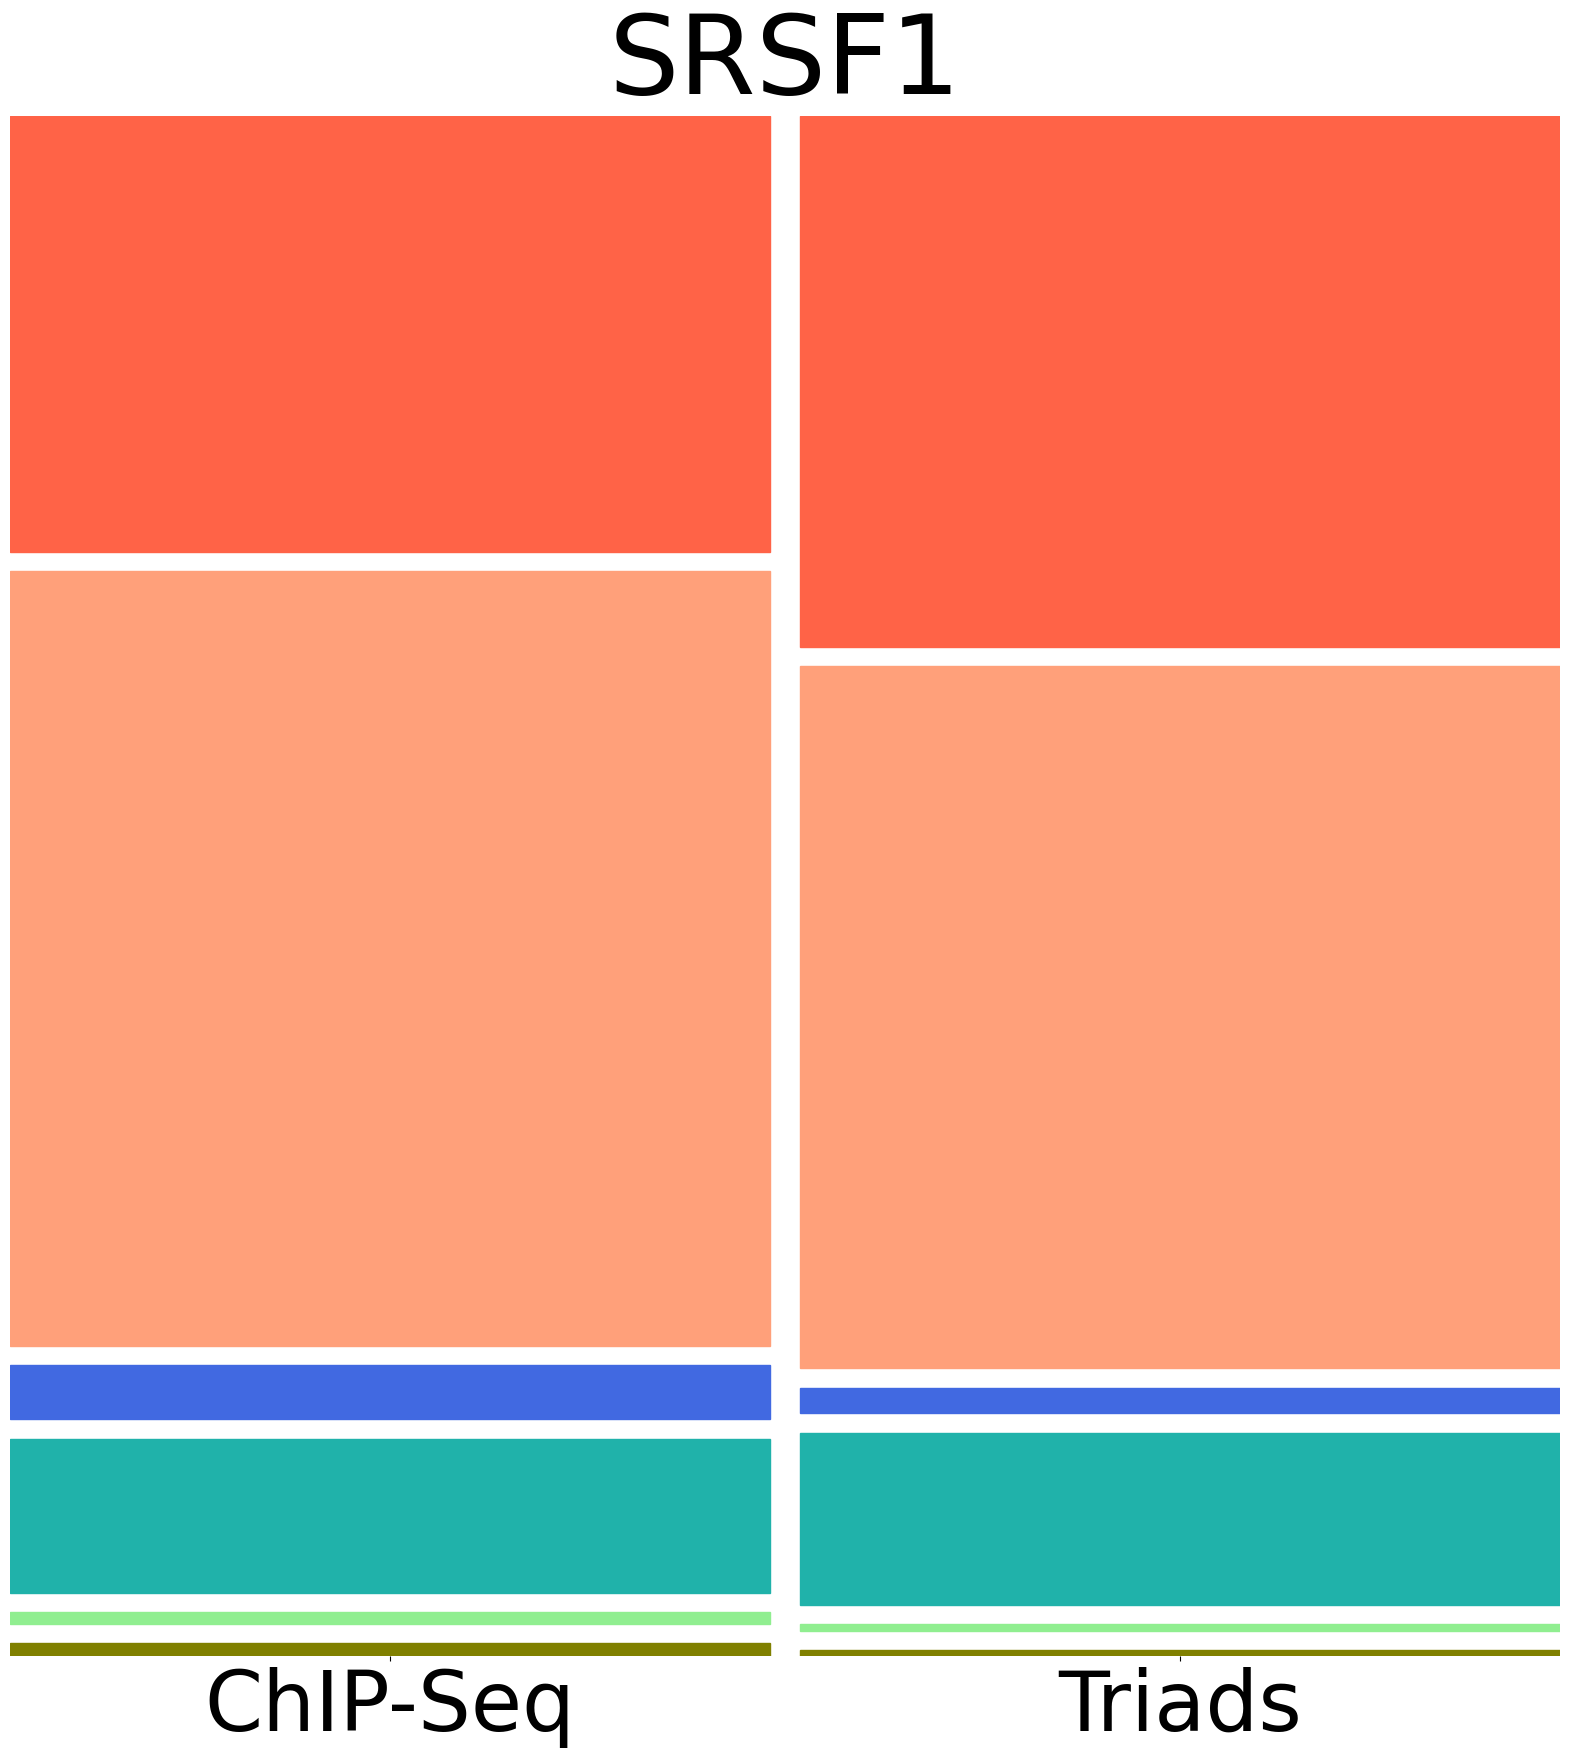

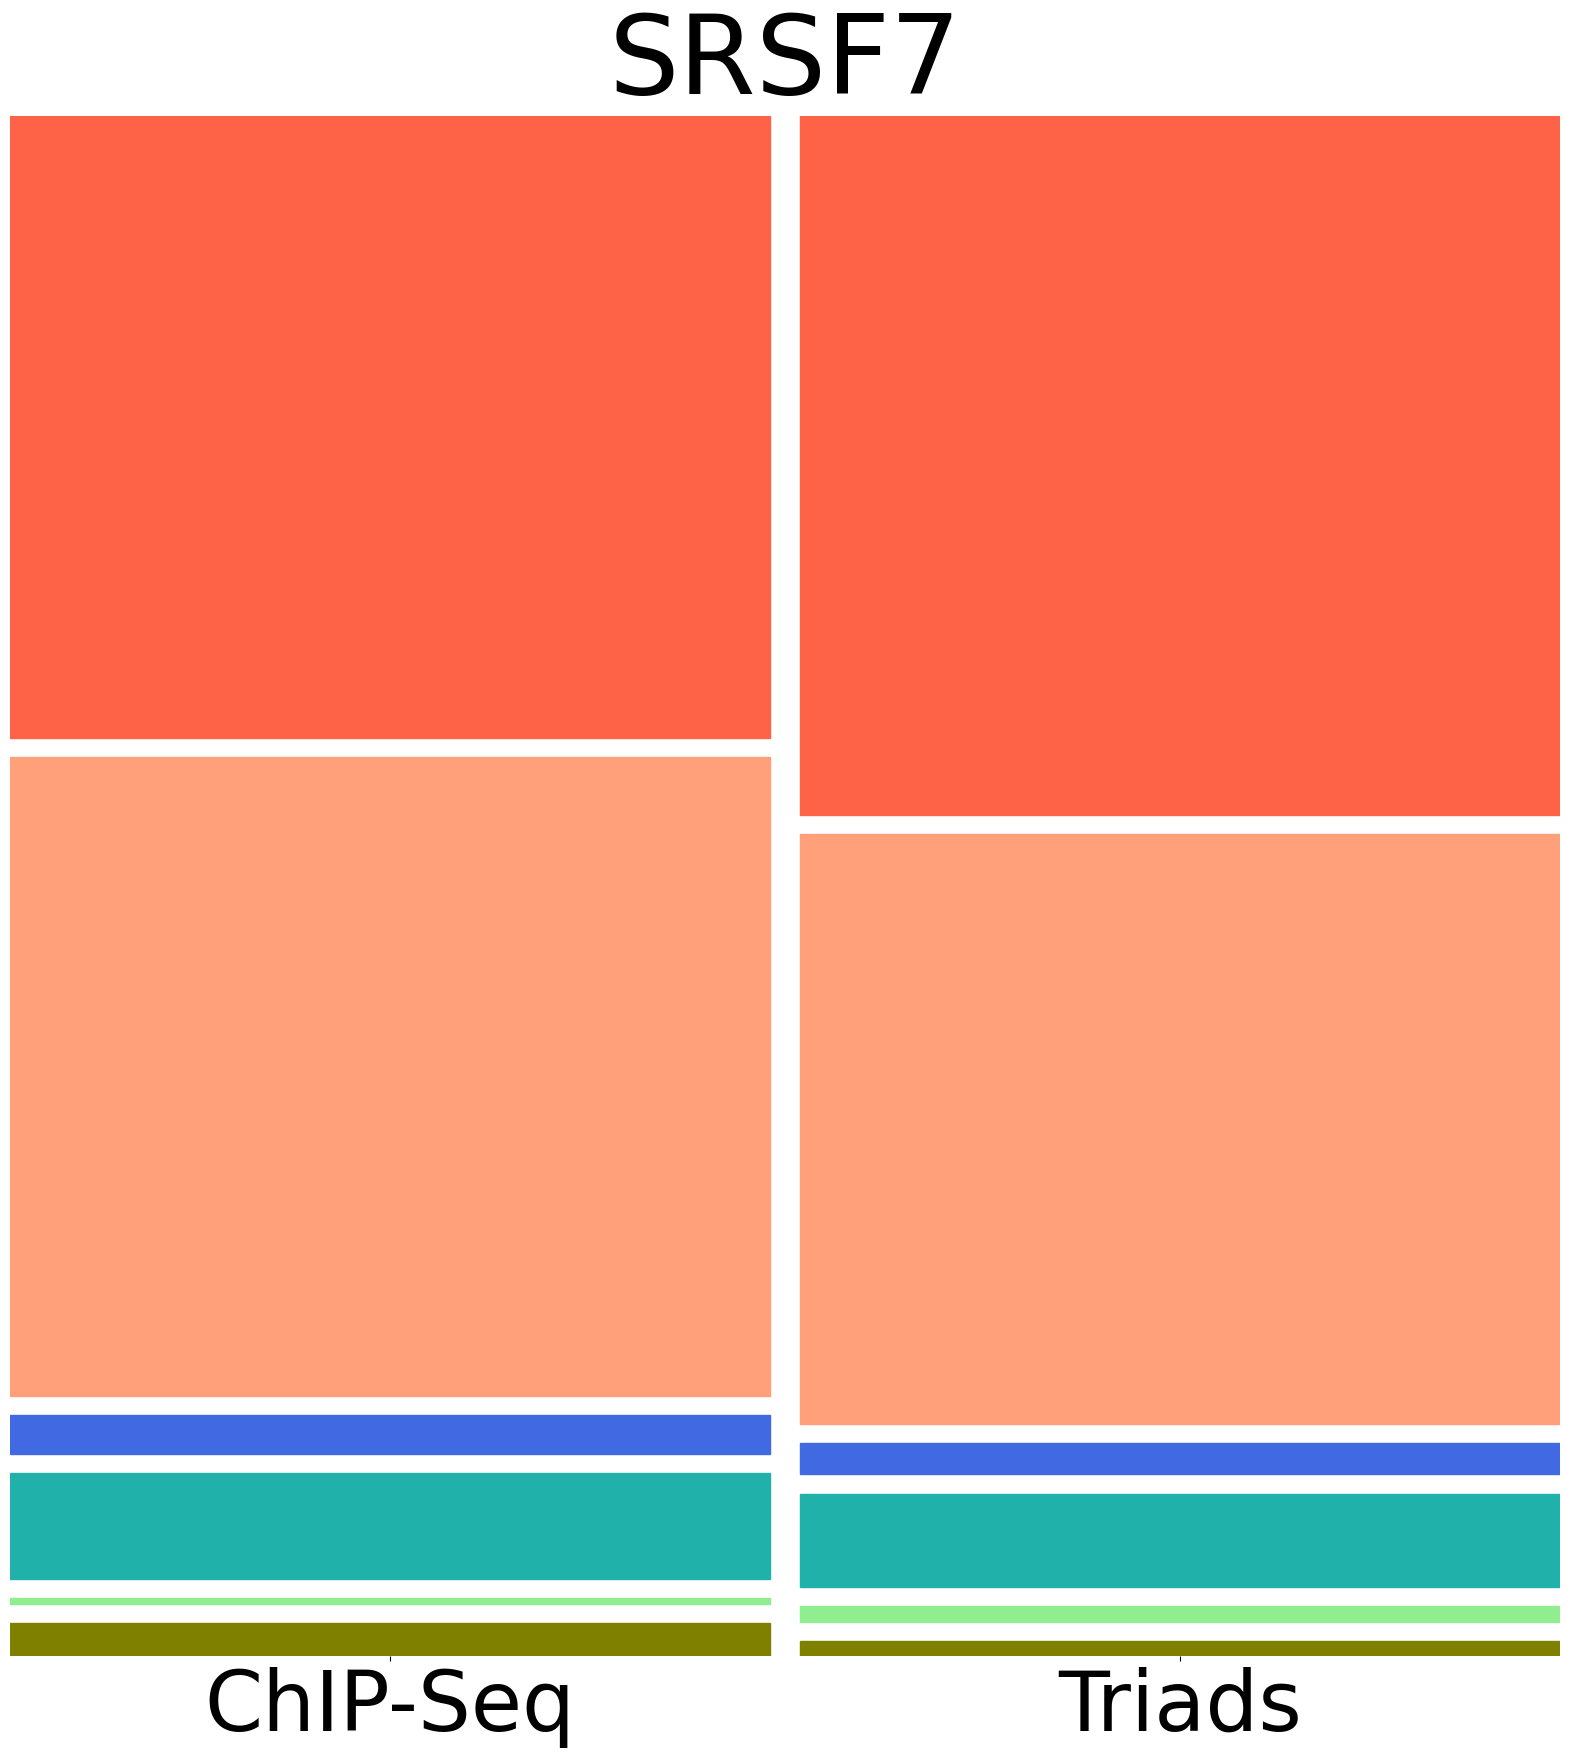

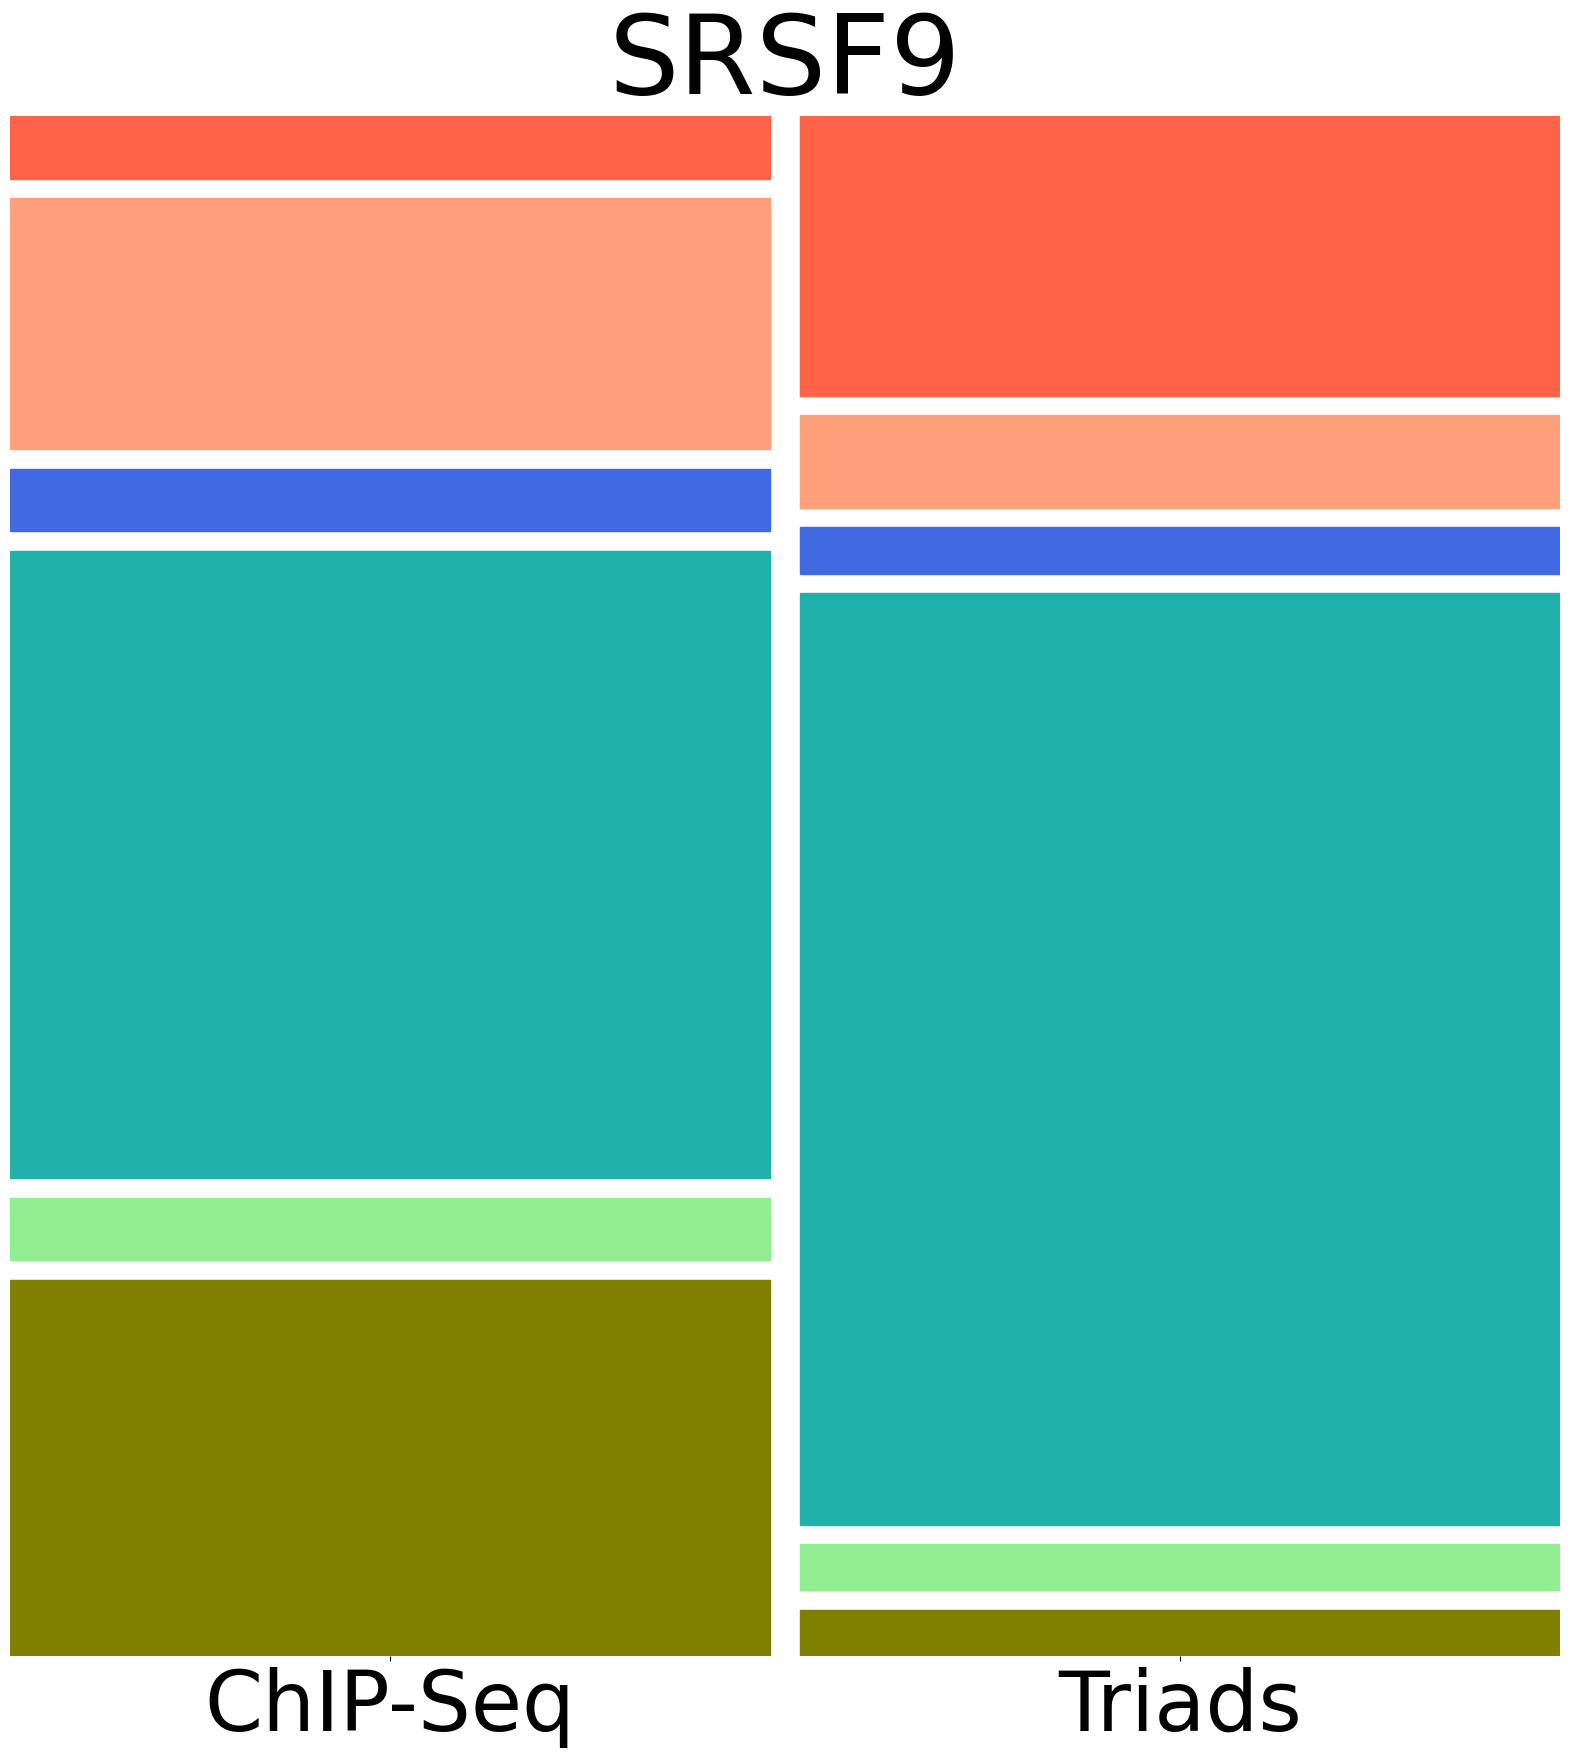

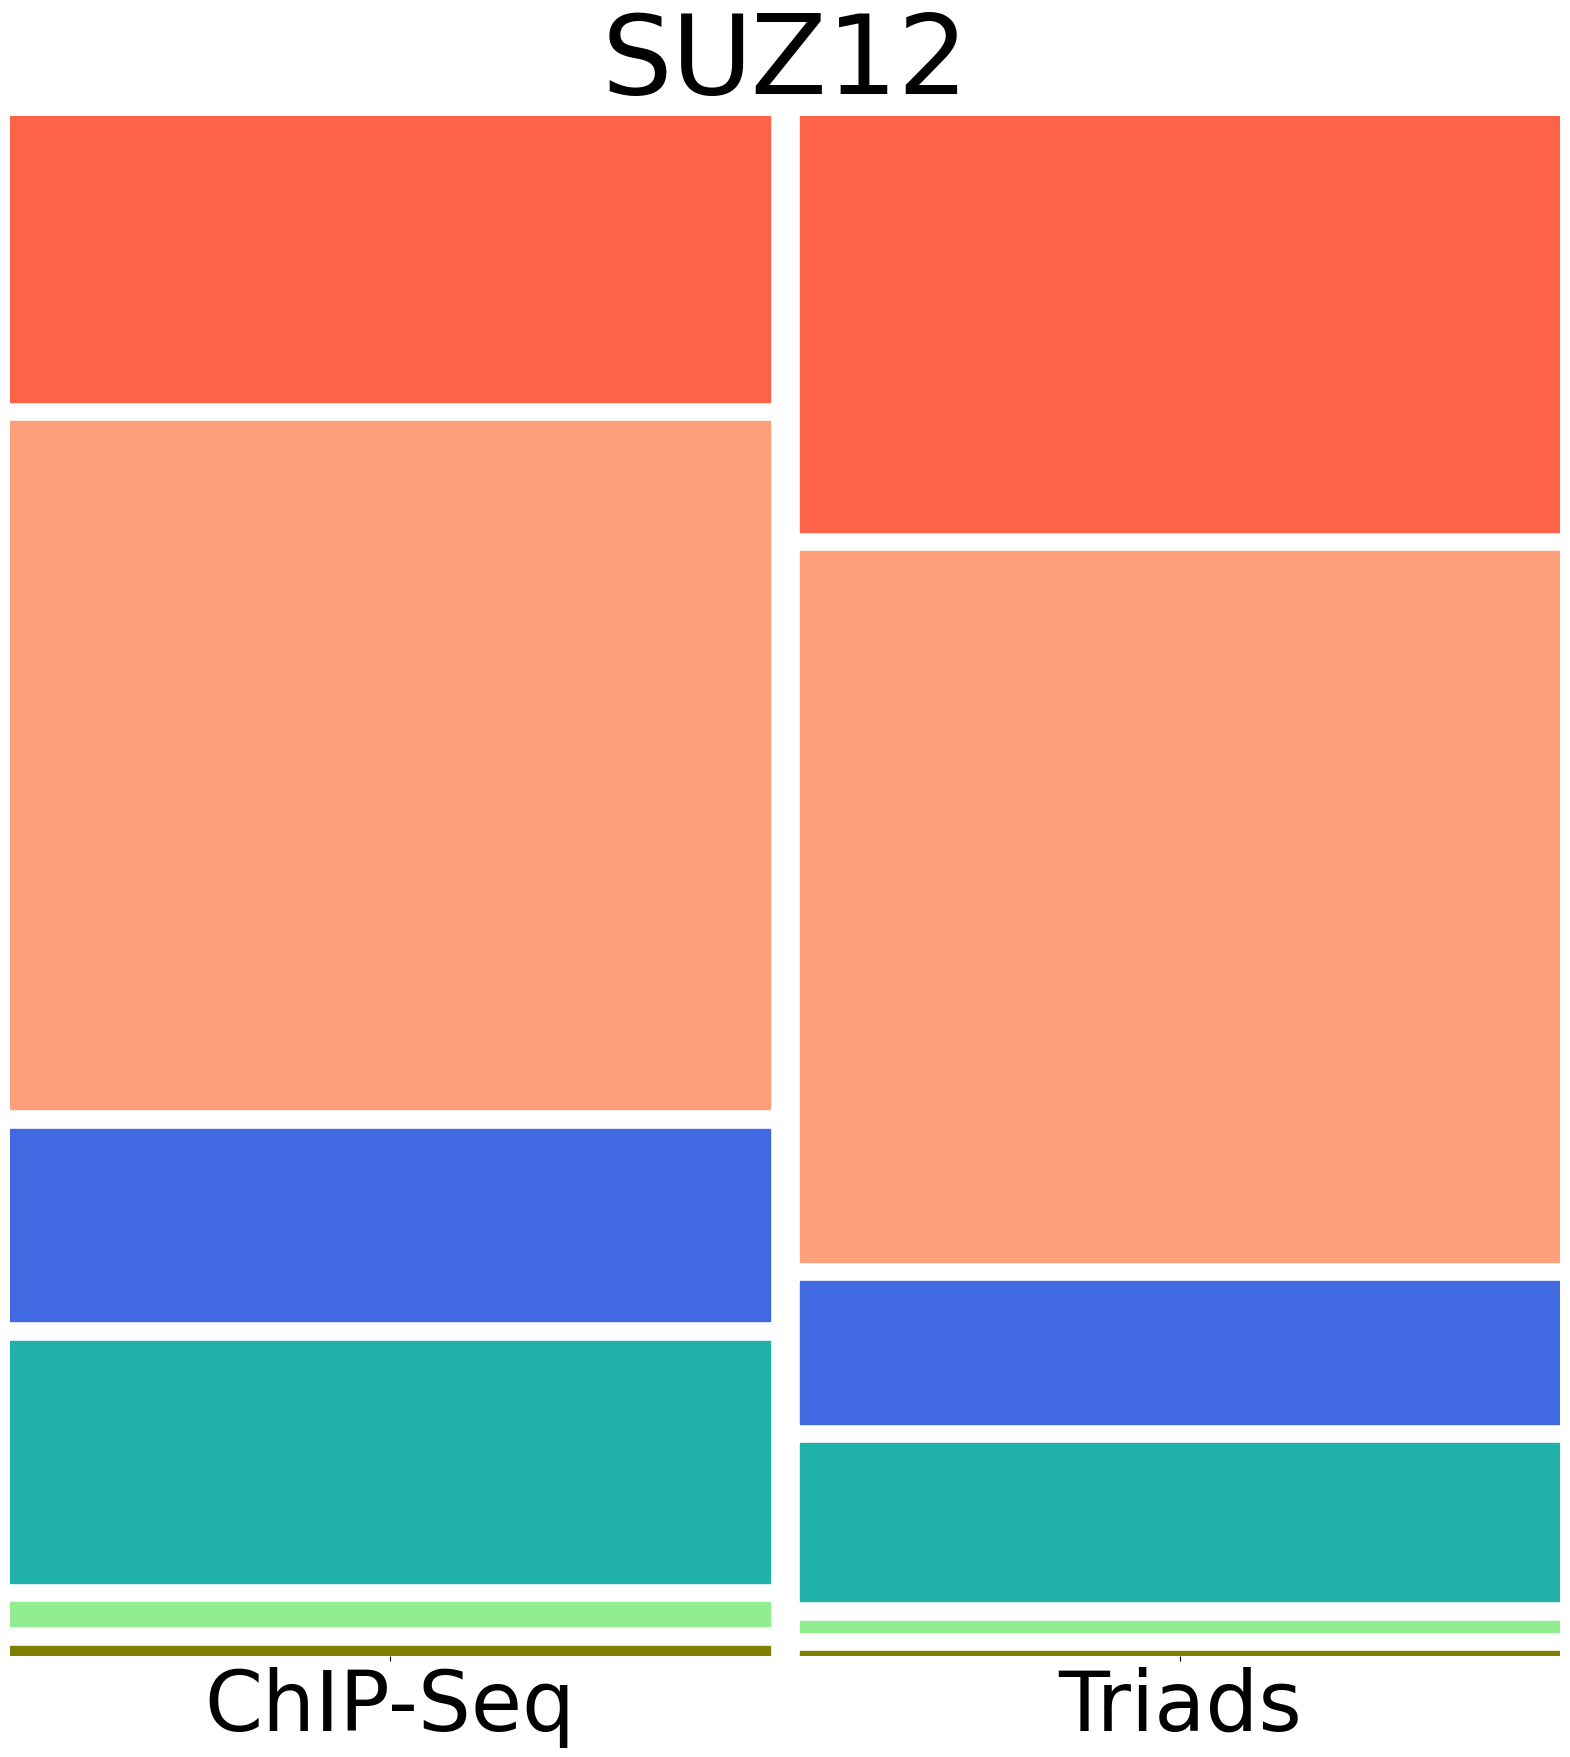

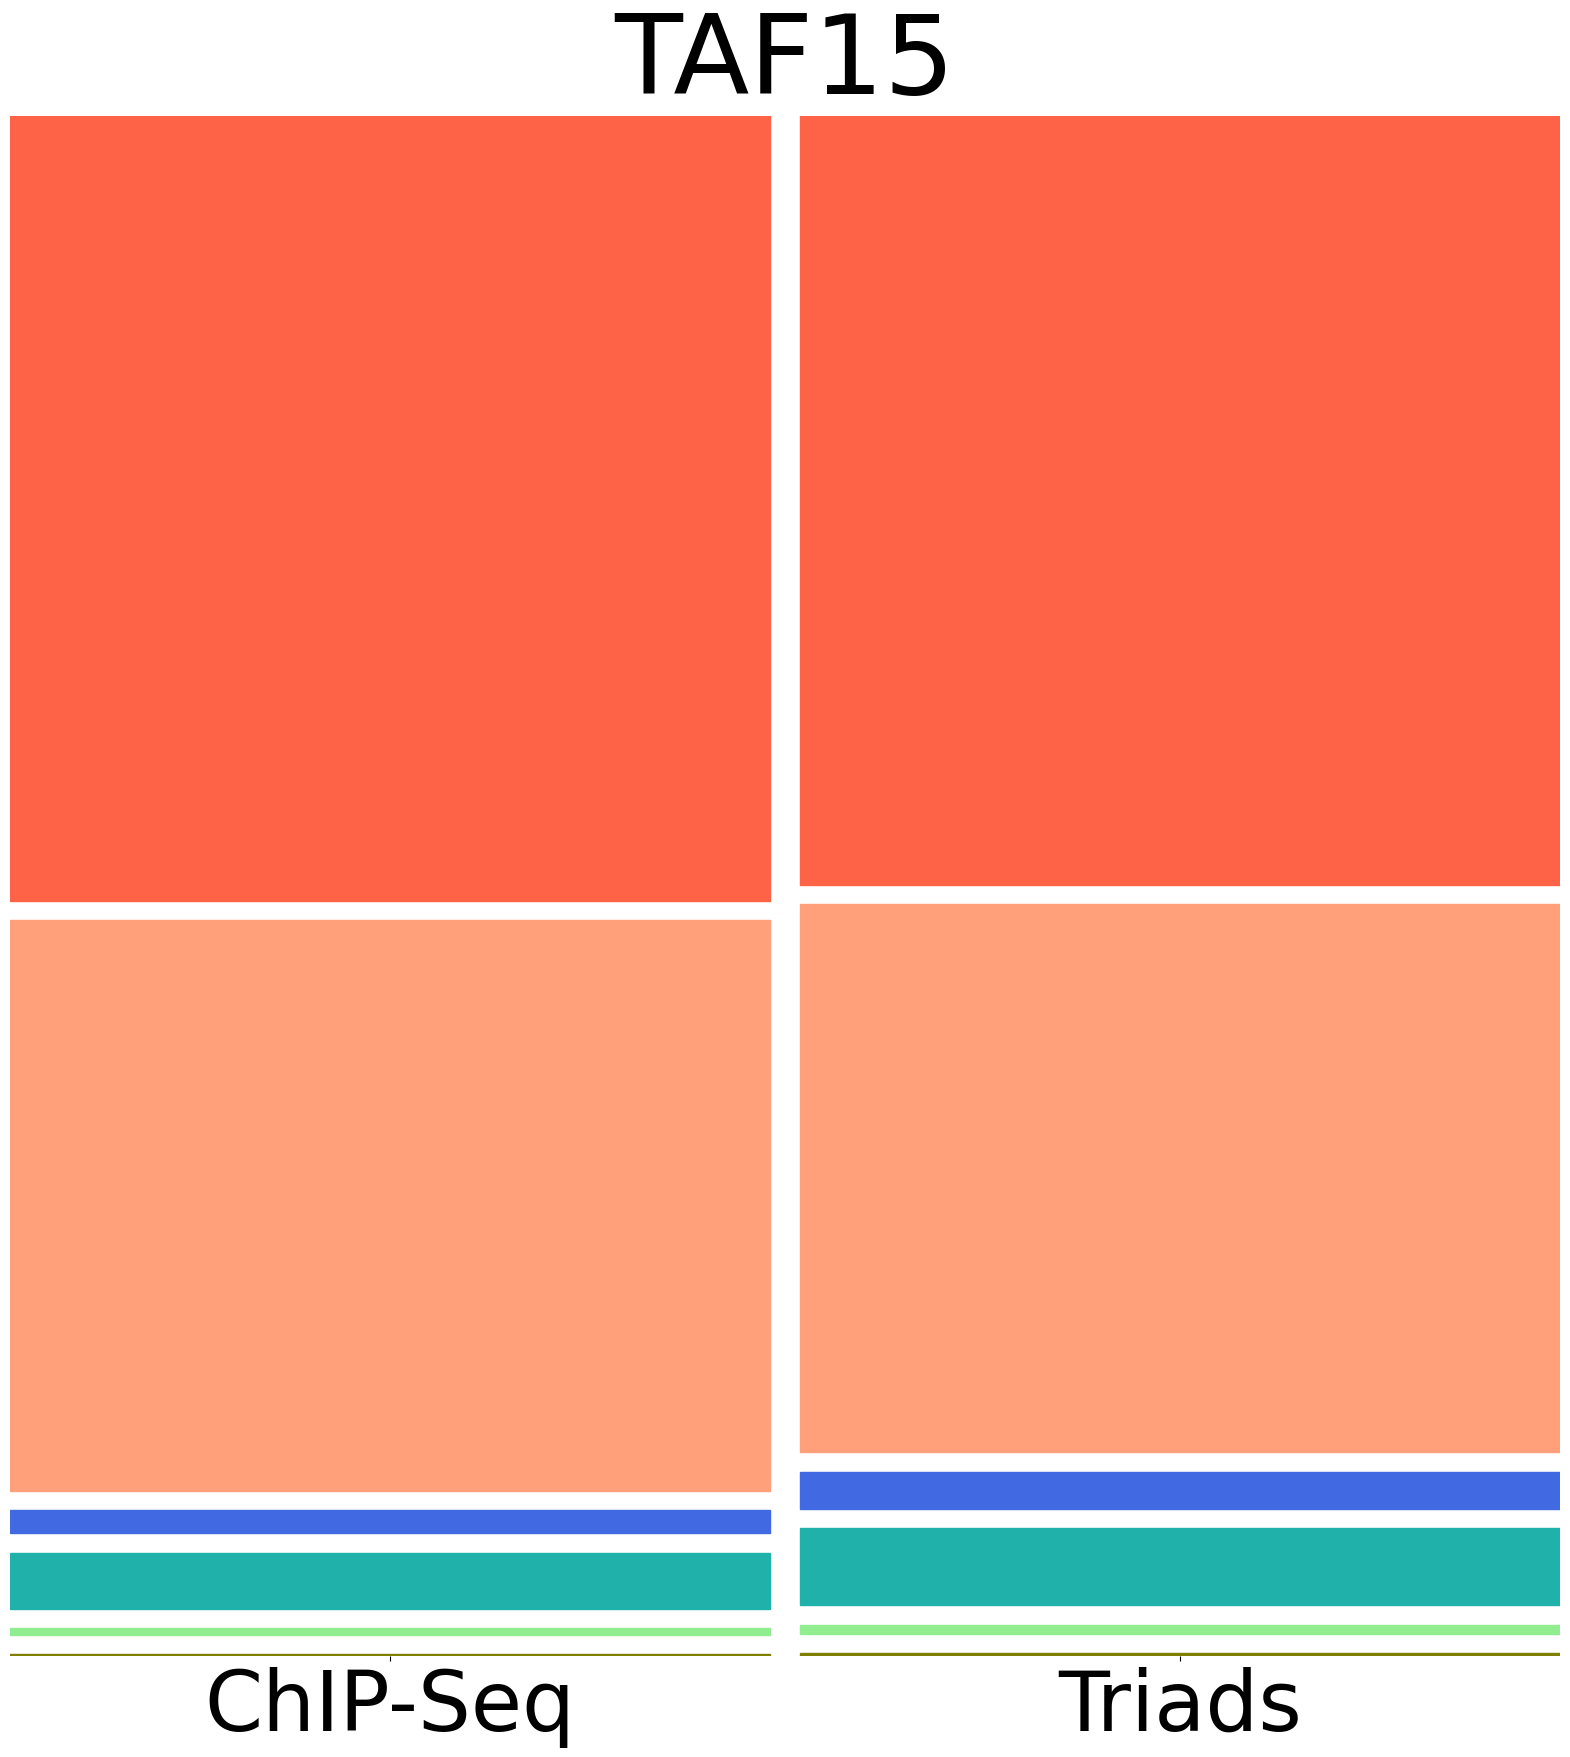

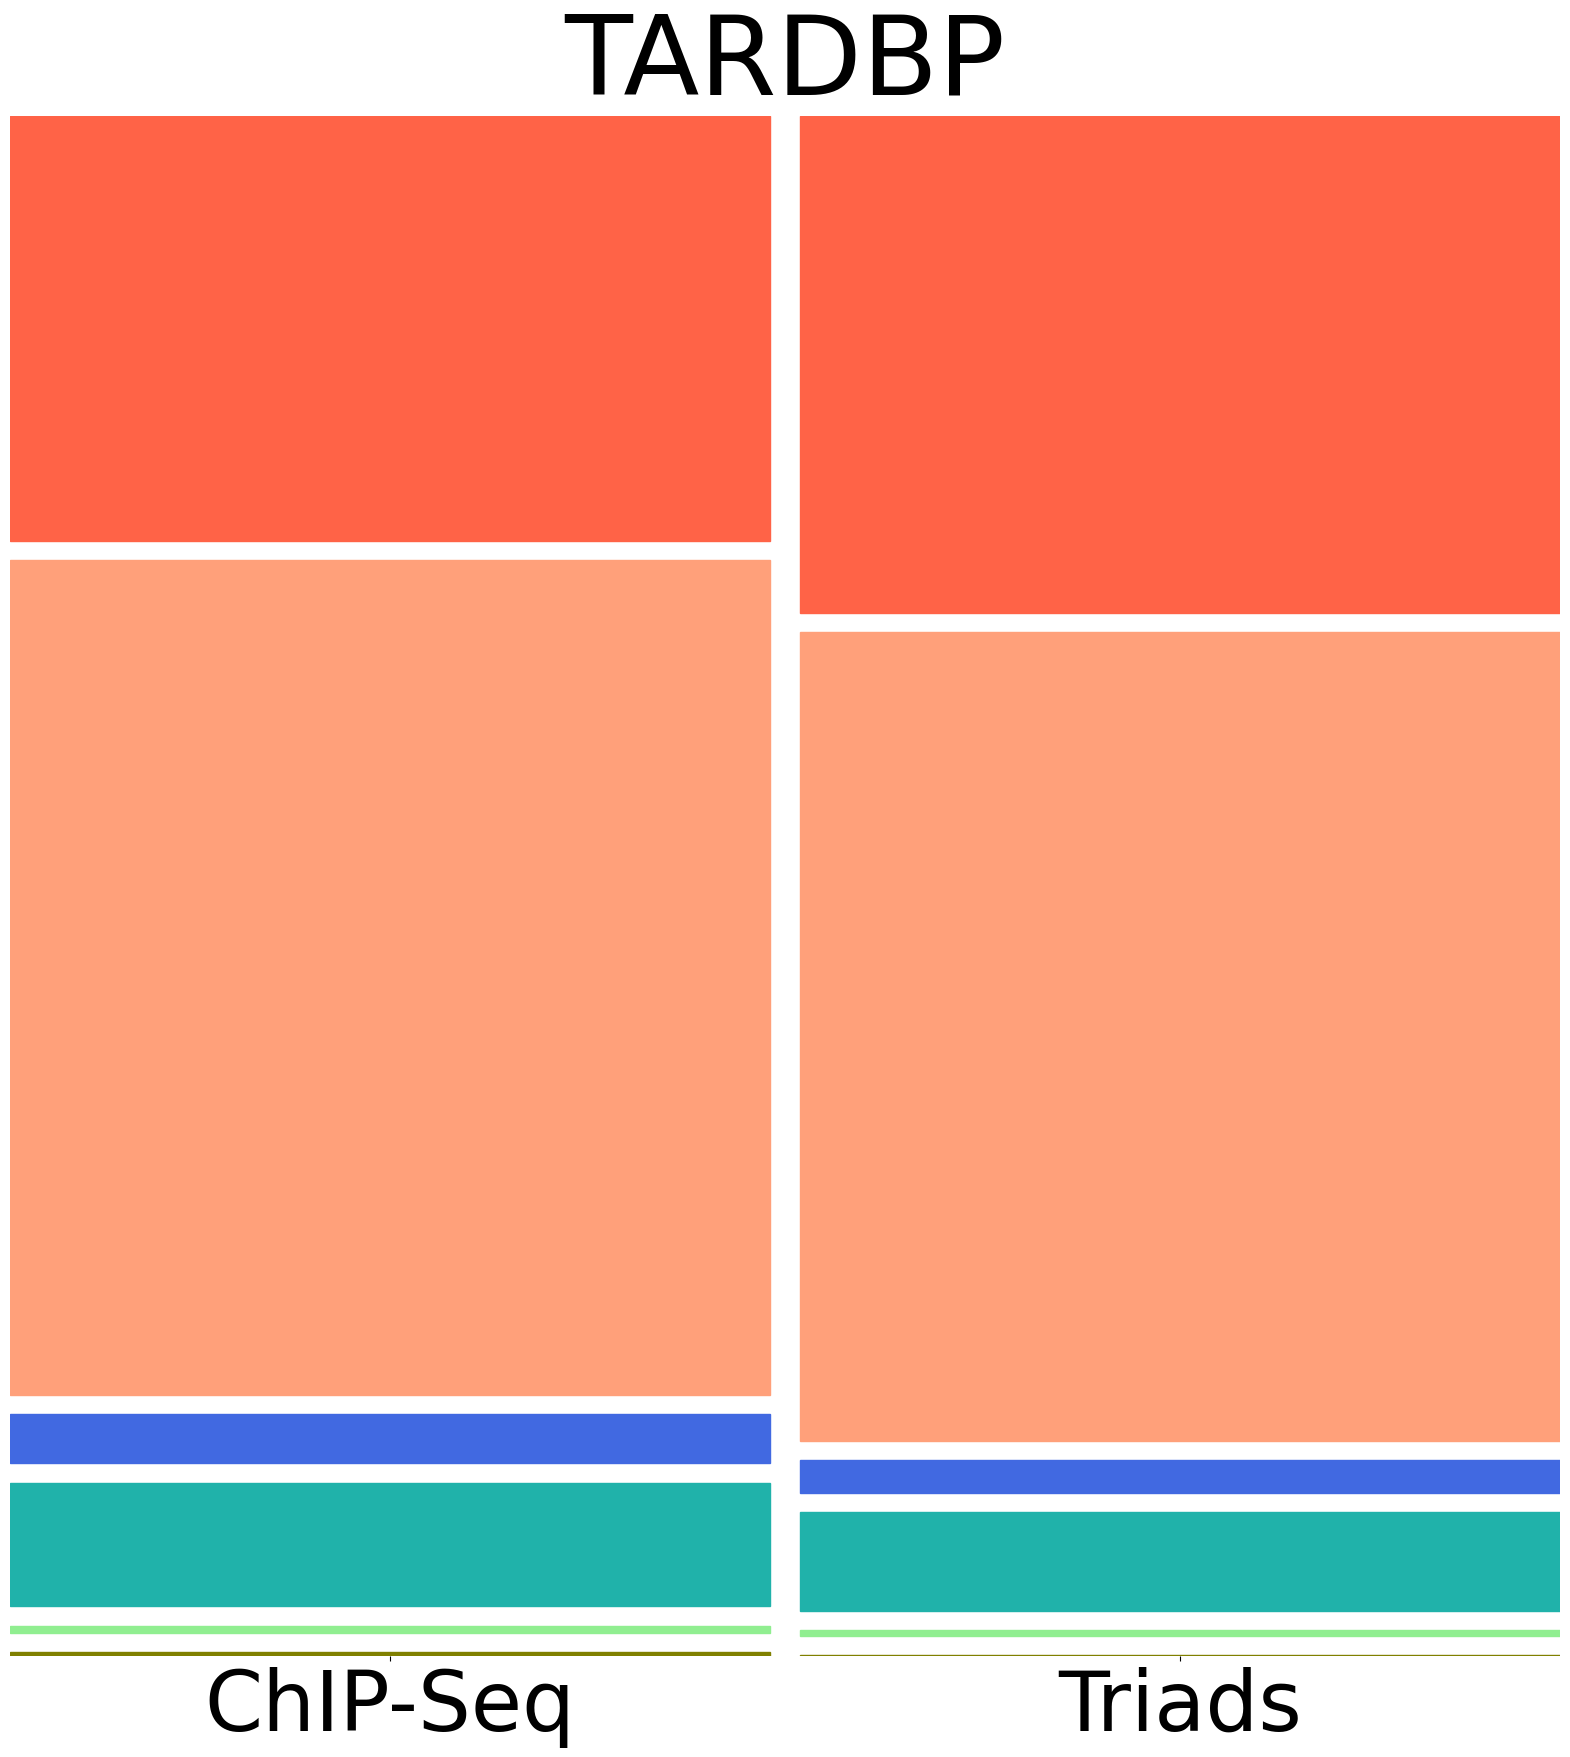

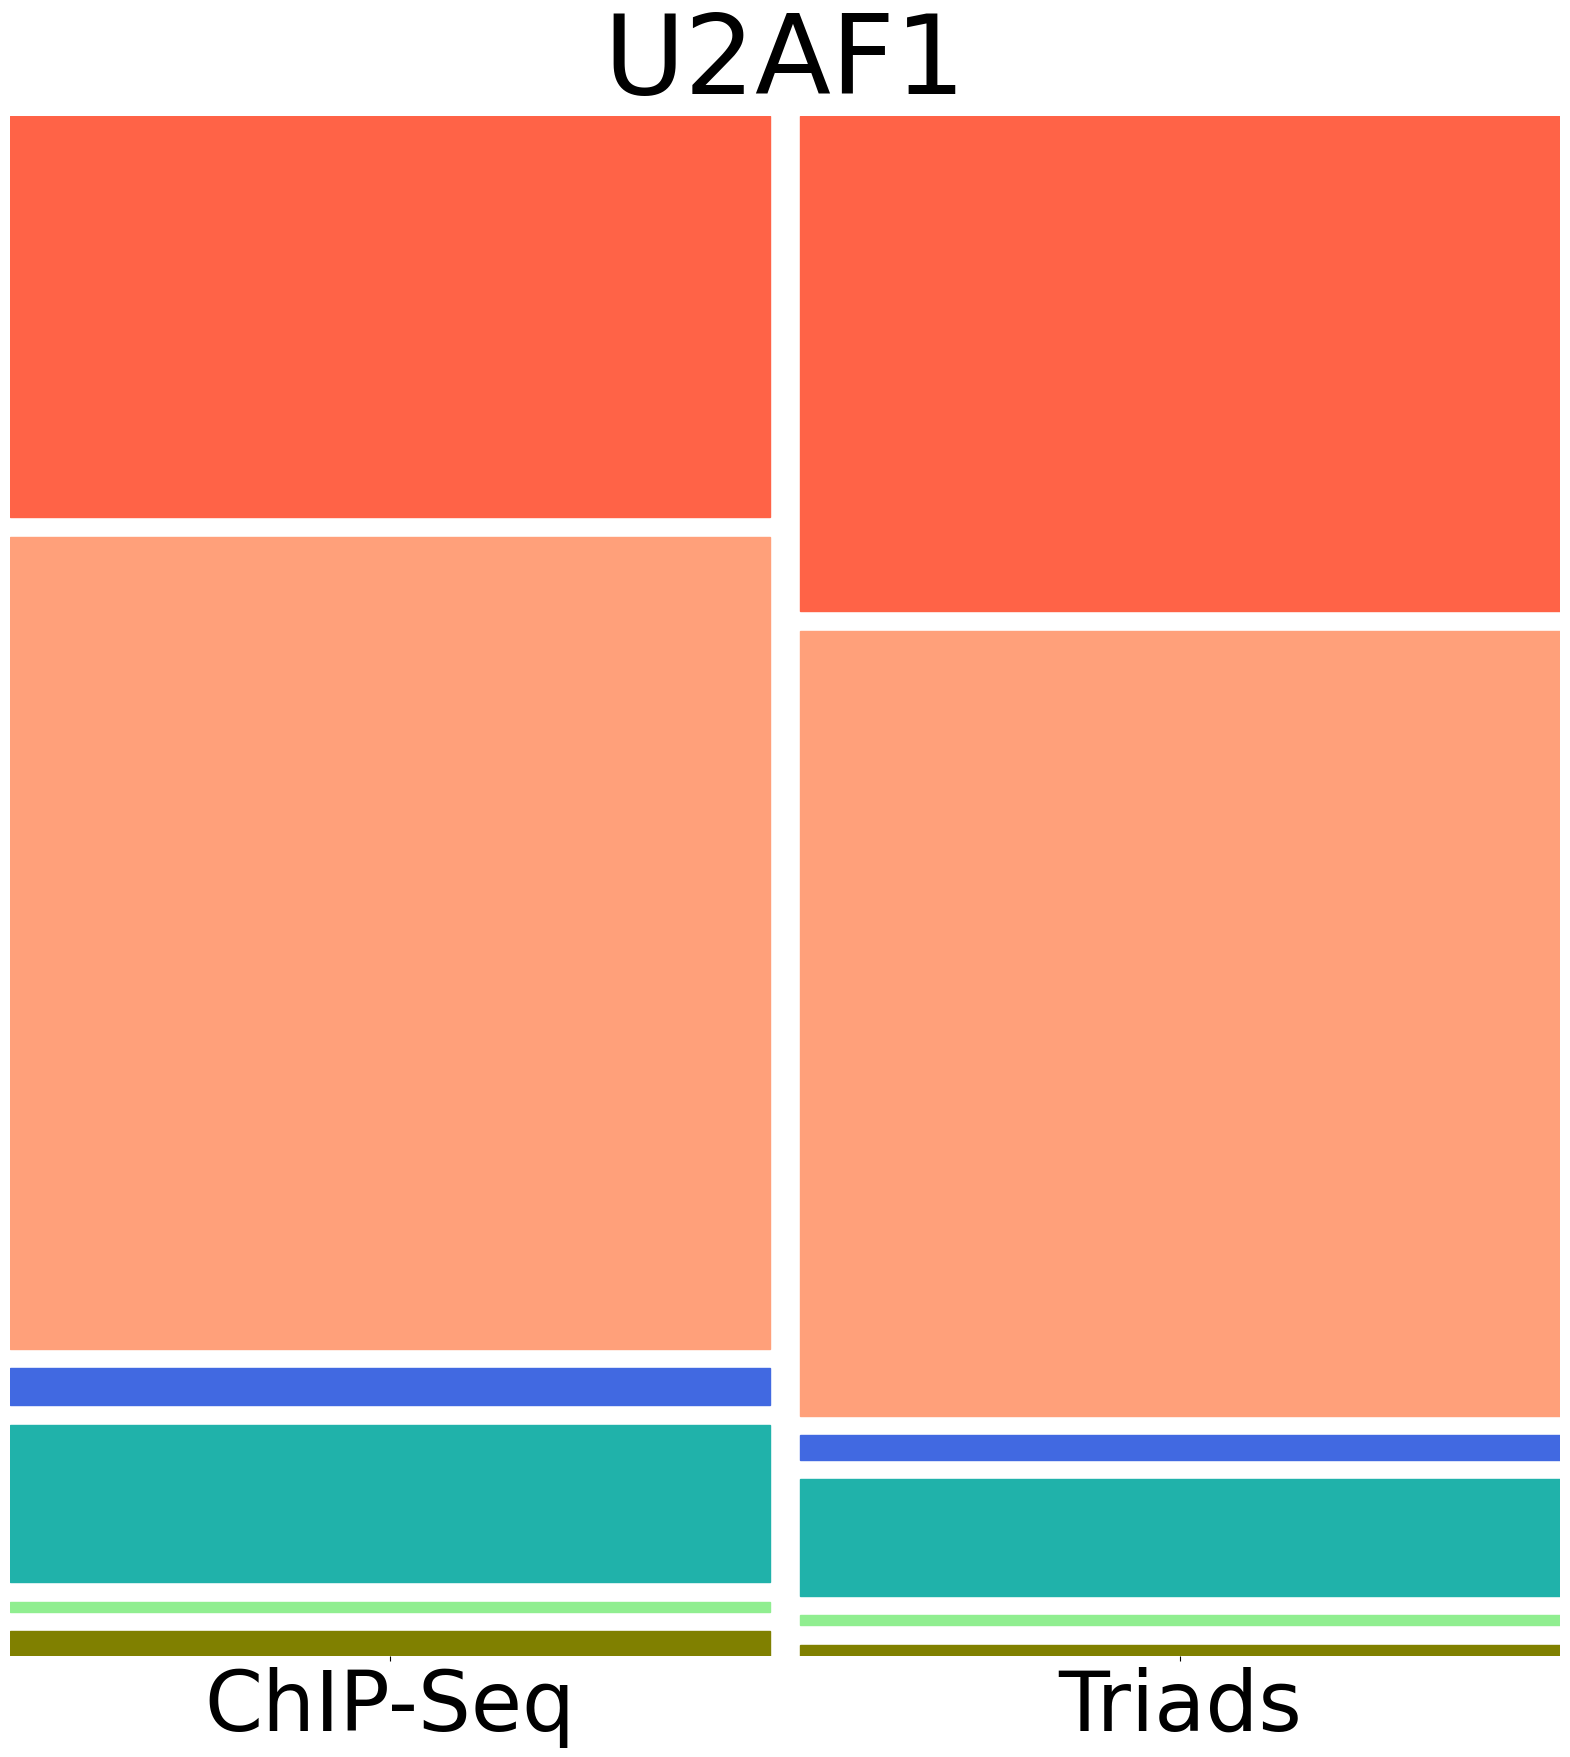

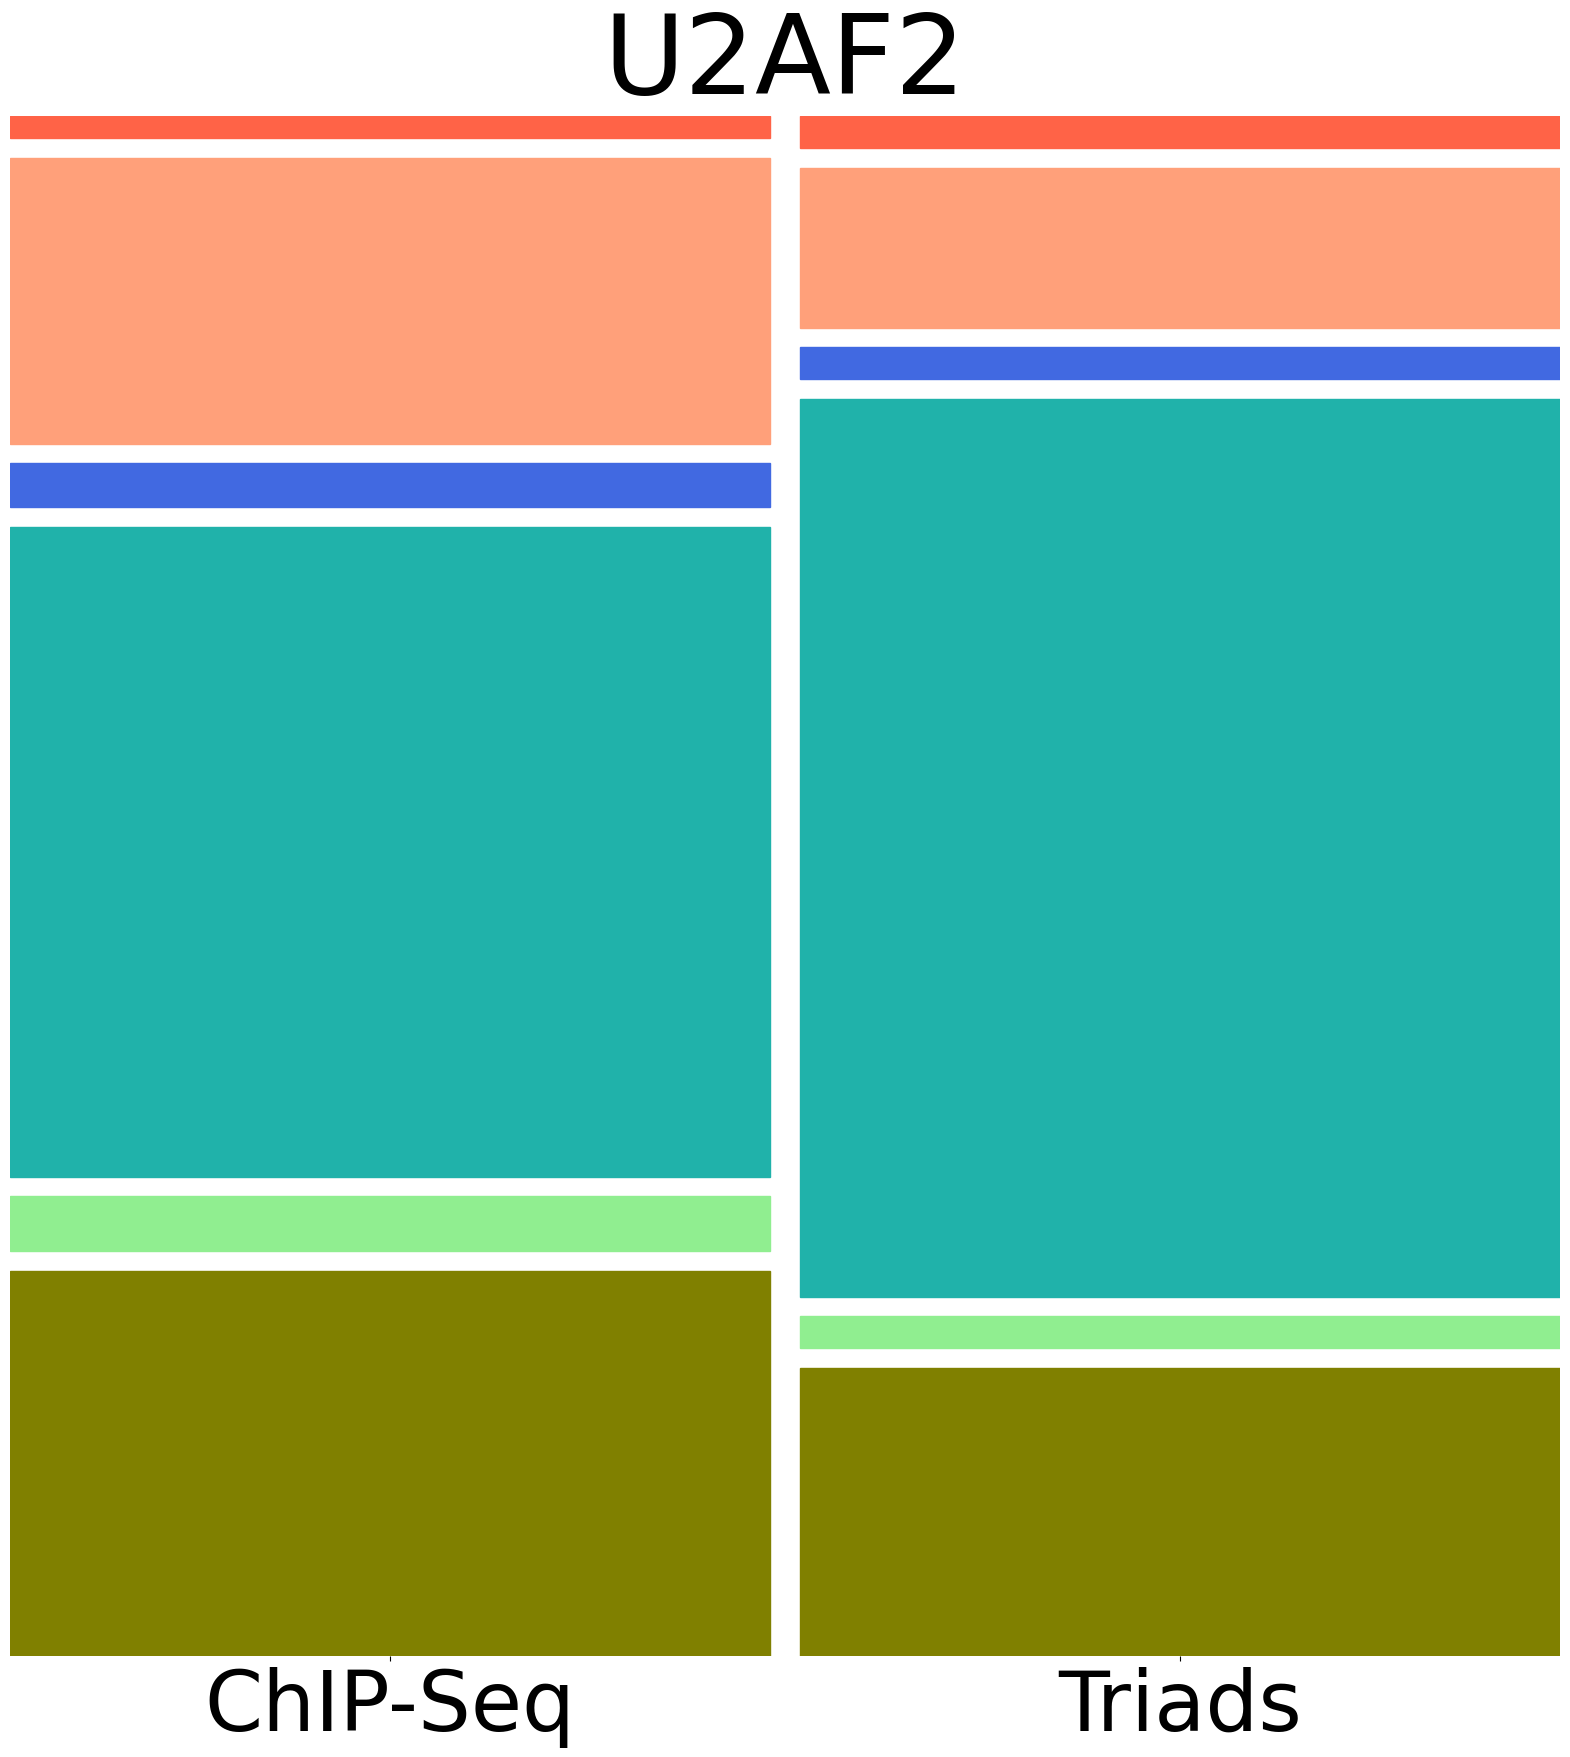

In [ ]:
plt.rcParams["xtick.labelbottom"] = True

for i in ["top", "bottom", "left", "right"]:
    plt.rcParams[f"axes.spines.{i}"] = False

plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20

plt.rcParams["figure.figsize"]=(20, 20)


for ind, PROTEIN in tqdm(enumerate(sorted(chip_df_norm.index.unique()))):
    prot = PROTEIN.split('_')[0]
    dt_new = {}
    tmp_dt = chip_df_norm[chip_df_norm.index.str.startswith(prot)].transpose().to_dict()
    triads_tmp = triad_df_norm[triad_df_norm.index.str.startswith(prot)].transpose().to_dict()
    for prot, states in sorted(list(tmp_dt.items())):
        for k, v in states.items():
            dt_new[("ChIP-Seq", k)] = v * 10_000_000_000
    for prot, states in sorted(list(triads_tmp.items())):
        for k, v in states.items():
            dt_new[("TRIAD", k)] = v * 10_000_000_000
    colors = {"A_compartment":"lightsalmon", "B_compartment":"royalblue", "Lamina":"olive", 
              "Lamina_Like":"lightgreen", "Near_Lm":"lightseagreen", "Speckle":"tomato"}
    props = lambda state : {'color' : colors[state[1]]}
    fig, ax = plt.subplots(figsize=(20,20))
    p = mosaic(dt_new, properties=props, label_rotation=0, gap=0.02, labelizer=lambda k : "", ax=ax,
               index=[2,8,3,9,4,10,1,7,0,6,5,11])
    ax.set_yticks([])
    ax.set_xticklabels(["ChIP-Seq", "Triads"], fontsize=60)
    plt.title(f"{PROTEIN.split('_')[0]}", fontsize=80)
    plt.savefig(f"pictures_dens/{PROTEIN.split('_')[0]}.svg", transparent=True)

In [11]:
plt.rcParams["xtick.labelbottom"] = True


for i in ["top", "bottom", "left", "right"]:
    plt.rcParams[f"axes.spines.{i}"] = False

plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20

plt.rcParams["figure.figsize"]=(20, 20)


for ind, PROTEIN in tqdm(enumerate(sorted(chip_df.index.unique()))):
    prot = PROTEIN.split('_')[0]
    dt_new = {}
    tmp_dt = chip_df[chip_df.index.str.startswith(prot)].transpose().to_dict()
    triads_tmp = triad[triad.index.str.startswith(prot)].transpose().to_dict()
    for prot, states in sorted(list(tmp_dt.items())):
        for k, v in states.items():
            dt_new[("ChIP-Seq", k)] = v * 10_000_000
    for prot, states in sorted(list(triads_tmp.items())):
        for k, v in states.items():
            dt_new[("TRIAD", k)] = v * 10_000_000
    colors = {"A_compartment":"lightsalmon", "B_compartment":"royalblue", "Lamina":"olive", 
              "Lamina_Like":"lightgreen", "Near_Lm":"lightseagreen", "Speckle":"tomato"}
    props = lambda state : {'color' : colors[state[1]]}
    fig, ax = plt.subplots(figsize=(20,20))
    p = mosaic(dt_new, properties=props, label_rotation=0, gap=0.02, labelizer=lambda k : "", ax=ax,
               index=[2,8,3,9,4,10,1,7,0,6,5,11])
    ax.set_yticks([])
    ax.set_xticklabels(["ChIP-Seq", "Triads"], fontsize=60)
    plt.title(f"{PROTEIN.split('_')[0]}", fontsize=80)
    plt.savefig(f"pictures/{PROTEIN.split('_')[0]}.svg", transparent=True)

0it [00:00, ?it/s]


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fb8d0248a60> (for post_execute):



KeyboardInterrupt



# group heatmap

In [15]:
groups = {
    "Chromatine\nRemodelling": ["CBP", "CBX3", "CHD1", "CHD4", "CHD7", "CTCF", "DNMT1", "EZH2", 
                               "HDAC1", "HLTF", "LSD1", "MORC2", "PCAF", "PHF8", 
                               "RBBP5", "SAFB", "SAFB2", "SUZ12", "WDR5"],
    "RNA\nProcessing/Export": ["FUS", "hnRNPC", "hnRNPH", "hnRNPL", "hnRNPUL1", "ILF3", "KHSRP", "NONO", 
                                   "NUP98", "PTBP1", "RBFOX2", "RBM15", "RBM22", "SRSF1", "SRSF7", 
                                   "SRSF9", "TARDBP", "U2AF1", "U2AF2", "ZC3H11A"],
    "Transcriptional\nRegulation": ["EWSR1", "GTF2F1", "hnRNPK", "LARP7", "PCBP1", 
                              "TAF15", "YBX3", "ZC3H8"]
}
# added FUS hnRNPUL1 U2AF2 and NONO to third group

<Axes: >

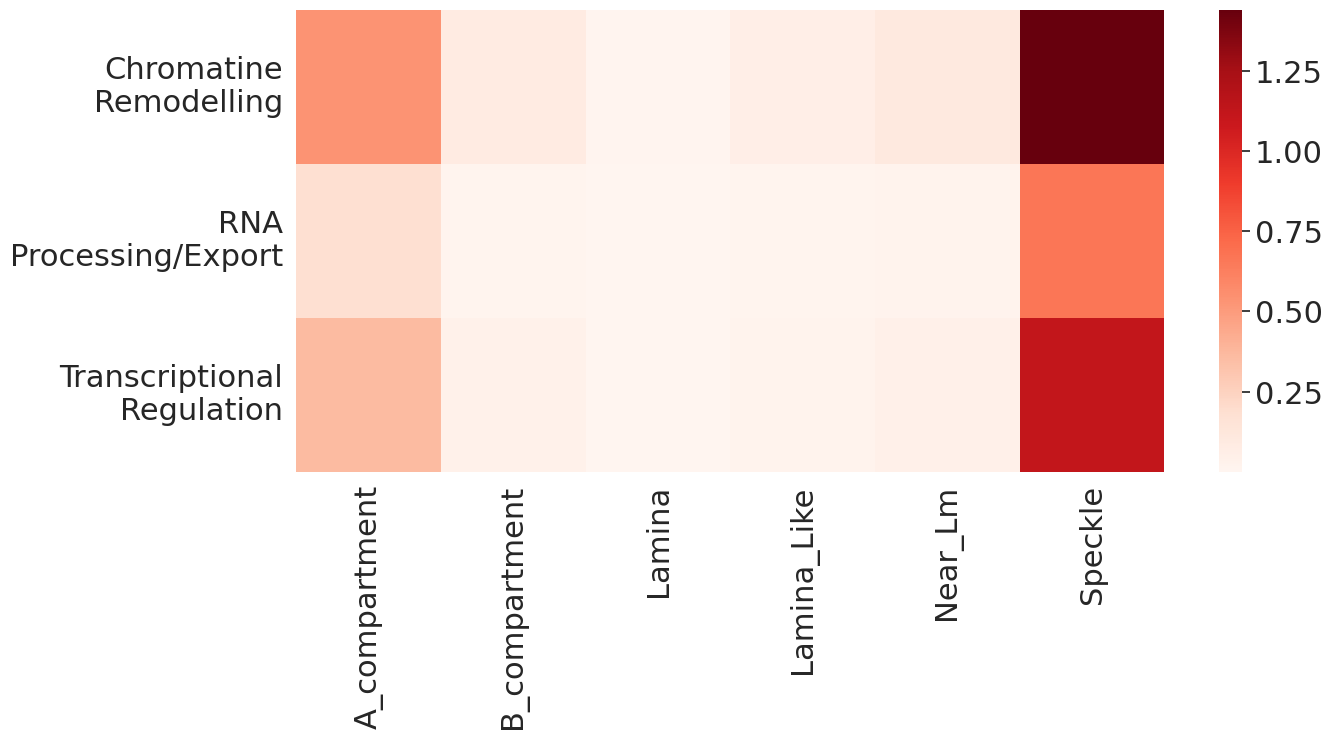

In [16]:
plt.rcParams["figure.figsize"]=(14, 6)
group_to_state = {group : [] for group in groups}
for rw in triad_df_norm.iterrows():
    for key in groups:
        if rw[0].split('_')[0] in groups[key]:
            group_to_state[key].append(rw[1])
            
for k, v in group_to_state.items():
    group_to_state[k] = pd.concat(v, axis=1).transpose().mean(axis=0)

res_df = pd.DataFrame.from_dict(group_to_state).transpose()
sns.heatmap(res_df, cmap="Reds")

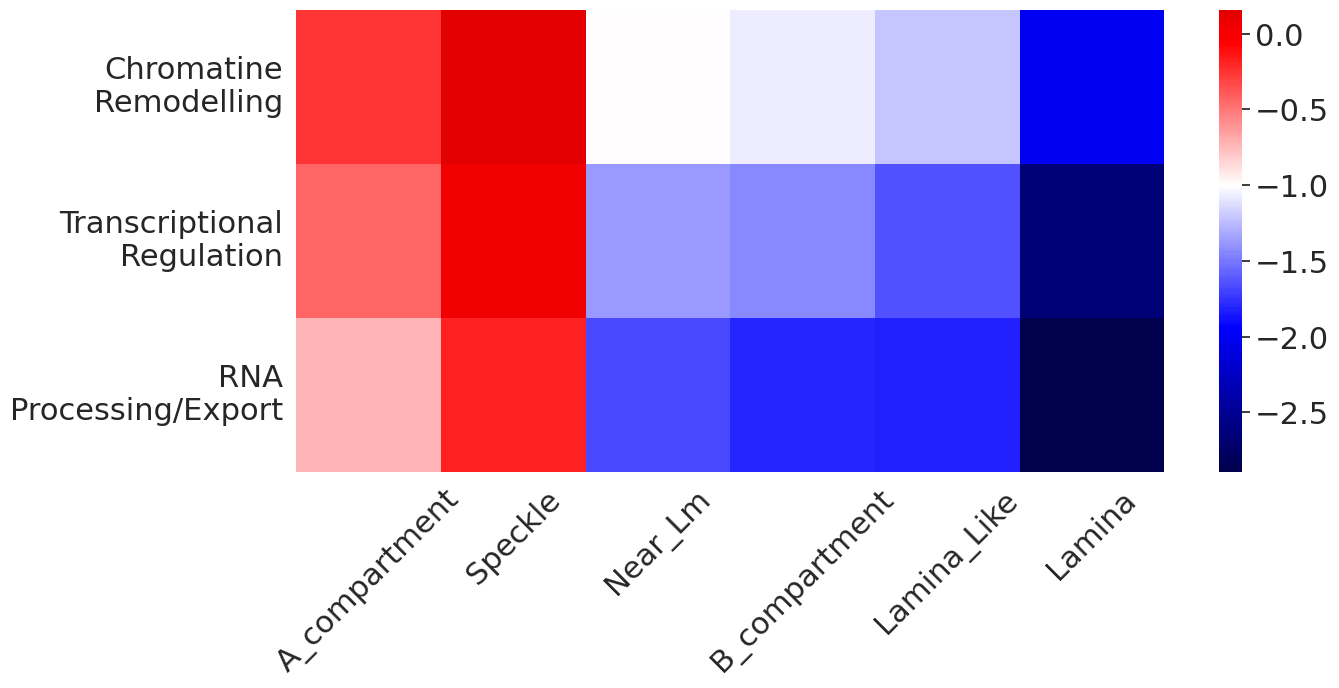

In [18]:
plt.figure(figsize=(14,6))
sns.set(font_scale=2)
tmp = np.log10(res_df)
#tmp = tmp.sub(tmp.mean(axis=1), axis=0).div(tmp.std(axis=1), axis=0)

tmp.index = pd.CategoricalIndex(tmp.index, 
                    categories= ["Chromatine\nRemodelling", "Transcriptional\nRegulation",
                                 "RNA\nProcessing/Export"])
tmp.sort_index(level=0, inplace=True)
tmp = tmp.loc[:, ["A_compartment", "Speckle", "Near_Lm", "B_compartment", "Lamina_Like", "Lamina"]]
sns.heatmap(tmp, cmap="seismic", center=-1)
plt.xticks(rotation=45) 
plt.savefig("/home/daniil/Desktop/hetmap_spin.pdf")

In [ ]:
# chi square

In [14]:
dt = {}

for FILE in glob.glob(f"ANNOT_ChIP/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
chip_df = pd.DataFrame.from_dict(dt).transpose()
chip_df = chip_df.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del chip_df["WINDOW"]
chip_df = chip_df[chip_df["PROTEIN"].str.endswith("K562")]
chip_df["PROTEIN"] = chip_df.PROTEIN.apply(lambda k: k.split('_')[0])
chip_df = chip_df.set_index("PROTEIN").astype("int")

In [15]:
dt = {}

for FILE in glob.glob(f"ANNOT_Triad/ANNOT_PC/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
triads = pd.DataFrame.from_dict(dt).transpose()
triads = triads.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del triads["WINDOW"]
triads = triads[triads["PROTEIN"].str.endswith("K562")]
triads["PROTEIN"] = triads.PROTEIN.apply(lambda k: k.split('_')[0])
triads = triads.set_index("PROTEIN").astype("int")

In [21]:
from scipy.stats import chisquare

dt = {}
for PROTEIN in tqdm(sorted(list(chip_df.index))):
    vals_chip = chip_df[chip_df.index == PROTEIN].transpose()[PROTEIN]
    vals_trds = triads[triads.index == PROTEIN].transpose()[PROTEIN]
    vals_chip = vals_chip / vals_chip.sum() * vals_trds.sum() 
    vals_trds = vals_trds / vals_trds.sum() * vals_trds.sum()

    dt[PROTEIN] = {K : V for K, V in zip(["statistic", "p-value"], chisquare(vals_trds, vals_chip))}

  0%|          | 0/47 [00:00<?, ?it/s]

In [23]:
from statsmodels.stats.multitest import fdrcorrection as FDR

df = pd.DataFrame.from_dict(dt).transpose()
df["q-value"] = FDR(df["p-value"])[1]
df.to_csv("test_res.tsv", sep='\t', index=True, header=False)

In [27]:
def sci_notation(number, sig_fig=2):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return "$" + a + " * 10^{" + str(b) + "}" + "$"
sci_notation(1.75e-07)

'$1.75 * 10^{-7}$'

In [31]:
with open("test_res.tsv", 'r') as inp:
    for line in inp:
        line = line.split('\t')
        line = [line[0], line[2], line[3]]
        line[1] = sci_notation(float(line[1]))
        line[2] = sci_notation(float(line[2]))
        print(' & '.join(line) + "\\\\ \hline")

CBP & $2.51 * 10^{-34}$ & $6.95 * 10^{-34}$\\ \hline
CBX3 & $1.06 * 10^{-22}$ & $2.07 * 10^{-22}$\\ \hline
CHD1 & $1.72 * 10^{-84}$ & $1.01 * 10^{-83}$\\ \hline
CHD4 & $1.00 * 10^{-20}$ & $1.89 * 10^{-20}$\\ \hline
CHD7 & $6.01 * 10^{-32}$ & $1.57 * 10^{-31}$\\ \hline
CTCF & $0.00 * 10^{0}$ & $0.00 * 10^{0}$\\ \hline
DNMT1 & $4.02 * 10^{-14}$ & $6.99 * 10^{-14}$\\ \hline
EWSR1 & $2.26 * 10^{-74}$ & $1.06 * 10^{-73}$\\ \hline
EZH2 & $1.13 * 10^{-25}$ & $2.52 * 10^{-25}$\\ \hline
FUS & $2.62 * 10^{-6}$ & $3.84 * 10^{-6}$\\ \hline
GTF2F1 & $1.46 * 10^{-27}$ & $3.43 * 10^{-27}$\\ \hline
HDAC1 & $1.29 * 10^{-28}$ & $3.19 * 10^{-28}$\\ \hline
HLTF & $1.63 * 10^{-5}$ & $2.25 * 10^{-5}$\\ \hline
HNRNPC & $2.93 * 10^{-2}$ & $3.36 * 10^{-2}$\\ \hline
HNRNPH & $3.80 * 10^{-3}$ & $4.71 * 10^{-3}$\\ \hline
HNRNPK & $1.23 * 10^{-240}$ & $2.90 * 10^{-239}$\\ \hline
HNRNPL & $1.52 * 10^{-1}$ & $1.59 * 10^{-1}$\\ \hline
HNRNPUL1 & $1.03 * 10^{-18}$ & $1.87 * 10^{-18}$\\ \hline
ILF3 & $7.11 * 10^{-2}$ &